In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as pltax
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import math
from scipy.optimize import curve_fit
from scipy import optimize as opt
import os
import astropy as ast
import pandas as pd
import statistics as stat
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
plt.rcParams.update({"text.usetex":True})
%matplotlib inline

In [2]:
plt.rcdefaults()
font={'family':'Times New Roman',
        'weight':'bold',
        'size':18}
matplotlib.rc('font',**font)
matplotlib.rc('xtick',labelsize=14) 
matplotlib.rc('ytick',labelsize=14)

In [3]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Photometry_Initial" # make sure to put the 'r' in front
filepaths =[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
files=[]
filenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\oh0si\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("Photometry_Initial")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        filenames.append(filename)
        #data list=files
        file=np.loadtxt(path,skiprows=4,dtype=str,unpack=True)
        files.append(file)

In [4]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\AAVSO_Photometry_clean" # make sure to put the 'r' in front
filepaths=[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
AAVSOfiles=[]
AAVSOfilenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\oh0si\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("AAVSO_Photometry_clean")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        AAVSOfilenames.append(filename)
        #data list=files
        file=np.loadtxt(path,dtype=object,delimiter=',',unpack=True)
        AAVSOfiles.append(file)

In [5]:
eruption_dates=pd.read_csv("nova_t0.csv")
eruption_dates_arr=np.array(eruption_dates['t_0'])
#date_diff=eruption_dates_arr - 2450000
names_arr=np.array(eruption_dates['Name'])
filenames_arr=np.array(eruption_dates['FileName'])

In [6]:
#-3 is n/a, -2 is bad data, -1 is unsure, 0 is none, 1 is IR excess, 2 is dust dip
Decent_Dust=pd.read_csv("Decent_Lightcurves_Chart_Presentation.csv")
Decent_Dust_Names=np.array(Decent_Dust["Name"])
Decent_Dust_geq_20=np.array(Decent_Dust["geq_20"])
Decent_Dust_Hard_Mask=np.array(Decent_Dust["Hard_Mask"])
Decent_Dust_Elias_Mask=np.array(Decent_Dust["Elias_Mask"])
Decent_Dust_chunksize=np.array(Decent_Dust["chunksize"])
Decent_Dust_xlim_1=np.array(Decent_Dust["xlim_1"])
Decent_Dust_xlim_2=np.array(Decent_Dust["xlim_2"])
Decent_Dust_decline_start=np.array(Decent_Dust["decline_start"])
Decent_Dust_recover_end=np.array(Decent_Dust["recover_end"])
Decent_Dust_recurrent=np.array(Decent_Dust["Recurrent"])
Decent_Dust_category=np.array(Decent_Dust["category"])
Decent_Dust_official=np.array(Decent_Dust["Official"])
print("There are",np.size(Decent_Dust_geq_20),"novae in total that have photometry files.")
print(np.size(np.where(Decent_Dust_geq_20==1)[0]),"novae have at least 20 measurements each for the V and K bands.")
print(np.size(np.where(Decent_Dust_category==-1)[0])+np.size(np.where(Decent_Dust_category==0)[0])+np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae have usable data.")
print(np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae with decent data have a dust dip.")

There are 93 novae in total that have photometry files.
76 novae have at least 20 measurements each for the V and K bands.
41 novae have usable data.
19 novae with decent data have a dust dip.


In [7]:
# PeakFrame nova ordering is the same as Decent_Dust.
Peak_In_Lit=pd.read_csv("Peak_in_Literature.csv",delimiter=',',skiprows=0,header=0,index_col=0,usecols=np.arange(0,25,1,dtype=int))
cleanframe=pd.DataFrame.dropna(Peak_In_Lit.loc[:,['K date - tmax','Extinction Corrected V-K Color','Extinction Corrected Uncertainty','V0']])
Kdatetmaxdiff=np.array(cleanframe.loc[:,'K date - tmax'])
correctedVK=np.array(cleanframe.loc[:,'Extinction Corrected V-K Color'])
correctedVKerr=np.array(cleanframe.loc[:,'Extinction Corrected Uncertainty'])
v0=np.array(cleanframe.loc[:,'V0'])

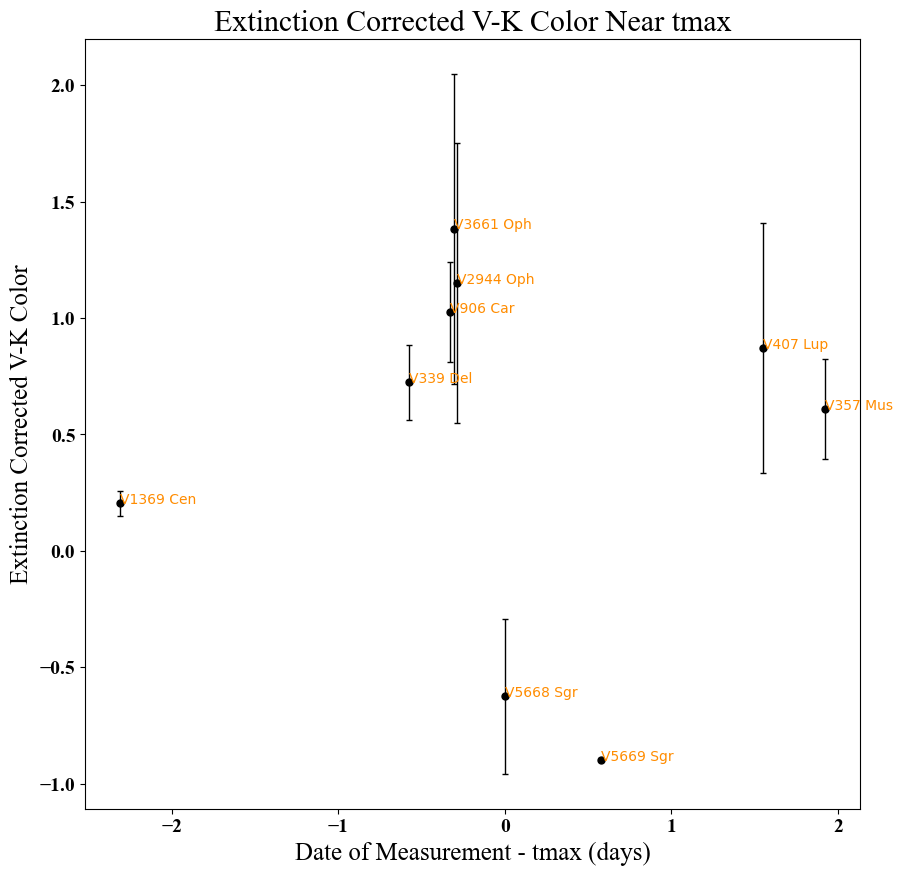

In [8]:
plt.figure(1,figsize=(10,10))
plt.errorbar(Kdatetmaxdiff,correctedVK,yerr=correctedVKerr,lw=0,marker='o',markersize=5,elinewidth=1,c='k',capsize=2)
plt.title('Extinction Corrected V-K Color Near tmax')
plt.ylabel('Extinction Corrected V-K Color')
plt.xlabel('Date of Measurement - tmax (days)')
for i,txt in enumerate(np.array(cleanframe.index)):
    plt.annotate(txt,(Kdatetmaxdiff[i],correctedVK[i]),font={'family':'DejaVu Sans','weight':'normal','size':10},color='darkorange')
#plt.savefig('ExtCorrectVKvsttmaxdiff.pdf',transparent=False)

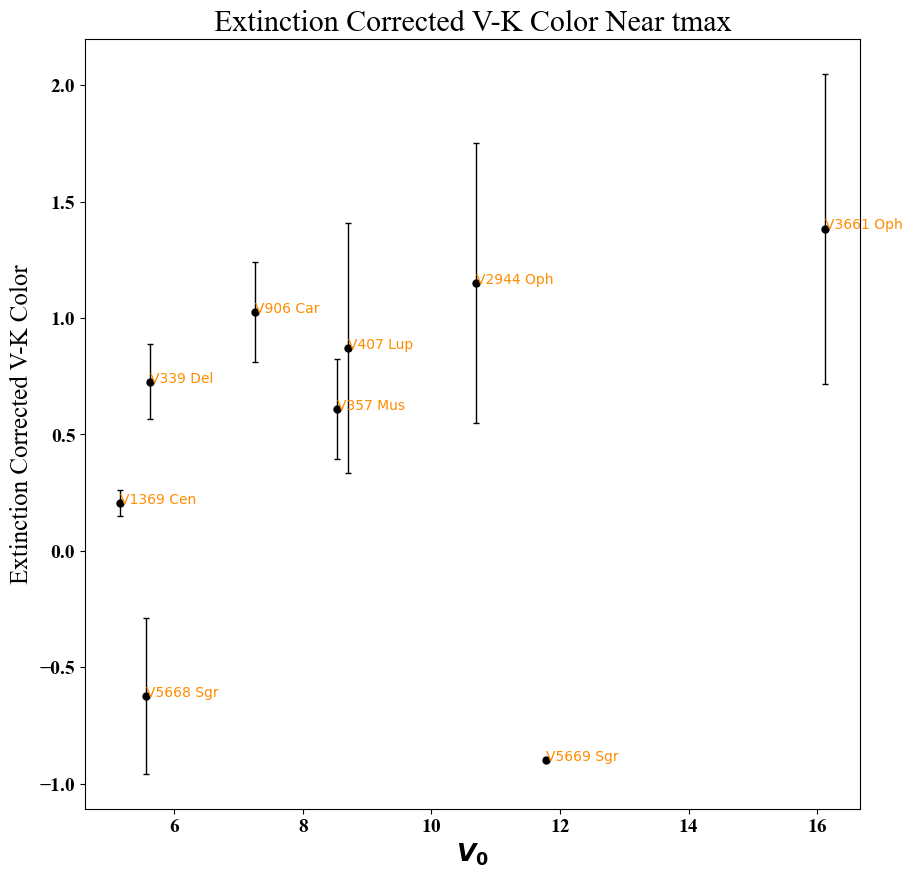

In [9]:
plt.figure(2,figsize=(10,10))
plt.errorbar(v0,correctedVK,yerr=correctedVKerr,lw=0,marker='o',markersize=5,elinewidth=1,c='k',capsize=2)
plt.title('Extinction Corrected V-K Color Near tmax')
plt.ylabel('Extinction Corrected V-K Color')
plt.xlabel(r'$V_0$')
for i,txt in enumerate(np.array(cleanframe.index)):
    plt.annotate(txt,(v0[i],correctedVK[i]),font={'family':'DejaVu Sans','weight':'normal','size':10},color='darkorange')
#plt.savefig('ExtCorrectVKvsV0.pdf',transparent=False)

In [10]:
meanpeakVK,meanpeakVK1sig=np.mean(correctedVK),np.std(correctedVK)
weightavgpeakVK=np.average(correctedVK,weights=5-np.abs(Kdatetmaxdiff))
weightstdev=np.sqrt(np.cov(correctedVK, aweights=5-np.abs(Kdatetmaxdiff)))

In [11]:
Elias_t2_df=pd.read_csv('Elias_t2.csv')
t2arr_floatcheck=np.transpose(np.array(Elias_t2_df.iloc[:,0:3]))

Elias_t2_arr=[]
for i in t2arr_floatcheck[2]:
    try:
        float(i)
    except ValueError:
        Elias_t2_arr.append(np.NaN)
    else:
        Elias_t2_arr.append(float(i))
Elias_t2_arr=np.array([t2arr_floatcheck[1],Elias_t2_arr])
t2_arr=np.array(Elias_t2_arr[1],dtype=float)
Elias_t2_start_arr=np.array(Elias_t2_df.iloc[:,5])
Elias_t2_end_arr=np.array(Elias_t2_df.iloc[:,6])

In [12]:
t2_dustduration_na=pd.read_csv('Observations.csv')
t2_dustduration=t2_dustduration_na.dropna()

In [13]:
t2_dustduration_names=np.array(t2_dustduration.iloc[:,0])
t2_dustduration_dur=np.array(t2_dustduration.iloc[:,2])-np.array(t2_dustduration.iloc[:,1])

In [14]:
nacount=0
baddatacount=0
unsurecount=0
nonecount=0
irexcesscount=0
dustdipcount=0
for ii in Decent_Dust_category:
    if ii==-3:
        nacount+=1
    if ii==-2:
        baddatacount+=1
    if ii==-1:
        unsurecount+=1
    if ii==0:
        nonecount+=1
    if ii==1:
        irexcesscount+=1
    if ii==2:
        dustdipcount+=1
print(nacount,baddatacount,unsurecount,nonecount,irexcesscount,dustdipcount)

15 37 6 16 3 16


In [15]:
#dataframe dump
features=pd.DataFrame(Decent_Dust_geq_20,index=Decent_Dust_Names,columns=['geq_20'])
header_list=['geq_20','mag_range','biggest_change','color_change_from_vmax','day_change_from_vmax',
             'recurrent','category','vband_change_over_interval','kband_change_over_interval','Vpeak','t2','peak_dt','peak_dm','peak_dm_err','peakColor']
features=features.reindex(columns=header_list)
features['recurrent']=Decent_Dust_recurrent
features['category']=Decent_Dust_category
features['t2']=t2_arr
features['biggest_change']=0.0
features['Vpeak']=0.0
features['peakColor']="None"

In [16]:
Decent_Dust_official_underscored_l=[]
for obj in Decent_Dust_official:
    Decent_Dust_official_underscored_l.append(obj.replace(' ','_')+'.txt')
Decent_Dust_official_underscored=np.array(Decent_Dust_official_underscored_l,dtype=object)
AAVSOfilenames_indexlist=[]
for i in range(len(AAVSOfilenames)):
    AAVSOfilenames_indexlist.append(np.where(Decent_Dust_official_underscored==AAVSOfilenames[i])[0][0])
AAVSOfilenames_indexarr=np.array(AAVSOfilenames_indexlist)

In [17]:
def avgchunks(xlist,ylist,chunksize):
    x=list(xlist)
    y=list(ylist)
    avgx=[]
    avgy=[]
    x_temp_array=np.array(x)
    y_temp_array=np.array(y)

    now_ind=0
    while now_ind<np.size(x_temp_array):
        sameday_ind_list=np.where(x_temp_array<=x_temp_array[now_ind]+chunksize)[0]
        sameday_too_early=np.where(sameday_ind_list<now_ind)[0]
        too_early_no=np.size(sameday_too_early)
        for ee in range(too_early_no):
            sameday_ind_list=np.delete(sameday_ind_list,0)
        temp_datelist=[]
        temp_maglist=[]
        for ii in sameday_ind_list:
            temp_datelist.append(x[ii])
            temp_maglist.append(y[ii])
        avgx.append(stat.mean(temp_datelist))
        avgy.append(stat.mean(temp_maglist))
        now_ind+=int(len(sameday_ind_list))
    return avgx,avgy
def derivchart(xlist,ylist):
    x=xlist
    y=ylist
    dydt_list=[]
    x_list=[]
    for ii in range(1,np.size(x)):
        dy_dt=(y[ii]-y[ii-1])/(x[ii]-x[ii-1])
        dydt_list.append(dy_dt)
        x_list.append(x[ii])
    return x_list,dydt_list
def Color(xlist1,xlist2,ylist1,ylist2,else_xlist=[],else_ylist=[]):
    if len(xlist1)>1 and len(xlist2)>1:
        #Color
        first1=int(xlist1[0])
        last1=int(xlist1[-1])
        first2=int(xlist2[0])
        last2=int(xlist2[-1])
        if first1<first2:  #the first day to check will be the later of the two,as only when both start can there be overlap
            first=first2
        else:
            first=first1
        if last1>last2:    #the last day will be the first of the two,as the con only overlap when both are being measured
            last=last2
        else:
            last=last1      
        daylist1=[]                #list of the days for which there are measurements of the K band
        xmeanlist1=[]           #list of the mean dates in the K band bins
        ymeanlist1=[]            #list of the mean mags in the K band bins
        x_arr1=np.array(xlist1)   #K band date array to use numpy with
        if(last>0):
            rangemod=1
        elif(last<0):
            rangemod=-1
        else:
            rangemod='0'
        for curr_val in range(first,last+rangemod):  #for dates when both bands might be being measured
            ind_right_side1=np.where(curr_val<=x_arr1)[0] #the right side indices include everything on that day and forward
            ind_left_side1=np.where(curr_val+1>x_arr1)[0] #the left side indices include everything before the next day
            ind_left_end1=ind_right_side1[0] #the left end is the leftmost value on the right side array
            ind_right_end1=ind_left_side1[-1]#[np.size(ind_left_side1)-1] #the right end is the rightmost value on the left side array
            if ind_left_end1<=ind_right_end1: #if the left end coincides with or is to the left of the right end
                ind_full1=np.arange(ind_left_end1,ind_right_end1+1) #list of indices in Kdate that fall within the 1-day range ahead of curr_date
                tempxsumlist1=[] #temporary date list
                tempysumlist1=[] #temporary mag list 
                for ii in ind_full1: #for indices in the list of dates during that day
                    tempxsumlist1.append(xlist1[ii])
                    tempysumlist1.append(ylist1[ii])
                xmean1=stat.mean(tempxsumlist1)
                ymean1=stat.mean(tempysumlist1)
                daylist1.append(curr_val)
                xmeanlist1.append(xmean1)
                ymeanlist1.append(ymean1)
        daylist2=[]
        xmeanlist2=[]
        ymeanlist2=[]
        x_arr2=np.array(xlist2)
        for curr_val in range(first,last+rangemod):
            ind_right_side2=np.where(curr_val<=x_arr2)[0]
            ind_left_side2=np.where(curr_val+1>x_arr2)[0]
            ind_left_end2=ind_right_side2[0]
            ind_right_end2=ind_left_side2[-1]#[np.size(ind_left_side2)-1]
            if ind_left_end2<=ind_right_end2:
                ind_full2=np.arange(ind_left_end2,ind_right_end2+1) #list of indices in Vdate that fall within the 1-day range ahead of curr_date
                tempxsumlist2=[]
                tempysumlist2=[]
                for ii in ind_full2:
                    tempxsumlist2.append(xlist2[ii])
                    tempysumlist2.append(ylist2[ii])
                xmean2=stat.mean(tempxsumlist2)
                ymean2=stat.mean(tempysumlist2)
                daylist2.append(curr_val)
                xmeanlist2.append(xmean2)
                ymeanlist2.append(ymean2)
        #find where points exist for both K and V
        daylist=[]
        daylist_arr2=np.array(daylist2)
        for day1 in daylist1:
            overlap_bool_arr=np.where(daylist_arr2==day1)[0]
            if np.size(overlap_bool_arr)==1:
                daylist.append(day1)
        #combine into final color array
        y_list=[]
        daylist_arr1=np.array(daylist1)
        for day in daylist: #for the overlap days (when there is a datapoint during that day for dust dip K and V bands)
            y_list.append(ymeanlist2[int(np.where(daylist_arr2==day)[0][0])]-ymeanlist1[int(np.where(daylist_arr1==day)[0][0])])
    else:
        daylist=else_xlist
        y_list=else_ylist
    return daylist,y_list
def shortenlist(list1,list2,start,end):
    short_list1=[]
    short_list2=[]
    for i,aa in enumerate(list1):
        if aa>=start and aa<=end:
            short_list1.append(aa)
            short_list2.append(list2[i])
    return short_list1,short_list2
def finddrop(xlist,ylist,distance=50,radius=10):
    droplist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            droplist.append(ylist[i]-max(short_y))
            xpointlist.append([x,short_x[np.argmax(np.asarray(short_y))]])
            ypointlist.append([ylist[i],short_y[np.argmax(np.asarray(short_y))]])
        else:
            pass
    if len(droplist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmin(np.asarray(droplist))],ypointlist[np.argmin(np.asarray(droplist))]
    if len(droplist)>=1:
        return min(droplist),plotpoints1,plotpoints2
    else:
        return "No compatible points. (drop)"
def findrise(xlist,ylist,distance=50,radius=10):
    riselist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            riselist.append(ylist[i]-min(short_y))
            xpointlist.append([x,short_x[np.argmin(np.asarray(short_y))]])
            ypointlist.append([ylist[i],short_y[np.argmin(np.asarray(short_y))]])
        else:
            pass
    if len(riselist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmax(np.asarray(riselist))],ypointlist[np.argmax(np.asarray(riselist))]
    if len(riselist)>=1:
        return max(riselist),plotpoints1,plotpoints2
    else:
        return "No compatible points. (rise)"
def findchange(xlist,ylist,distance=250,radius=250):
    changelist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            changelist.append((-1*(np.asarray(short_y)-ylist[i]))[(np.argmax(abs(np.asarray(short_y)-ylist[i])))])
            xpointlist.append([x,short_x[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
            ypointlist.append([ylist[i],short_y[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
        else:
            pass
    if len(changelist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmax(abs(np.asarray(changelist)))],ypointlist[np.argmax(abs(np.asarray(changelist)))]
    if len(changelist)>=1:
        return changelist[np.argmax(abs(np.asarray(changelist)))],plotpoints1,plotpoints2
    else:
        return "No compatible points. (change)"
def near_int_group(xlist,sep): #returns intervals where the points are less than "carwidth" apart
    xsep=[] #list of the distances between x values
    for i in range(len(xlist)-1):
        xsep.append(xlist[i+1]-xlist[i])
    inc_start_ind=np.where(np.array(xsep)<sep)[0] #Indices where the x separation is less than the width of the boxcar. Intervals from these indices to the next point in the array will be included. Change this to \leq to make inclusive.
    inc_int=[]
    for i in inc_start_ind:
        inc_int.append([xlist[i],xlist[i+1]])  #creating a list of [x1,x2] intervals to be skipped
    i=0
    a=0
    while a==0:
        if i > int(len(inc_int))-2:
            a=1
            break
        while inc_int[i][1]==inc_int[i+1][0]:
            inc_int[i][1]=inc_int.pop(i+1)[1] #collapsing [x1,x2],[x2,x3] down to [x1,x3] so that the program has less checks to make
            if i==int(len(inc_int))-1:
                break
        i+=1
    return inc_int
def smooth_boxcar(xlist,ylist,width,dx=0.1): #boxcar smoother
    r=0.5*width
    x_arr=np.arange(xlist[0],xlist[-1],dx)
    y_arr=x_arr*0
    for i,x in enumerate(x_arr):
        xcar,ycar=shortenlist(xlist,ylist,x-r,x+r)
        y_arr[i]=np.mean(ycar)
    return x_arr,y_arr
def gaussian_func(x,a=1,b=0,c=1):           #gaussian funciton for use in FWHM weighted smoother
    e=np.exp(1)
    return a*(e**(-((x-b)**2)/(2*c**2)))
def smooth_fwhm(xlist,ylist,width,dx=0.1,FWHM=0):    #FWHM weighted smoother
    if FWHM==0:
        FWHM=width
    a=1
    b=0
    e=np.exp
    r=0.5*width
    x_arr=np.arange(xlist[0],xlist[-1],dx)
    y_arr=x_arr*0
    c=FWHM/math.sqrt(8*np.log(2))
    for i,x in enumerate(x_arr):
        xcar,ycar=shortenlist(xlist,ylist,x-r,x+r)
        xgaus=np.array(xcar)-x
        W=gaussian_func(xgaus,c=c)-gaussian_func(r,c=c)
#        print(xgaus,W,np.sum(W),x)
        W=W/np.sum(W)
        y_arr[i]=np.dot(ycar,W)
    return x_arr,y_arr
def broken_smooth(func,xlist,ylist,carwidth,args=[0.1]):     #implementation for smoothing, breaking curve where there aren't points present
    int_list=near_int_group(xlist,carwidth)                  #function, list of x values, list of y values, width of influence on curve, frequency of points, (FWHM of weight function)
    smooth_x=np.array([])
    smooth_y=np.array([])
    for i_i in int_list:
        xtrack,ytrack=shortenlist(xlist,ylist,*i_i)
        shortsmooth_x,shortsmooth_y=func(xtrack,ytrack,carwidth,*args)
        smooth_x=np.append(smooth_x,shortsmooth_x)
        smooth_y=np.append(smooth_y,shortsmooth_y)
    return smooth_x,smooth_y
def name_translator(in_name):
    pairsarr=np.transpose(np.array(Decent_Dust.iloc[:,[0,12]]))
    if len(np.where(pairsarr[0]==in_name)[0])>0:
        return pairsarr[1,np.where(pairsarr[0]==in_name)[0][0]]
    elif len(np.where(pairsarr[1]==in_name)[0])>0:
        return pairsarr[0,np.where(pairsarr[1]==in_name)[0][0]]
    else:
        return in_name+' no match'
def dxdy10pm5(xarr,yarr): #find delta x/delta y taking steps of size 20 +/- 5
    xnew,ynew=[],[]
    dx,dy=[],[]
    i=0
    stop=False
    while stop==False:
        if i==len(xarr)-1:
            if len(xnew)>1:
                xnew.append(xarr[next_i])
                ynew.append(yarr[next_i])
            stop=True
        elif len(np.where(np.abs(xarr[i:]-xarr[i]-10)<=5)[0])>0:
            next_i=i+np.argmin(np.abs(xarr[i:]-xarr[i]-10))
            xnew.append(xarr[i])
            ynew.append(yarr[i])
            i=next_i
        else:
            i+=1
    if len(xnew)>1:
        for i in range(len(xnew)-1):
            dx.append(xnew[i+1]-xnew[i])
            dy.append(ynew[i+1]-ynew[i])
        return np.array(xnew)[1:],np.array(dy)/np.array(dx)
    else:
        return np.array([]),np.array([])
#def vt2dusttest(xarr,yarr,t2):
#    return (yarr[np.argmin(xarr-t2)]-np.max(yarr))/t2,-xarr[np.argmin(xarr-t2)]+xarr[np.argmax(yarr)]
def vt2dusttest(xarr,yarr,t2):
    return t2,(yarr[np.argmin(xarr-t2)]-np.max(yarr))/(-xarr[np.argmin(xarr-t2)]+xarr[np.argmax(yarr)])
def removebounds(date,mag,err,sat,dim): #returns date and mag (input as a lists) with sat and dim removed, where sat and dim are arrays of indices.
    return list(np.delete(np.asarray(date),np.append(sat,dim))),list(np.delete(np.asarray(mag),np.append(sat,dim))),list(np.delete(np.asarray(err),np.append(sat,dim)))
def combinesource(date1,mag1,err1,date2,mag2,err2): #inputs and outputs are lists
    date12unsort=np.array(date1+date2)
    mag12unsort=np.array(mag1+mag2)
    err12unsort=np.array(err1+err2)
    comsort=np.argsort(date12unsort)
    return list(date12unsort[comsort]),list(mag12unsort[comsort]),list(err12unsort[comsort])


x_arr=2*np.array([1,2,4,5,7,8,11,13,16,20,26,35,37,38,55,59,60,63])
y_arr=np.array([43,42,40,37,38,39,45,48,50,46,42,35,35,36,40,43,50,55])
xnnn,dxdy=dxdy10pm5(x_arr,y_arr)
plt.subplot(2,1,1)
plt.scatter(x_arr,y_arr)
plt.subplot(2,1,2)
plt.plot(xnnn,dxdy)

aaa=np.linspace(-2.5,2.5,100)
bbb=gaussian_func(aaa,c=5/math.sqrt(8*np.log(2)))-gaussian_func(2.5,c=5/math.sqrt(8*np.log(2)))
plt.plot(aaa,bbb)

plt.figure(figsize=(20,10))
plt.scatter([1,2,4,5,7,8,11,13,16,20,26,35,37,38,55,59,60,63],[43,42,40,37,38,39,45,48,50,46,42,35,35,36,40,43,50,55],alpha=0.5,s=100)
aaa,bbb=broken_smooth(smooth_fwhm,[1,2,4,5,7,8,11,13,16,20,26,35,37,38,55,59,60,63],[43,42,40,37,38,39,45,48,50,46,42,35,35,36,40,43,50,55],5)
plt.scatter(aaa,bbb,color='r',marker='x',s=4,alpha=0.5)
plt.grid()
plt.xticks(np.arange(0,70,5),np.arange(0,70,5))

In [18]:
Decent_Dust_index_list=[]
nova_t0_index_list=[]
Kdate_list=[]
Kmag_list=[]
Kerror_list=[]
Vdate_list=[]
Vmag_list=[]
Verror_list=[]
KV_daylist_list=[]
KV_maglist_list=[]
len_KV_daylist500_list=[]
KV_daylistsmooth_list=[]
KV_maglistsmooth_list=[]
v2dusttest1=[]
v2dusttest2=[]
v2dusttestnames=[]
Vsatlist=[]
Vdimlist=[]
Ksatlist=[]
Kdimlist=[]
Kbandname='K band'
Kcolor='k'
Vbandname='V band'
Vcolor='lime'
KVcolor='k'
KVlabel='V-K color'
KV_linfit_color='r'
KV_linfit_label='Linear Fit'
KVsmoothcolor='lime'
KVsmoothlabel='V-K smoothed'
aavsoVcolor='greenyellow'
aavsoVlabel='AAVSO V band'
aavsoCVcolor='yellowgreen'
aavsoCVlabel='AAVSO CV band'

In [19]:
for file_num in range(int(len(files)/2)):

    #declare files to be indexed
    file1=files[file_num*2]
    filename1=filenames[file_num*2]
    file2=files[file_num*2+1]
    filename2=filenames[file_num*2+1]

    #find t_0
    nova_t0_index=int(np.where(filenames_arr==filename1)[0][0])
    t0_JD=eruption_dates_arr[nova_t0_index]
    t0=t0_JD - 2450000.0

    #filter with "Decent_Lightcurves_Chart.csv"
    Decent_Dust_index=int(np.where(Decent_Dust_Names==names_arr[nova_t0_index])[0][0])

    #AAVSO data
    if len(np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0])==1:
        AAVSOfilepresent=True
        AAVSOfile=AAVSOfiles[np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0][0]]
        AAVSOdate,AAVSOmag,AAVSOerr,AAVSOband=AAVSOfile
    else:
        AAVSOfilepresent=False
    
    if Decent_Dust_geq_20[Decent_Dust_index]==1:
        #first file (ir)
        #variables,convert strings to floats (where applicable)
        date1=np.array(file1[0],dtype=float)
        band1=file1[1]
        mag1=np.array(file1[2],dtype=float)
        err1=np.array(file1[3],dtype=float)
        Kbandfilter=np.bitwise_and(np.where(band1=='K',True,False),np.where(err1<0.5,True,False))
        Kdate=list(date1[Kbandfilter]-t0)
        Kmag=list(mag1[Kbandfilter])
        Kerror=list(err1[Kbandfilter])
        #second file (opt)
        date2=np.array(file2[0],dtype=float)
        band2=file2[1]
        mag2=np.array(file2[2],dtype=float)
        err2=np.array(file2[3],dtype=float)
        Vbandfilter=np.bitwise_and(np.where(band2=='V',True,False),np.where(err2<0.5,True,False))
        Vdate=list(date2[Vbandfilter]-t0)
        Vmag=list(mag2[Vbandfilter])
        Verror=list(err2[Vbandfilter])
        if AAVSOfilepresent==True:
            #AAVSO data
            date_nomaskaavso=[]
            aavsoVdate,aavsoCVdate=[],[]
            for no in AAVSOdate:
                date_nomaskaavso.append(float(no))
            mag_nomaskaavso=[]
            aavsoVmag,aavsoCVmag=[],[]
            for no in AAVSOmag:
                no=no.lstrip('<>')
                mag_nomaskaavso.append(float(no))
            error_nomaskaavso=[]
            aavsoVerror,aavsoCVerror=[],[]
            for no in AAVSOerr:
                if len(no)==0:
                    no=0
                error_nomaskaavso.append(float(no))
            #AAVSO mask
            AAVSO_V_arr=np.where(AAVSOband=='V')[0]
            for ii in AAVSO_V_arr:
                aavsoVdate.append(date_nomaskaavso[ii] - t0)
                aavsoVmag.append(mag_nomaskaavso[ii])
                aavsoVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(Verror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoVdate.pop(ii-i)
                aavsoVmag.pop(ii-i)
                aavsoVerror.pop(ii-i)
            AAVSO_CV_arr=np.where(AAVSOband=='CV')[0]
            for ii in AAVSO_CV_arr:
                aavsoCVdate.append(date_nomaskaavso[ii] - t0)
                aavsoCVmag.append(mag_nomaskaavso[ii])
                aavsoCVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(aavsoCVerror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoCVdate.pop(ii-i)
                aavsoCVmag.pop(ii-i)
                aavsoCVerror.pop(ii-i)
            aavsoVdate=list(np.array(aavsoVdate)-2450000)
            aavsoCVdate=list(np.array(aavsoCVdate)-2450000)
            Vdate,Vmag,Verror=combinesource(Vdate,Vmag,Verror,aavsoVdate,aavsoVmag,aavsoVerror)
            
        #get lower and upper limit arrays for V and K and squeeze mags to between 5 and 20.
        Vsat=np.where(np.asarray(Vmag)<=5)[0]
        #Vsatdate=np.asarray(Vdate)[Vsat]
        for i in Vsat:
            Vmag[i]=5
        Vdim=np.where(np.asarray(Vmag)>=20)[0]
        #Vdimdate=np.asarray(Vdate)[Vdim]
        for i in Vdim:
            Vmag[i]=20

        Ksat=np.where(np.asarray(Kmag)<=5)[0]
        #Ksatdate=np.asarray(Kdate)[Ksat]
        for i in Ksat:
            Kmag[i]=5
        Kdim=np.where(np.asarray(Kmag)>=20)[0]
        #Kdimdate=np.asarray(Kdate)[Kdim]
        for i in Kdim:
            Kmag[i]=20

        #average points in chunks that are within "chunksize" days of each other

        chunksize=3
        #first file

        avgKdate,avgKmag=avgchunks(Kdate,Kmag,chunksize=chunksize)
        avgVdate,avgVmag=avgchunks(Vdate,Vmag,chunksize=chunksize)

        #derivative plots using averaged points
        #first file
            
        Kt_list1,Kdmag_dt_list1=derivchart(avgKdate,avgKmag)
        Vt_list2,Vdmag_dt_list2=derivchart(avgVdate,avgVmag)
        
        #colors
        KV_daylist,KV_maglist=Color(Kdate,Vdate,Kmag,Vmag)
        KVt_list,KVdmag_dt_list=derivchart(KV_daylist,KV_maglist)
               
        #shorter color arrays for curve fitting // split at minimum
        KV_decline_start=Decent_Dust_decline_start[Decent_Dust_index]
        KV_recover_end=Decent_Dust_recover_end[Decent_Dust_index]
        startholder=KV_daylist[0]
        print(Decent_Dust_Names[Decent_Dust_index])
        KV_daylist500,KV_maglist500=shortenlist(KV_daylist,KV_maglist,startholder,200)
        if KV_daylist500[-1]<KV_recover_end:
            KV_recover_end=KV_daylist500[-1]
        if KV_daylist500[0]>KV_decline_start:
            KV_decline_start=KV_daylist500[0]
        minimum=KV_daylist500[np.argmax(np.asarray(KV_daylist500))]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'biggest_change']=findchange(KV_daylist500,KV_maglist500)[0]
        
        magrange_comp=5
        top,bottom=np.percentile(KV_maglist500,[magrange_comp,100-magrange_comp])
        features.loc[Decent_Dust_Names[Decent_Dust_index],'mag_range']=(bottom-top)
        
        Vdate50,Vmag50=shortenlist(Vdate,Vmag,0,50)
        if len(Vmag50)>=1:
            Vpeak=np.max(Vmag50)
        else:
            Vpeak=np.nan
        features.loc[Decent_Dust_Names[Decent_Dust_index],'Vpeak']=Vpeak
            
        #finding greatest change in v-k color from max in V band
        outlier_ind_list=[]
        for i,mag in enumerate(Vmag):
            if len(np.where((np.abs(np.asarray(Vmag)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        Vmag_nooutliers=np.delete(np.asarray(Vmag),outlier_ind_list)
        Vdate_nooutliers=np.delete(np.asarray(Vdate),outlier_ind_list)
        Vmag_before500=(np.where(Vdate_nooutliers<200)[0])[-1]
        Vmag_before500list=Vmag_nooutliers[:Vmag_before500]
        if len(Vmag_before500list)>0:
            Vmaxdate=Vdate_nooutliers[np.argmin(Vmag_before500list)]
        else:
            Vmaxdate=0
        outlier_ind_list=[]
        for i,mag in enumerate(KV_maglist500):
            if len(np.where((np.abs(np.asarray(KV_maglist500)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        KV_daylist500_nooutliers=np.delete(np.asarray(KV_daylist500),outlier_ind_list)
        KV_maglist500_nooutliers=np.delete(np.asarray(KV_maglist500),outlier_ind_list)
        KVclosest=np.argmin(np.abs(np.asarray(KV_daylist500_nooutliers)-Vmaxdate))
        KVfurthest=np.argmax(np.asarray(KV_maglist500_nooutliers)[KVclosest:]-KV_maglist500_nooutliers[KVclosest])+KVclosest
        day_change_from_max=KV_daylist500_nooutliers[KVfurthest]-KV_daylist500_nooutliers[KVclosest]
        mag_change_from_max=KV_maglist500_nooutliers[KVfurthest]-KV_maglist500_nooutliers[KVclosest]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'color_change_from_vmax']=mag_change_from_max
        features.loc[Decent_Dust_Names[Decent_Dust_index],'day_change_from_vmax']=day_change_from_max
        print(Decent_Dust_Names[Decent_Dust_index])
        #greatest color change from tmax
        if np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]:
            tmax=float(np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index])
            peakKdate=np.asarray(Peak_In_Lit.loc[:,"K date"])[Decent_Dust_index]
        else:
            tmax=0
        if np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]:
            peakColor="Full"
            KVpeak=np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]
            A_V=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]
            A_V_err=np.asarray(Peak_In_Lit.loc[:,"A_v Uncertainty"])[Decent_Dust_index]
            if A_V_err>0:
                pass
            else:
                A_V_err=0
            A_K=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_k)"])[Decent_Dust_index]
            A_K_err=np.asarray(Peak_In_Lit.loc[:,"A_k Uncertainty"])[Decent_Dust_index]
            CorrectedVKarr=KV_maglist500_nooutliers-A_V+A_K
            diffpeakind=np.argmax(CorrectedVKarr-KVpeak)
            peak_dt=KV_daylist500_nooutliers[diffpeakind]+t0_JD-peakKdate
            peak_dm=CorrectedVKarr[diffpeakind]-KVpeak
            peak_dm_err=A_V_err+A_K_err
        elif tmax!=0 and np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]:
            peakColor="Extinction"
            A_V=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]
            A_V_err=np.asarray(Peak_In_Lit.loc[:,"A_v Uncertainty"])[Decent_Dust_index]
            A_K=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_k)"])[Decent_Dust_index]
            A_K_err=np.asarray(Peak_In_Lit.loc[:,"A_k Uncertainty"])[Decent_Dust_index]
            if A_V_err>0:
                pass
            else:
                A_V_err=0
            CorrectedVKarr=KV_maglist500_nooutliers-A_V+A_K
            diffpeakind=np.argmax(CorrectedVKarr-weightavgpeakVK)
            peak_dt=KV_daylist500_nooutliers[diffpeakind]+t0_JD-tmax
            peak_dm=CorrectedVKarr[diffpeakind]-weightavgpeakVK
            peak_dm_err=weightstdev+A_V_err+A_K_err
        else:
            peakColor="None"
            peak_dt=day_change_from_max #KV_daylist500_nooutliers[diffpeakind]+t0_JD-peakKdate  
            peak_dm=mag_change_from_max
            peak_dm_err=0
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dt']=peak_dt
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dm']=peak_dm
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dm_err']=peak_dm_err
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peakColor']=peakColor

        #finding change in v and k band brightness during interval between v-band max and greatest following v-k color change
        Vdatevkchange,Vmagvkchange=shortenlist(Vdate,Vmag,KV_daylist500_nooutliers[KVclosest],KV_daylist500_nooutliers[KVfurthest])
        Kdatevkchange,Kmagvkchange=shortenlist(Kdate,Kmag,KV_daylist500_nooutliers[KVclosest],KV_daylist500_nooutliers[KVfurthest])
        if len(Vdatevkchange)>1 and len(Kdatevkchange)>1:
            features.loc[Decent_Dust_Names[Decent_Dust_index],'vband_change_over_interval']=Vmagvkchange[-1]-Vmagvkchange[0]
            features.loc[Decent_Dust_Names[Decent_Dust_index],'kband_change_over_interval']=Kmagvkchange[-1]-Kmagvkchange[0]
            
        #smoother for v-k color
        KV_daylistsmooth,KV_maglistsmooth=broken_smooth(smooth_fwhm,KV_daylist,KV_maglist,5)
        
        #AAVSO data
        # if 0!=np.size(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0]):
        #     aavsolistind=int(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0])
        #     aavsoDate,aavsoMag,aavsoError,aavsoBand=AAVSOfiles[aavsolistind]
        
        #v t2 dust test
        if Decent_Dust_category[Decent_Dust_index]==2:
            Vdateshort,Vmagshort=shortenlist(Vdate,Vmag,Elias_t2_start_arr[Decent_Dust_index],Elias_t2_end_arr[Decent_Dust_index])
            aaa,bbb=vt2dusttest(Vdateshort,Vmagshort,t2_arr[Decent_Dust_index])
            v2dusttest1.append(aaa)
            v2dusttest2.append(bbb)
            v2dusttestnames.append(Decent_Dust_official[Decent_Dust_index])
        #main plot
        Decent_Dust_index_list.append(Decent_Dust_index)
        nova_t0_index_list.append(nova_t0_index)
        Kdate_list.append(Kdate)
        Kmag_list.append(Kmag)
        Kerror_list.append(Kerror)
        Vdate_list.append(Vdate)
        Vmag_list.append(Vmag)
        Verror_list.append(Verror)
        Vsatlist.append(Vsat)
        Vdimlist.append(Vdim)
        Ksatlist.append(Ksat)
        Kdimlist.append(Kdim)
        if len(KV_daylist500)>=4:
            KV_daylist_list.append(KV_daylist)
            KV_maglist_list.append(KV_maglist)
        else:
            KV_daylist_list.append([])
            KV_maglist_list.append([])
        len_KV_daylist500_list.append(int(len(KV_daylist500)))
        KV_daylistsmooth_list.append(KV_daylistsmooth)
        KV_maglistsmooth_list.append(KV_maglistsmooth)

FM Cir
FM Cir
N Cen 2012b
N Cen 2012b
N Cen 2017
N Cen 2017
N LMC 1996
N LMC 1996
N LMC 2005
N LMC 2005
N LMC 2009a
N LMC 2009a
N LMC 2009b
N LMC 2009b
N LMC 2012a
N LMC 2012a
N LMC 2013
N LMC 2013
N LMC 2015
N LMC 2015
N Mus 2018
N Mus 2018
N Oph 2017
N Oph 2017
N Oph 2018b
N Oph 2018b
NR Tra
NR Tra
N Sco 2018a
N Sco 2018a
N Sco 2018b
N Sco 2018b
N SMC 2016
N SMC 2016
PR Lup
PR Lup
QY Mus
QY Mus
RS Oph
RS Oph
T Pyx
T Pyx
V1187 Sco 
V1187 Sco 
V1213 Cen
V1213 Cen
V1280 Sco
V1280 Sco
V1311 Sco
V1311 Sco
V1312 Sco
V1312 Sco
V1313 Sco
V1313 Sco
V1324 Sco
V1324 Sco
V1368 Cen
V1368 Cen
V1369 Cen
V1369 Cen
V1375 Cen
V1375 Cen
V1533 Sco
V1533 Sco
V1534 Sco
V1534 Sco
V1535 Sco
V1535 Sco
V1656 Sco
V1656 Sco
V1663 Aql
V1663 Aql
V2575 Oph
V2575 Oph
V2672 Oph
V2672 Oph
V2676 Oph
V2676 Oph
V2677 Oph
V2677 Oph
V2944 Oph
V2944 Oph
V339 Del
V339 Del
V3661 Oph
V3661 Oph
V3890 Sgr
V3890 Sgr
V407 Lup
V407 Lup
V475 Sct
V475 Sct
V496 Sct
V496 Sct
V5114 Sgr
V5114 Sgr
V5117 Sgr
V5117 Sgr
V549 Vel
V549 Vel
V5

C:\Users\oh0si\AppData\Local\Temp\ipykernel_14624\1417313551.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)


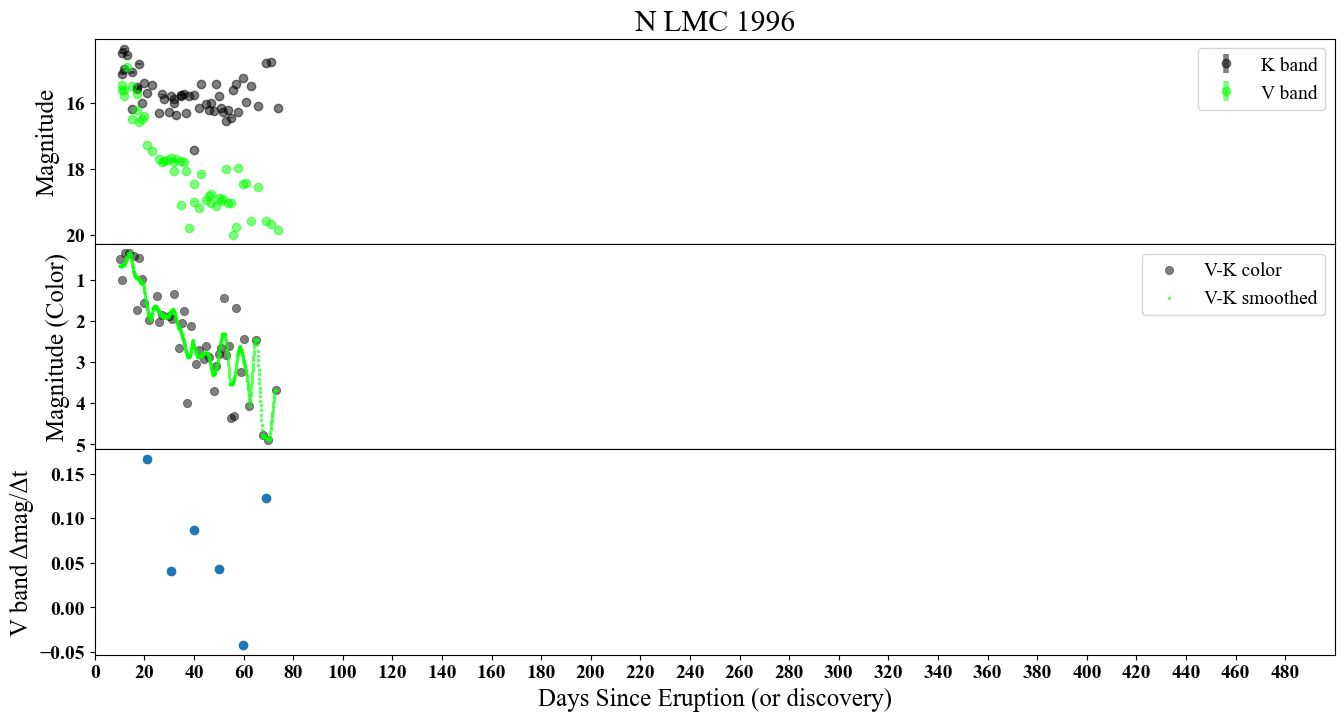

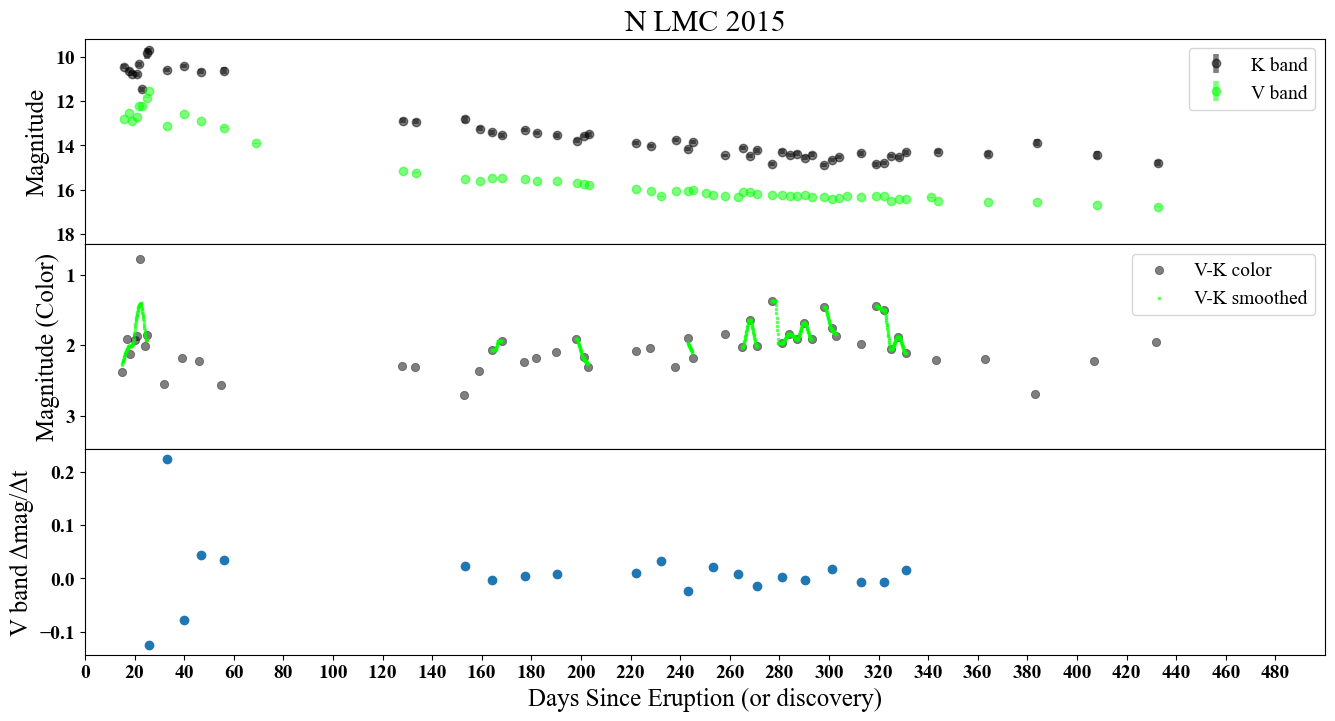

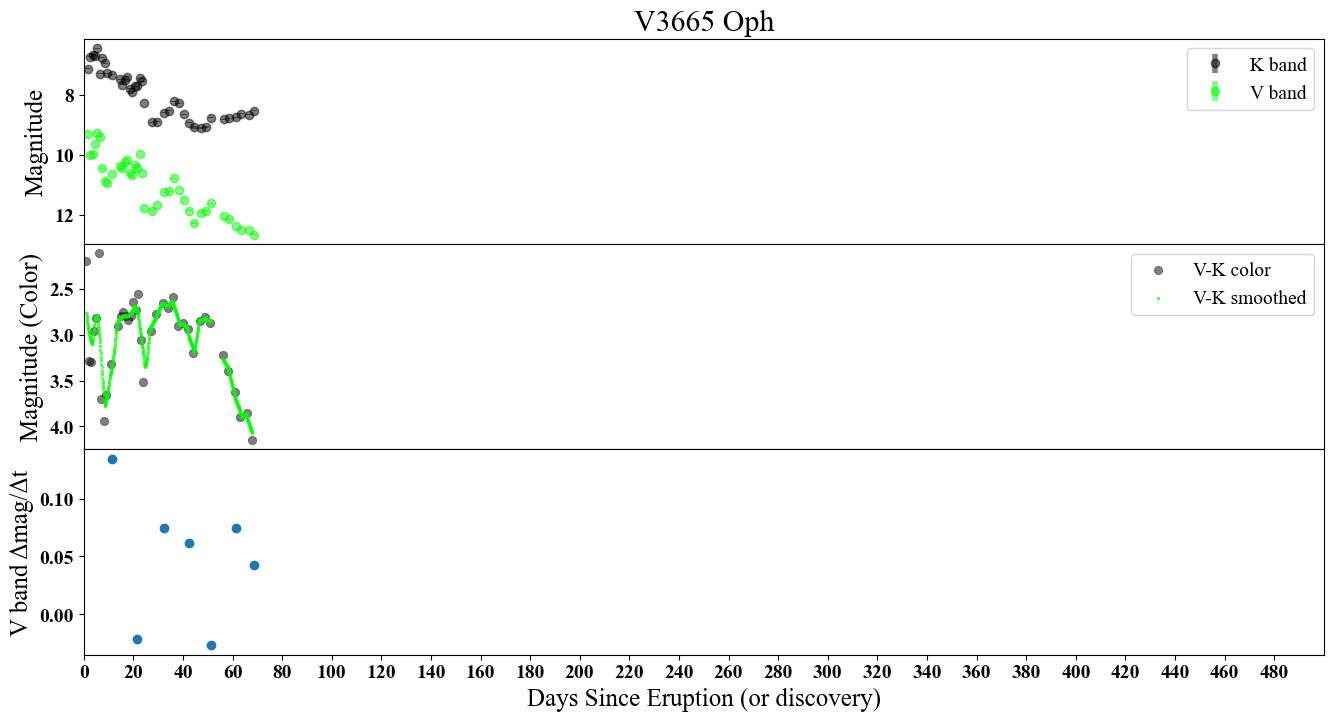

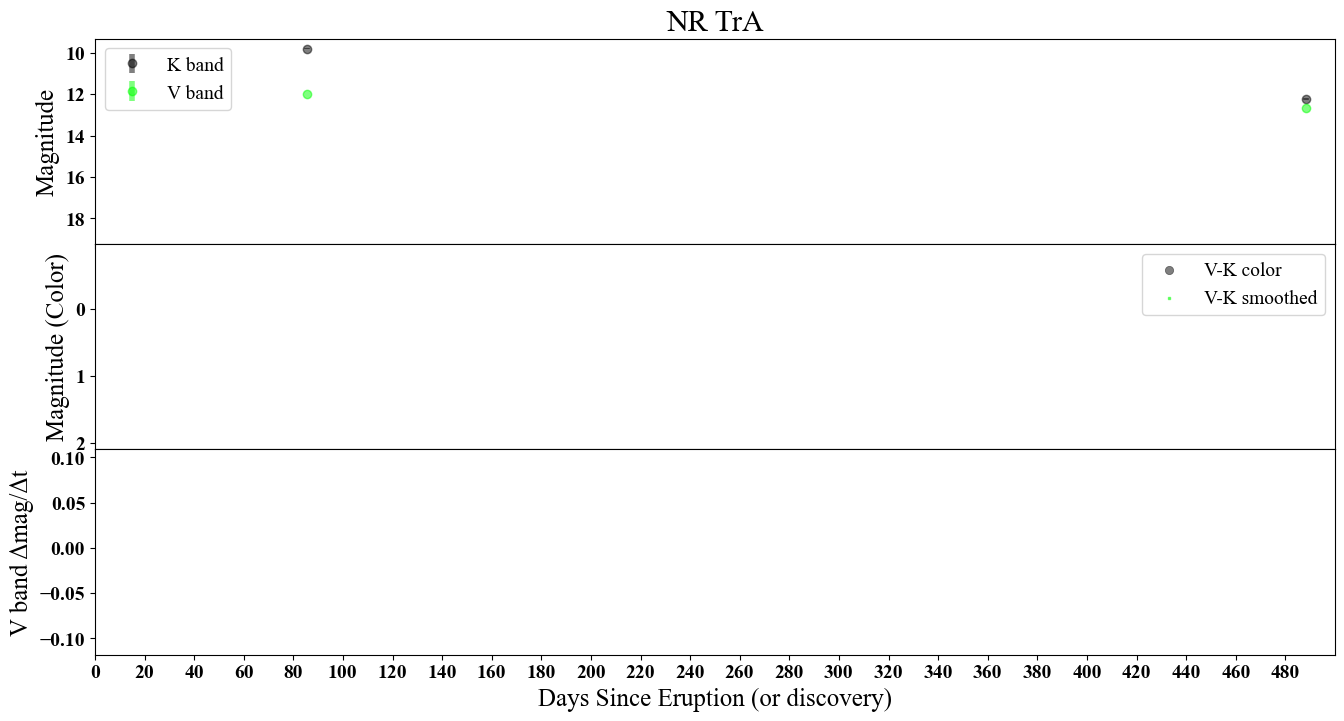

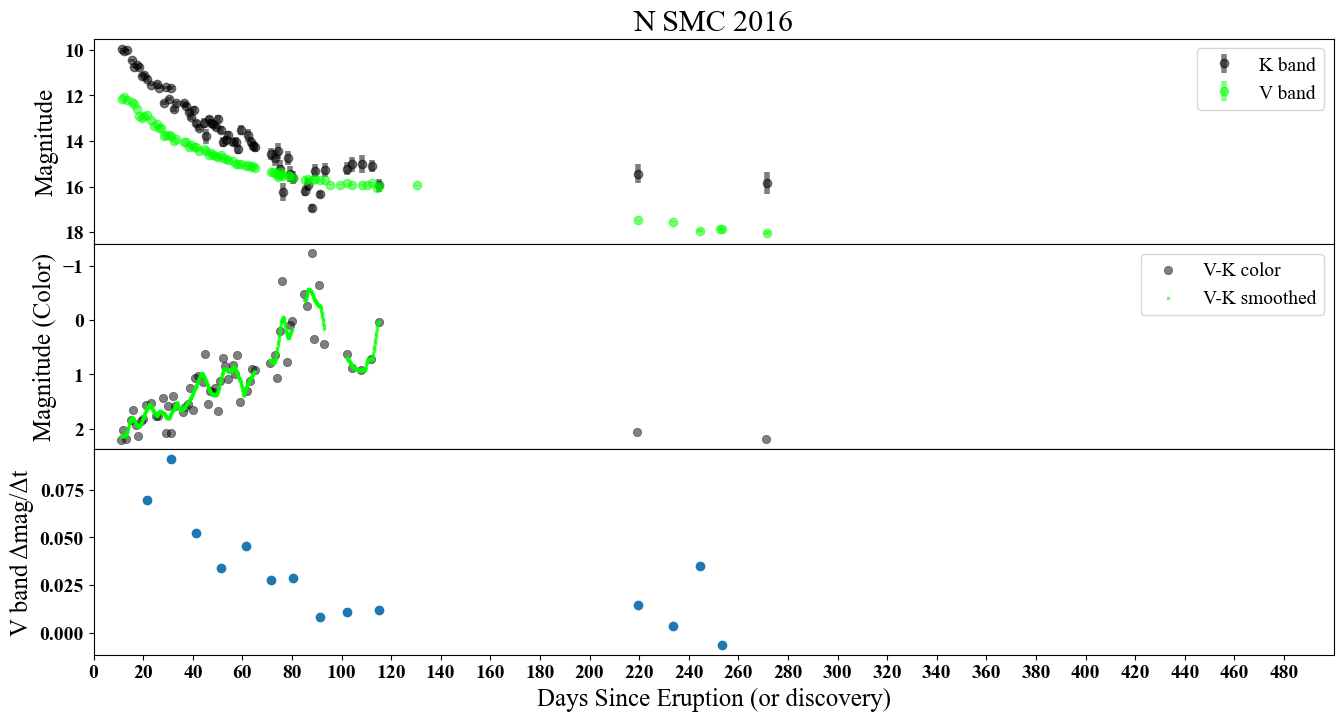

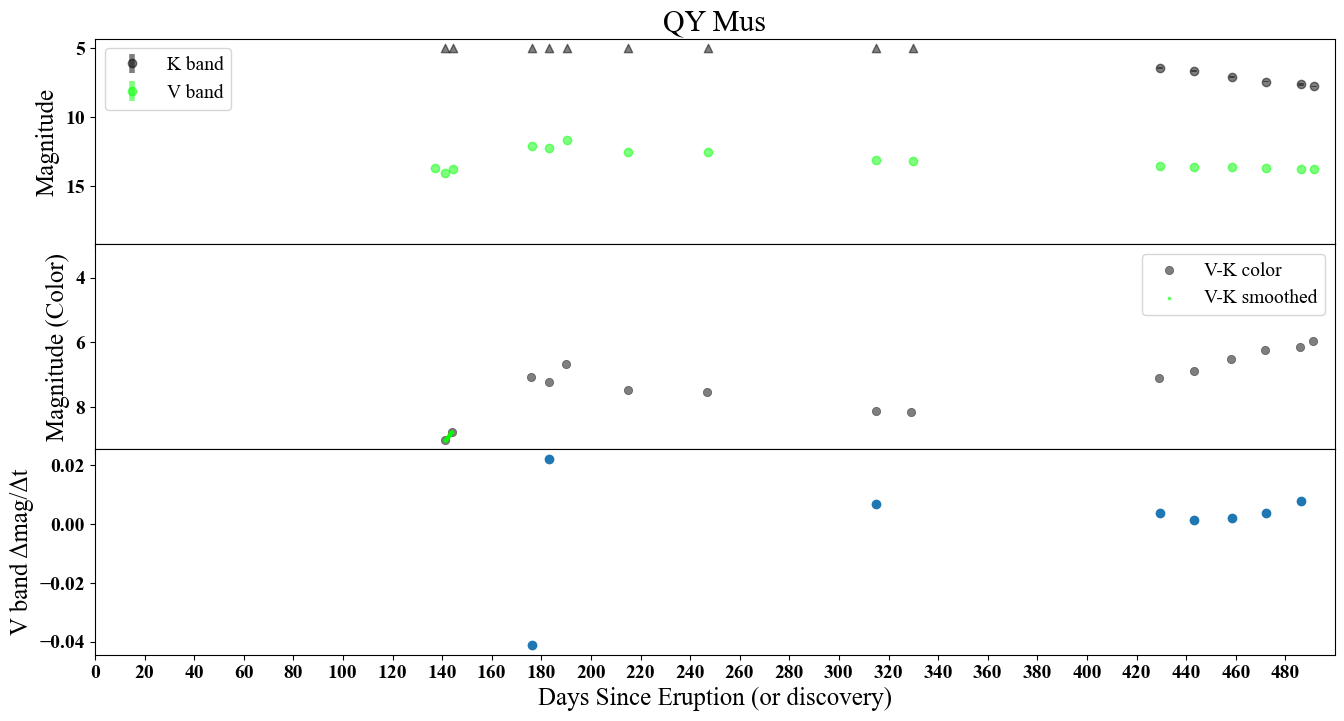

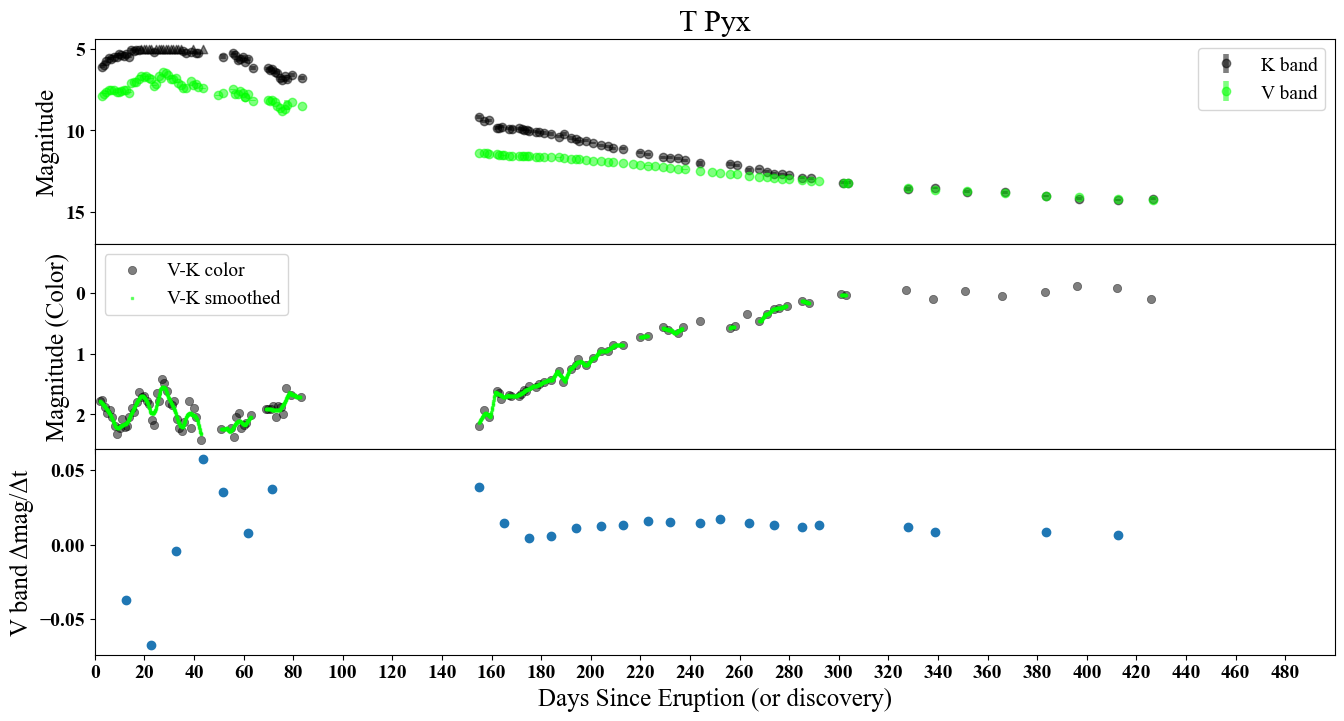

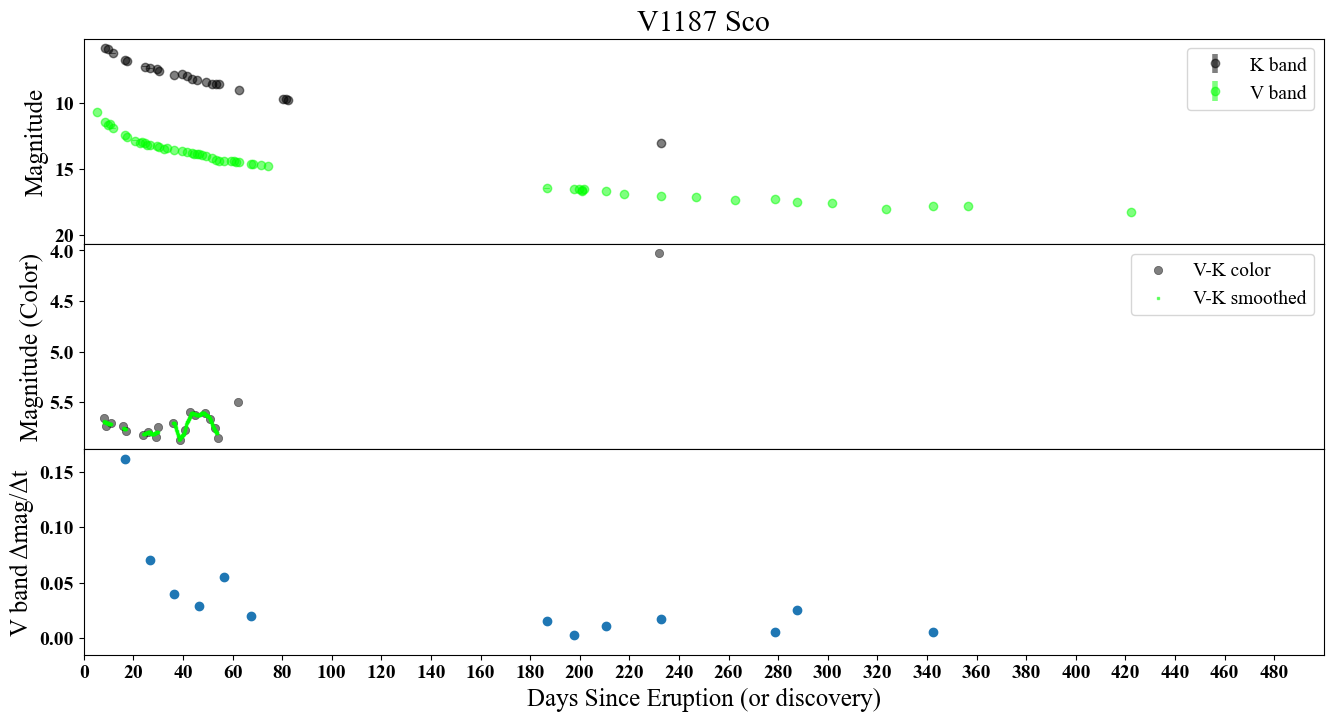

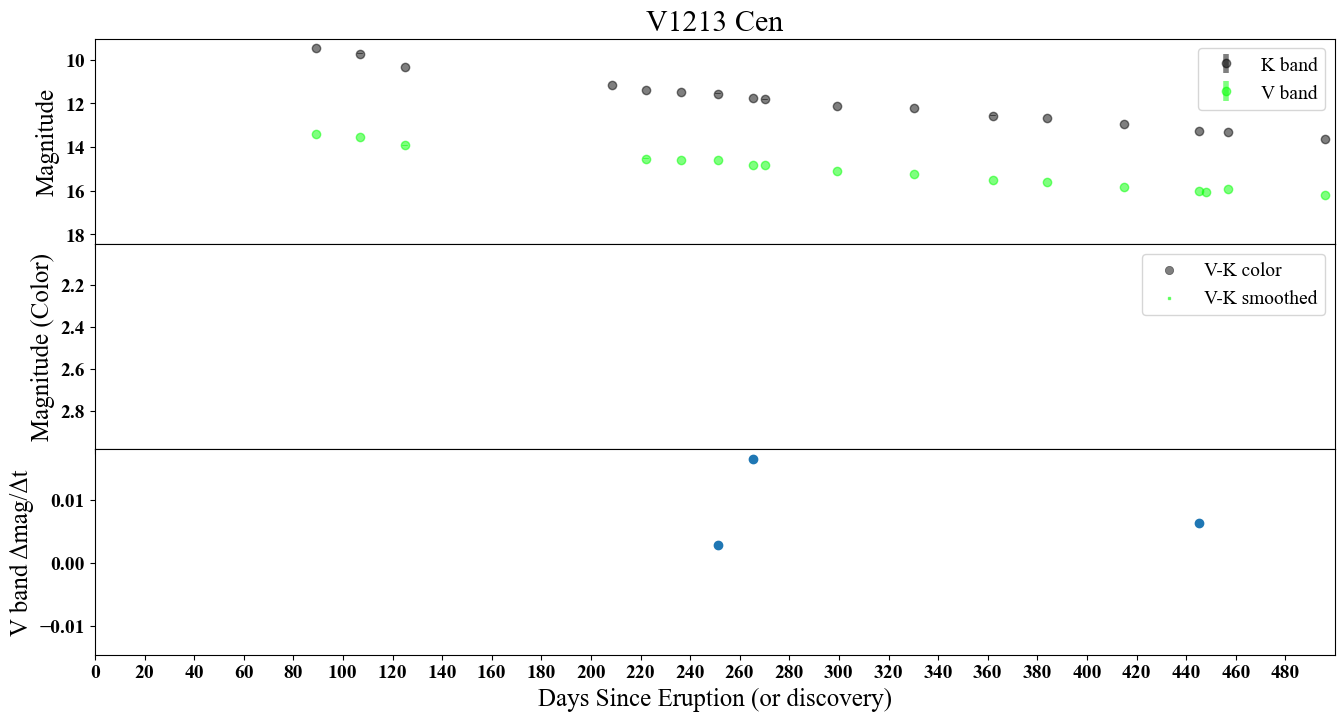

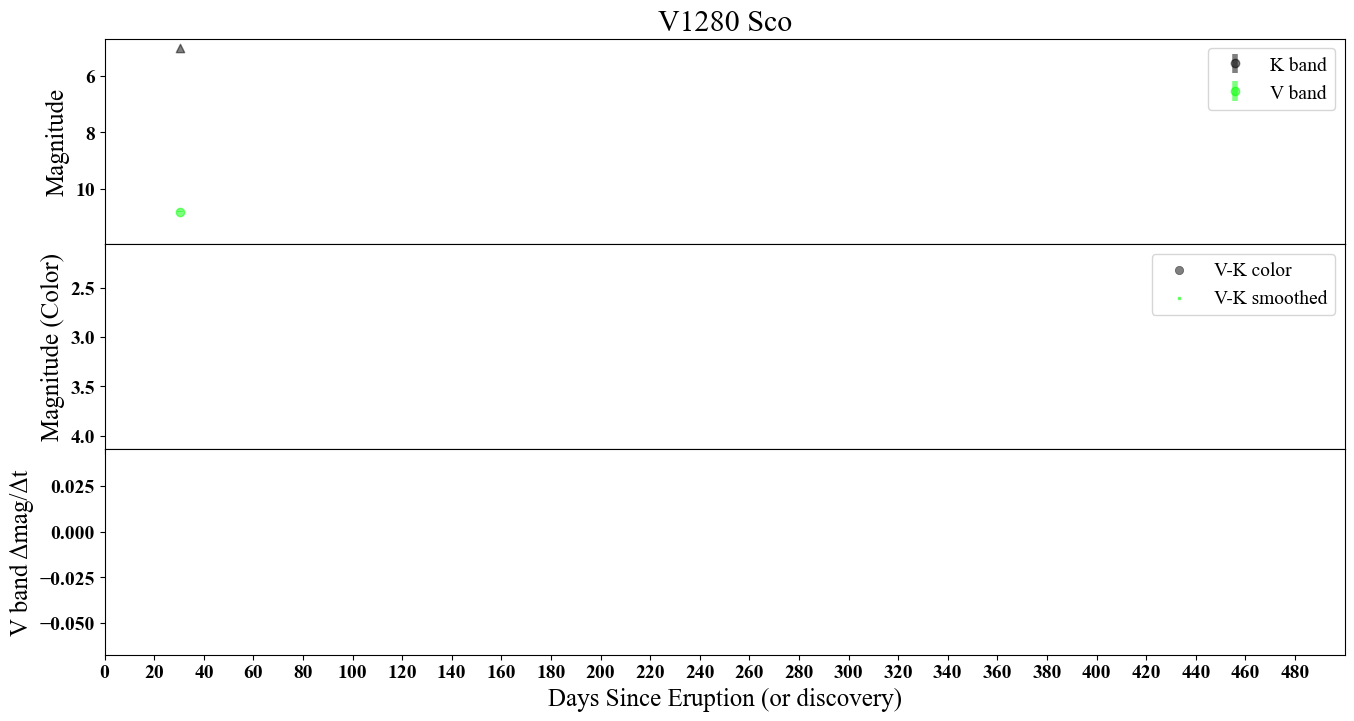

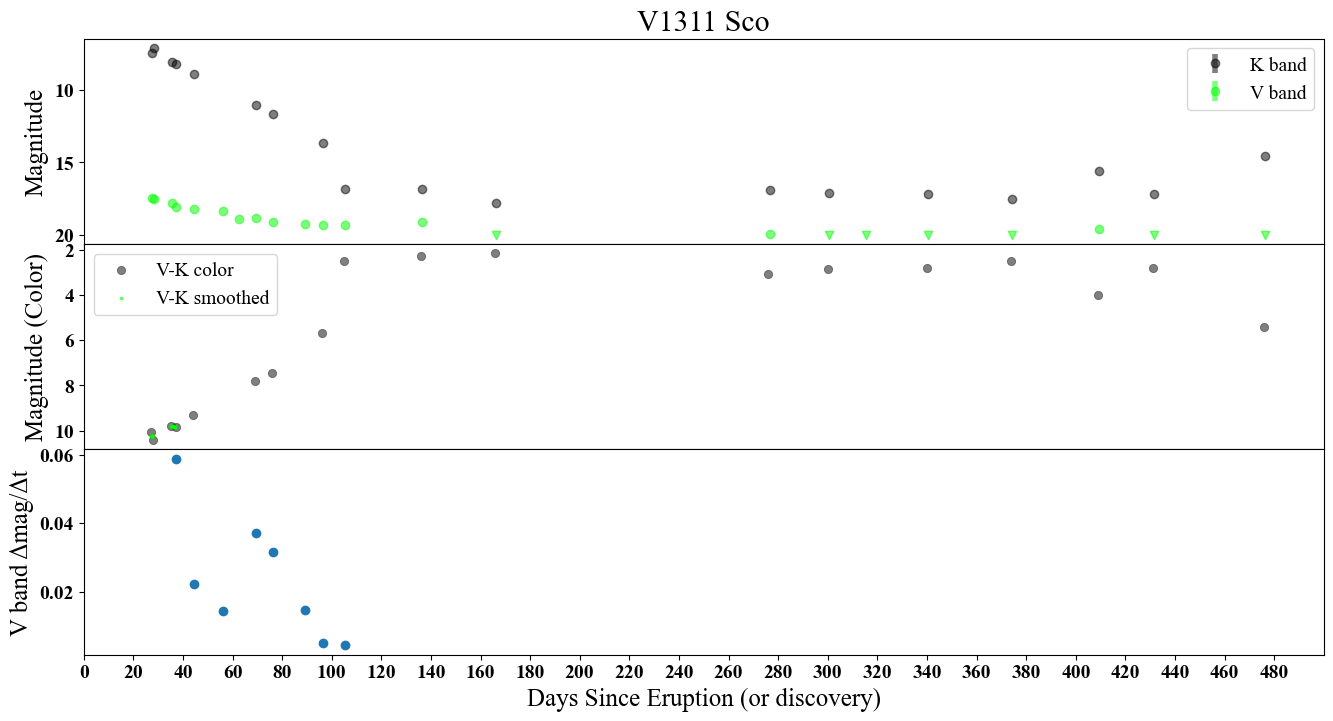

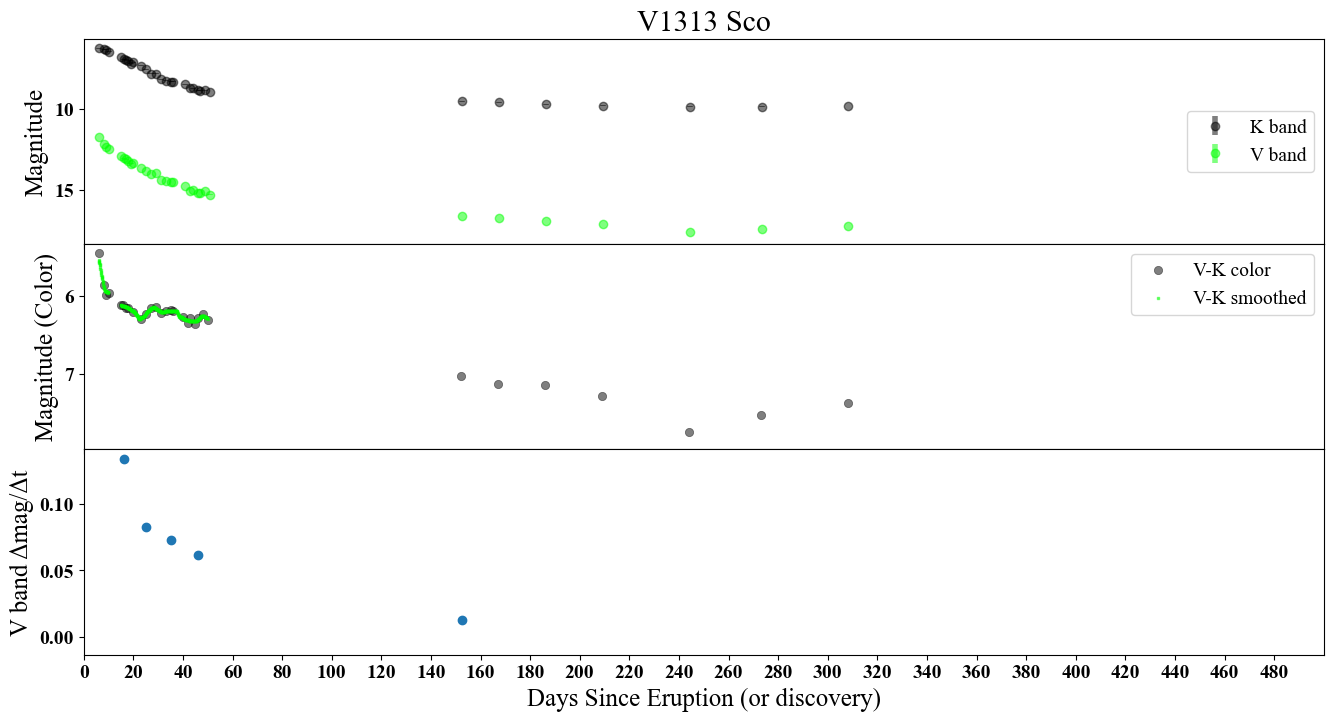

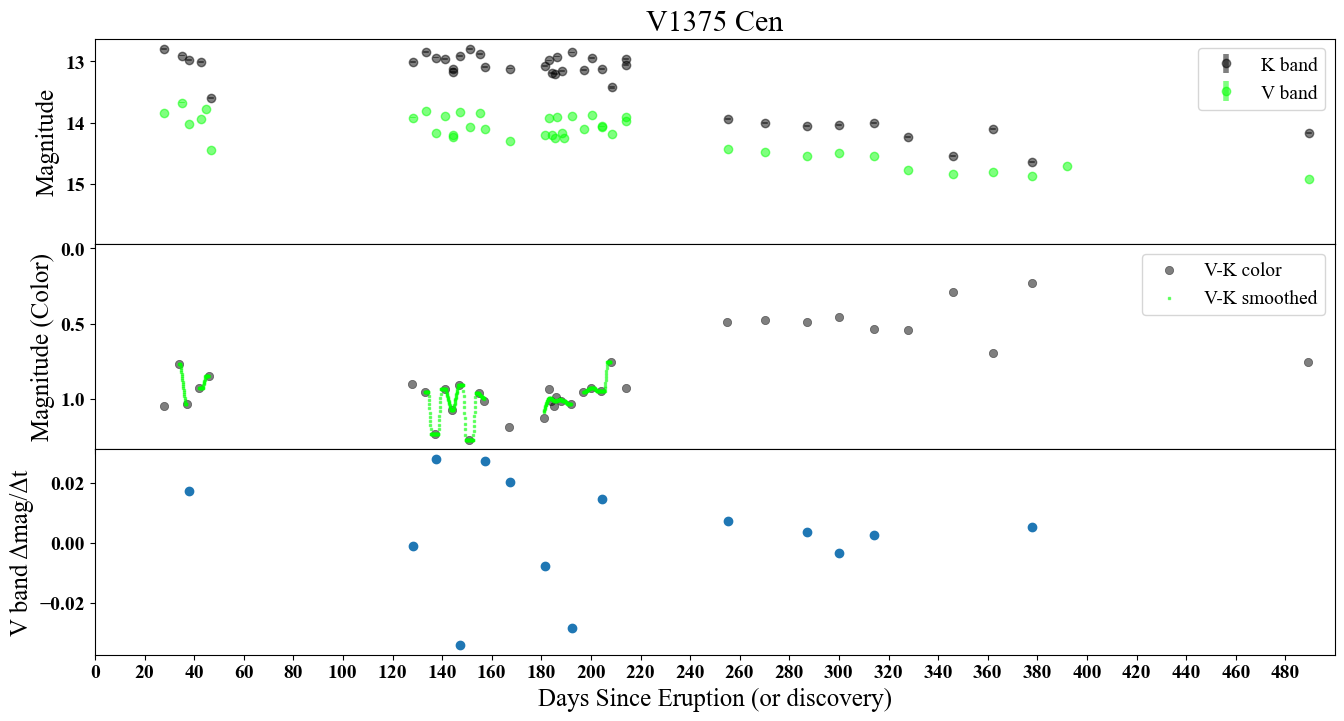

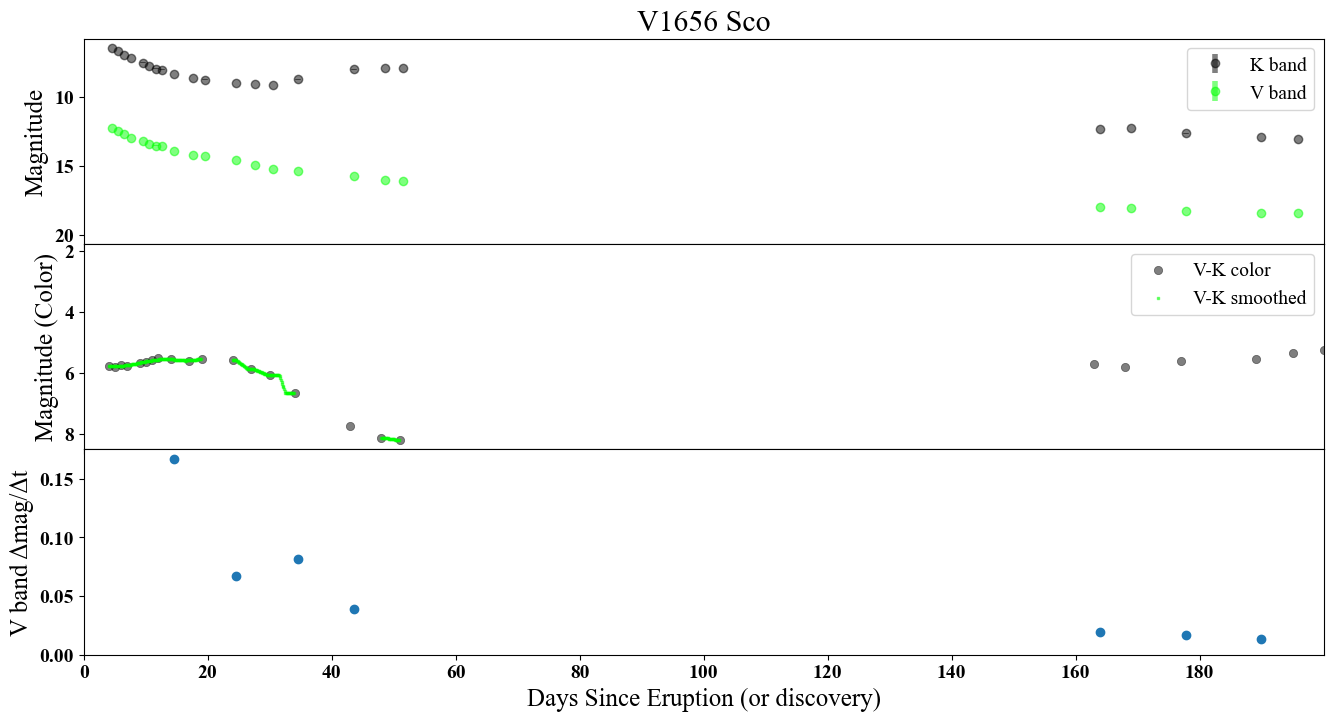

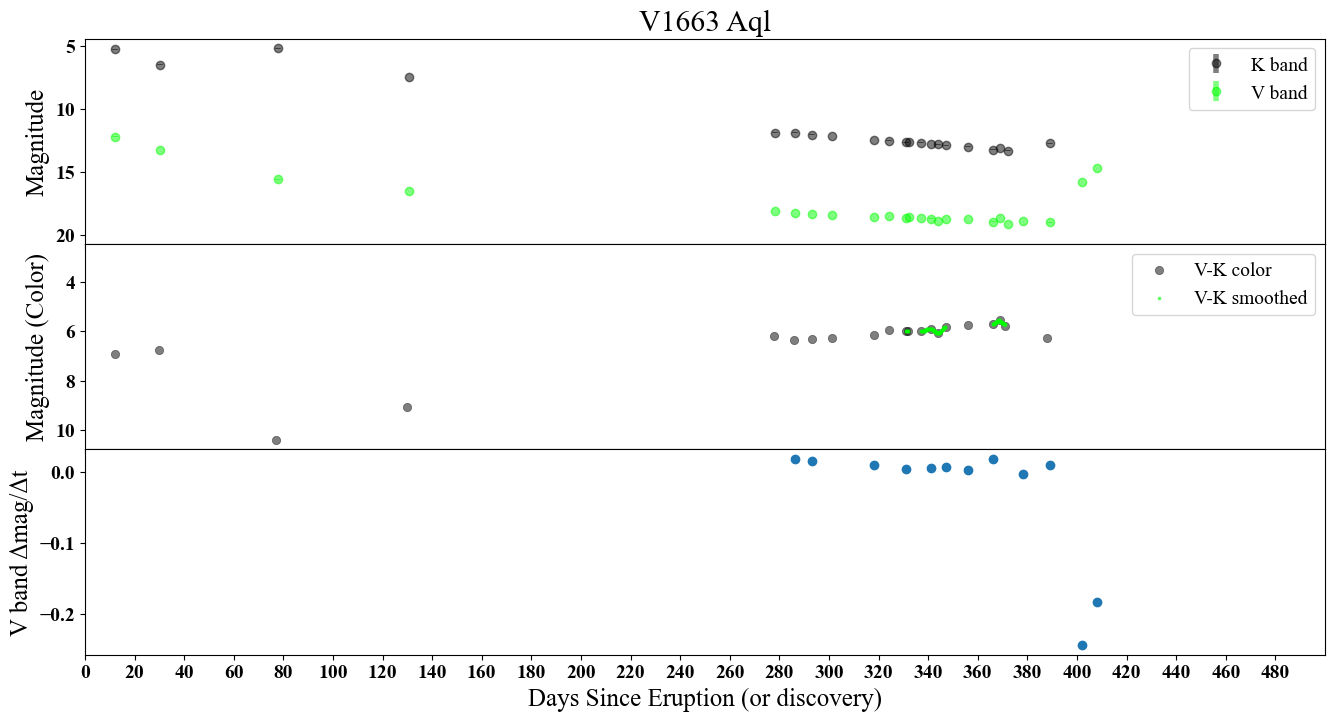

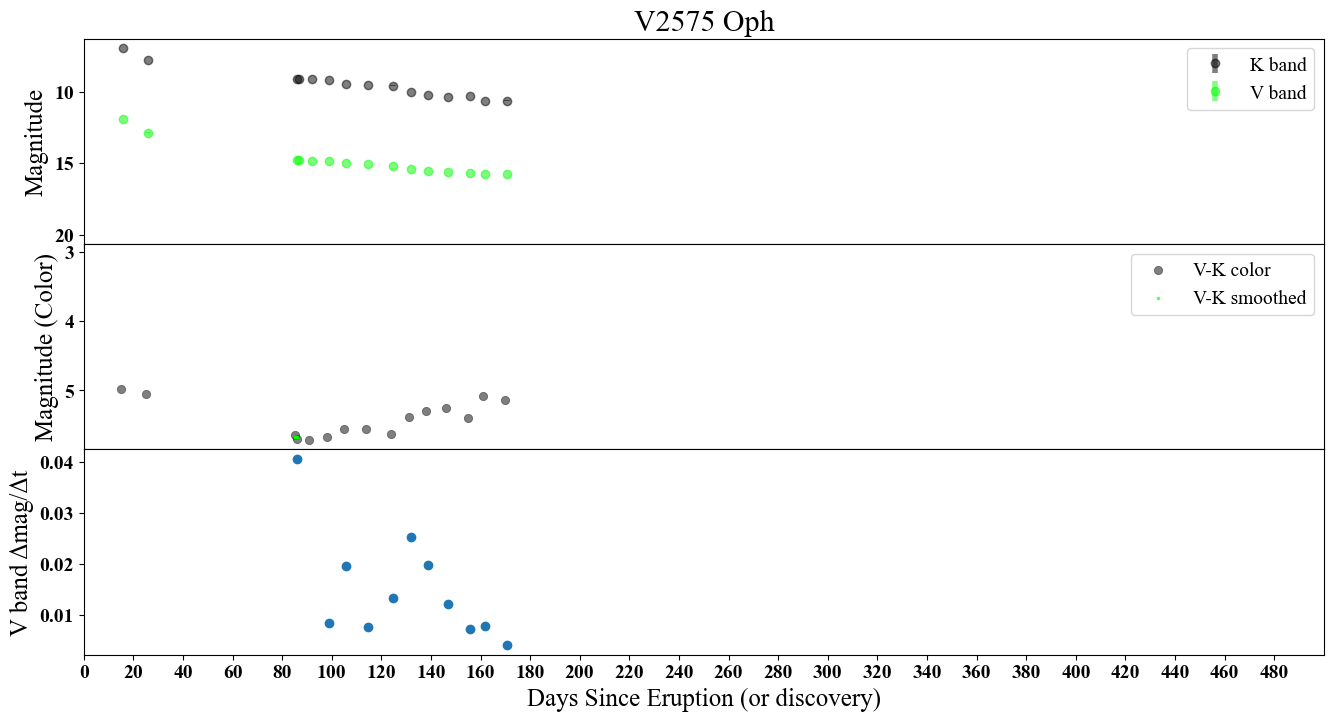

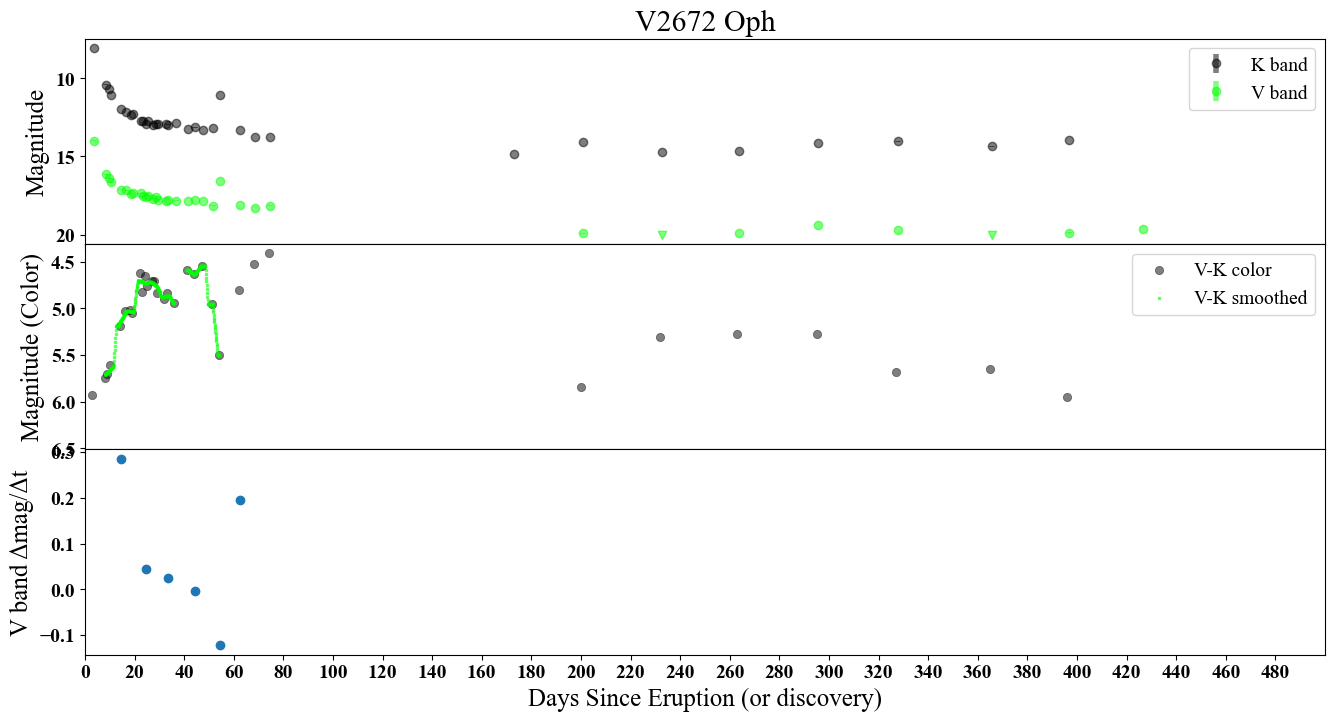

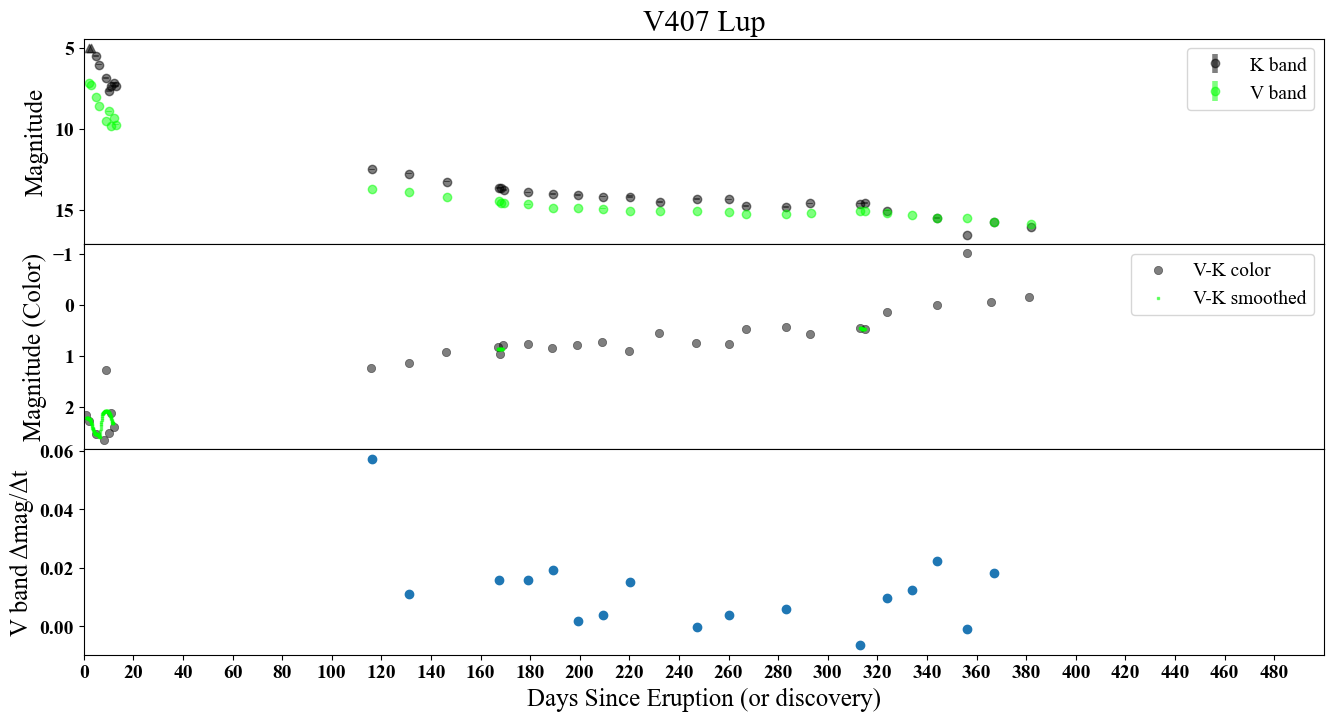

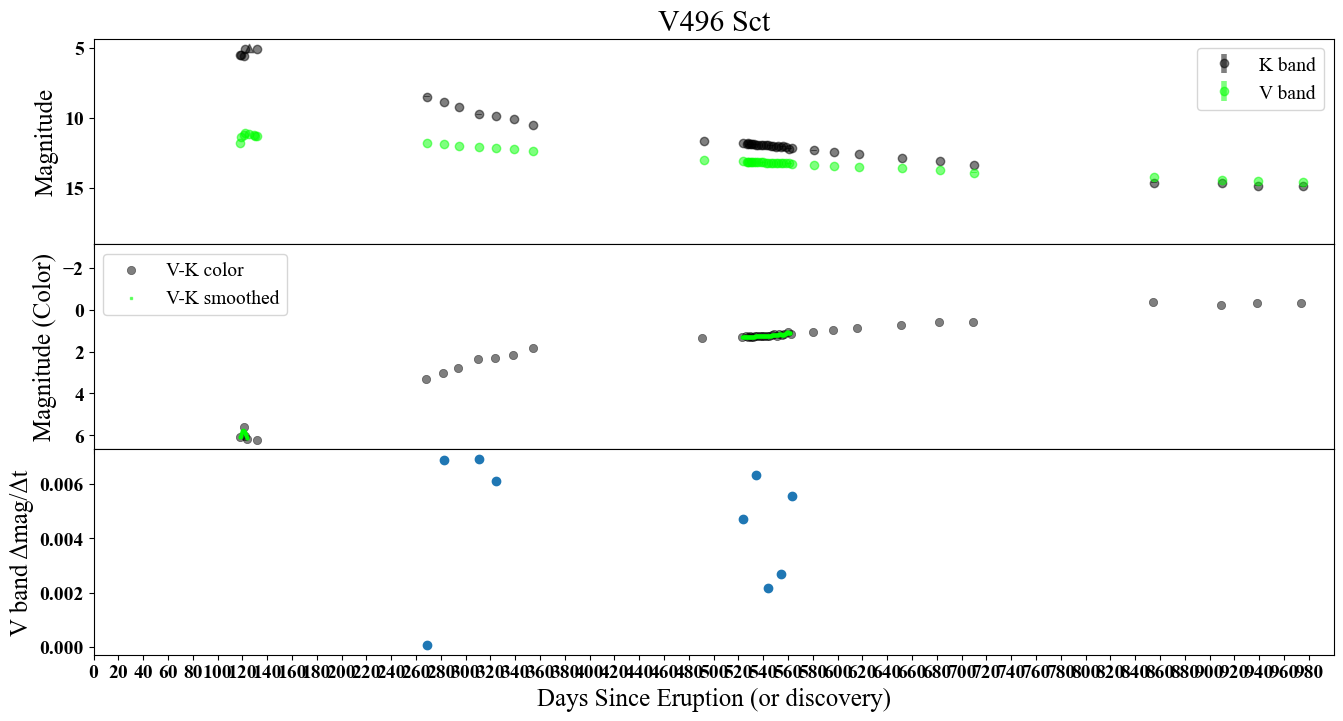

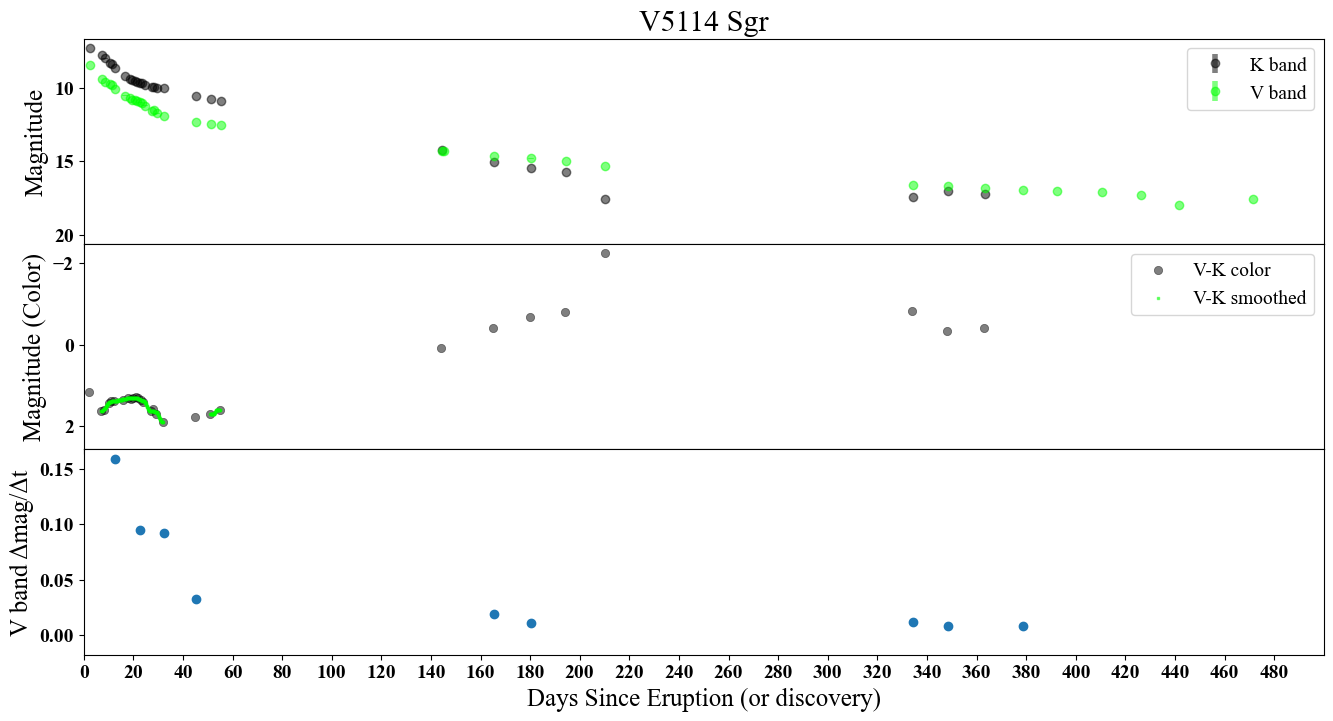

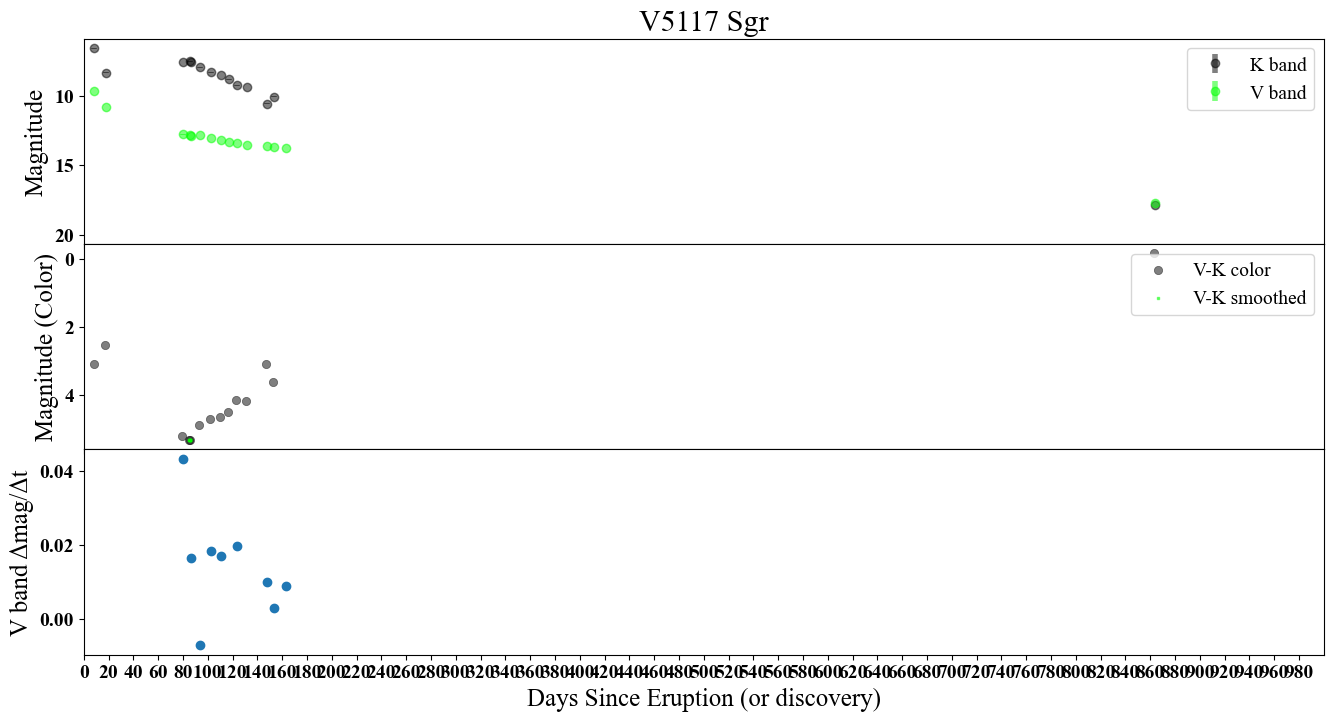

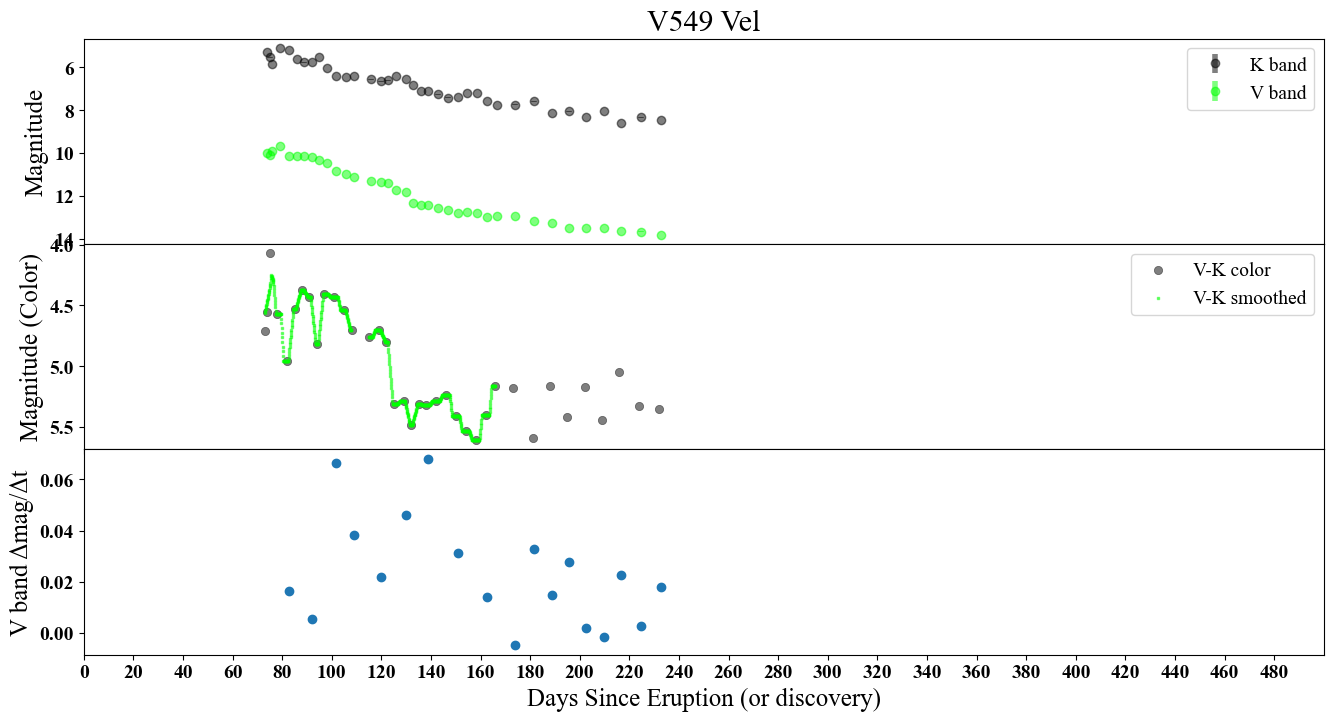

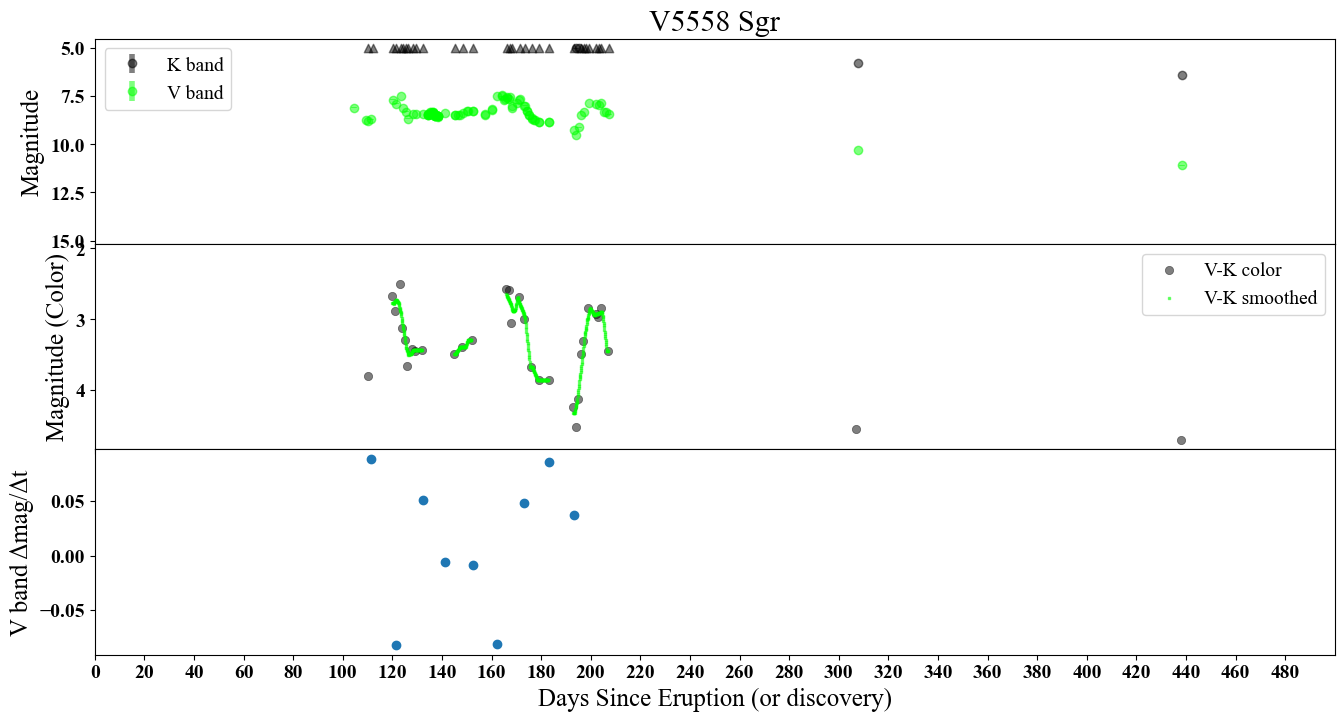

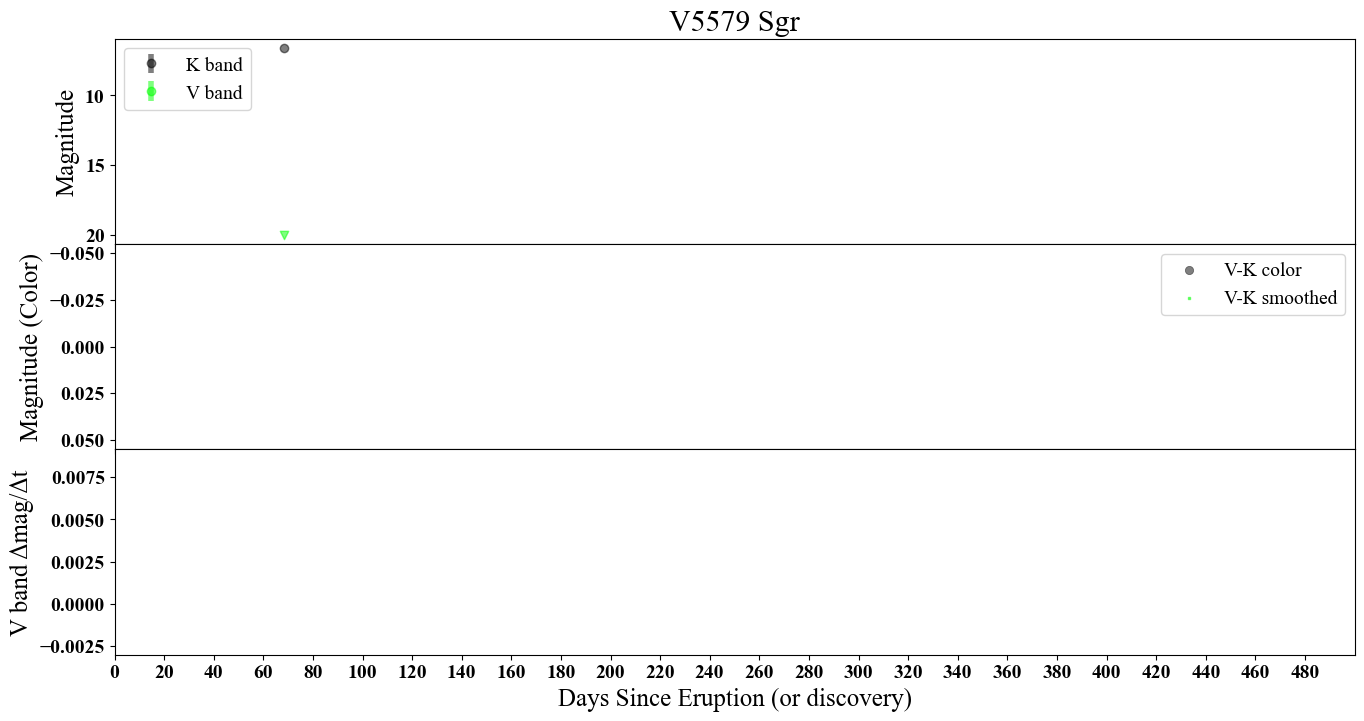

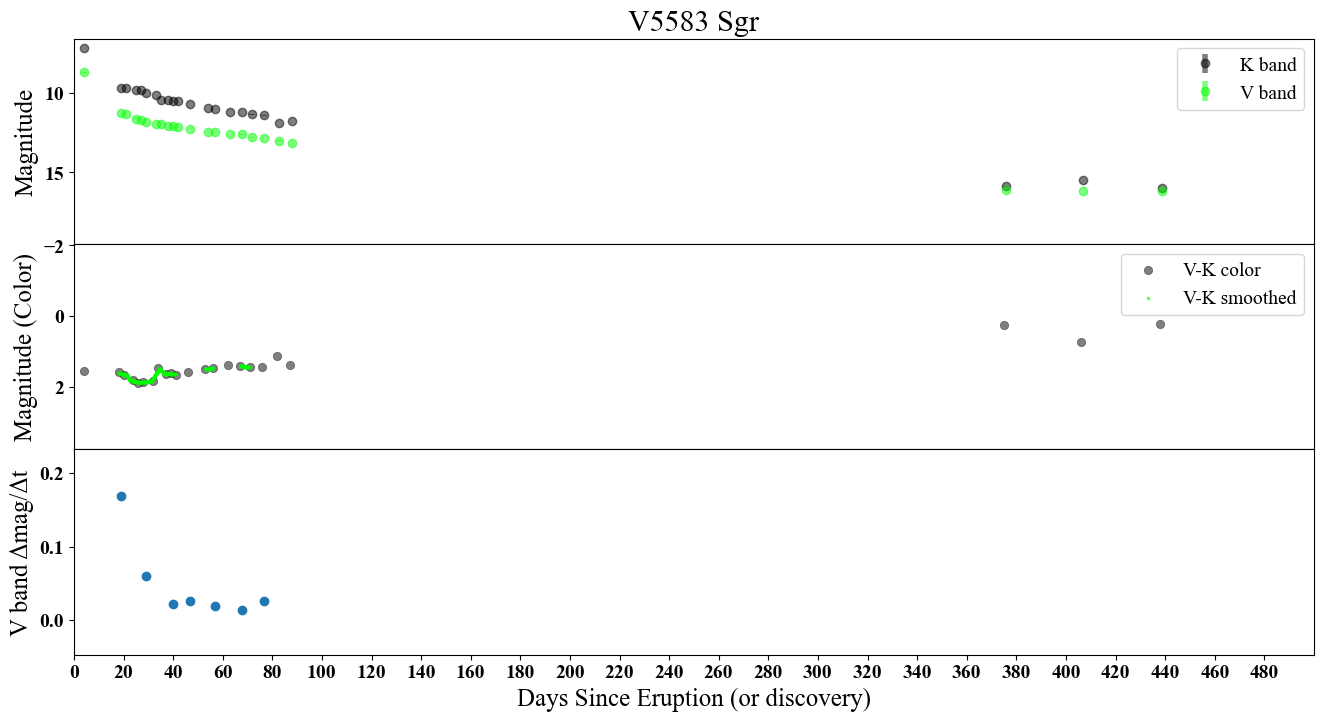

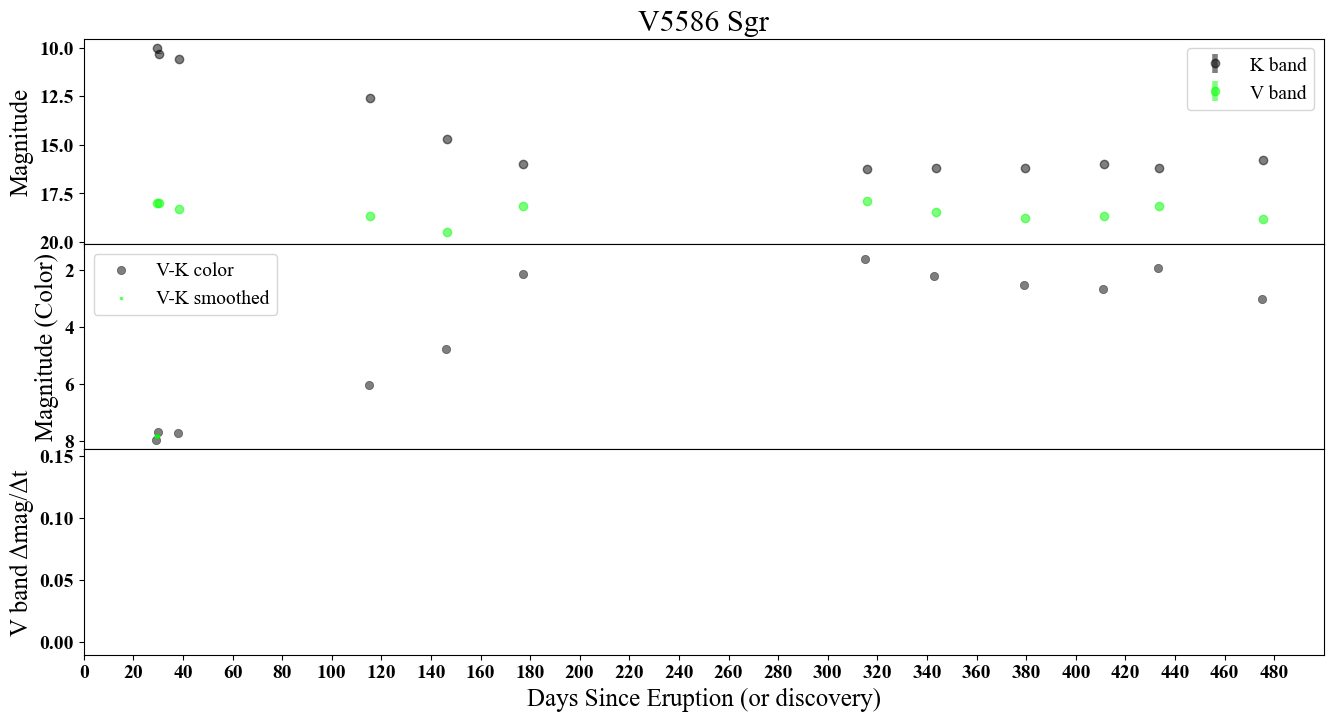

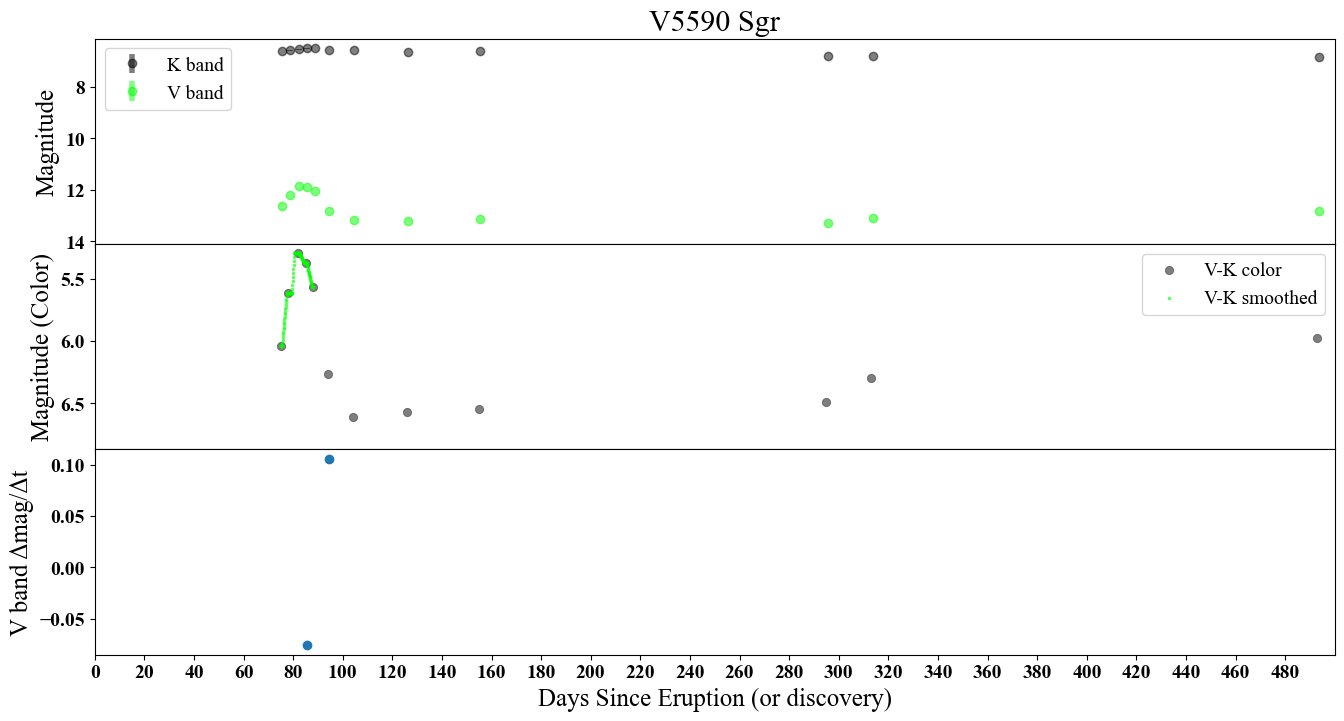

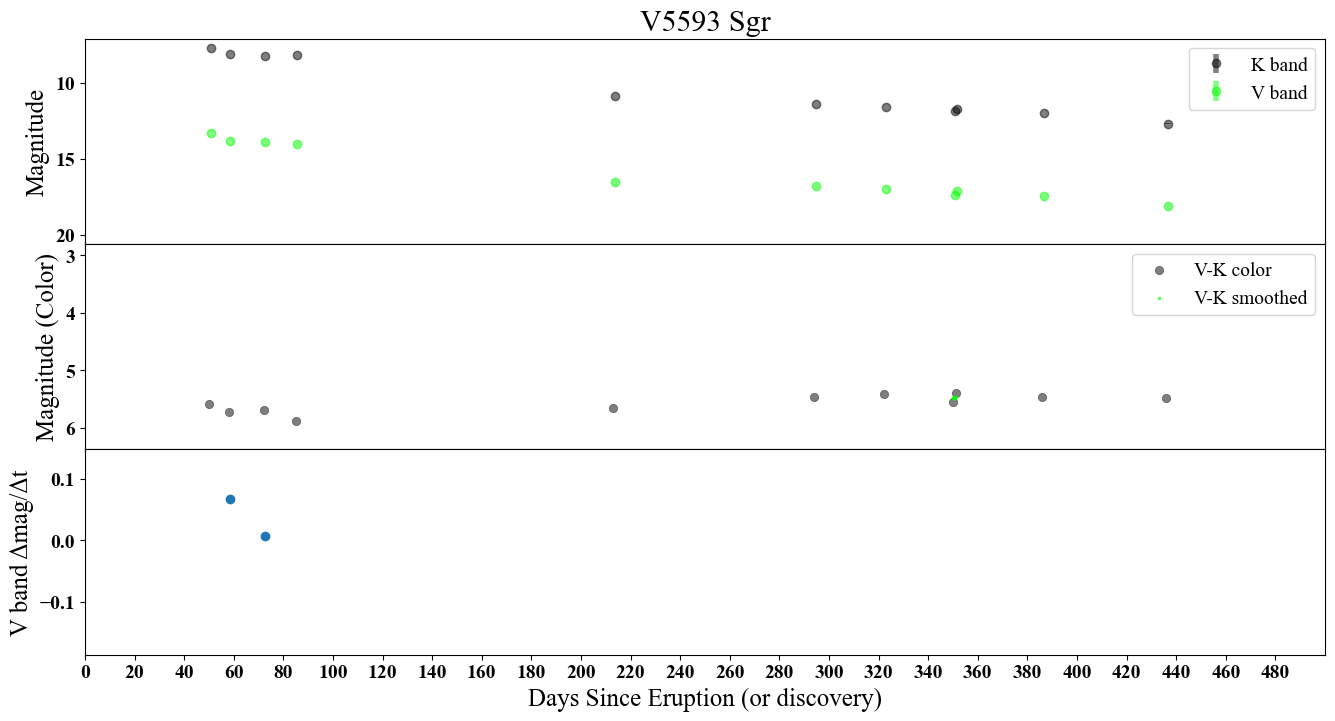

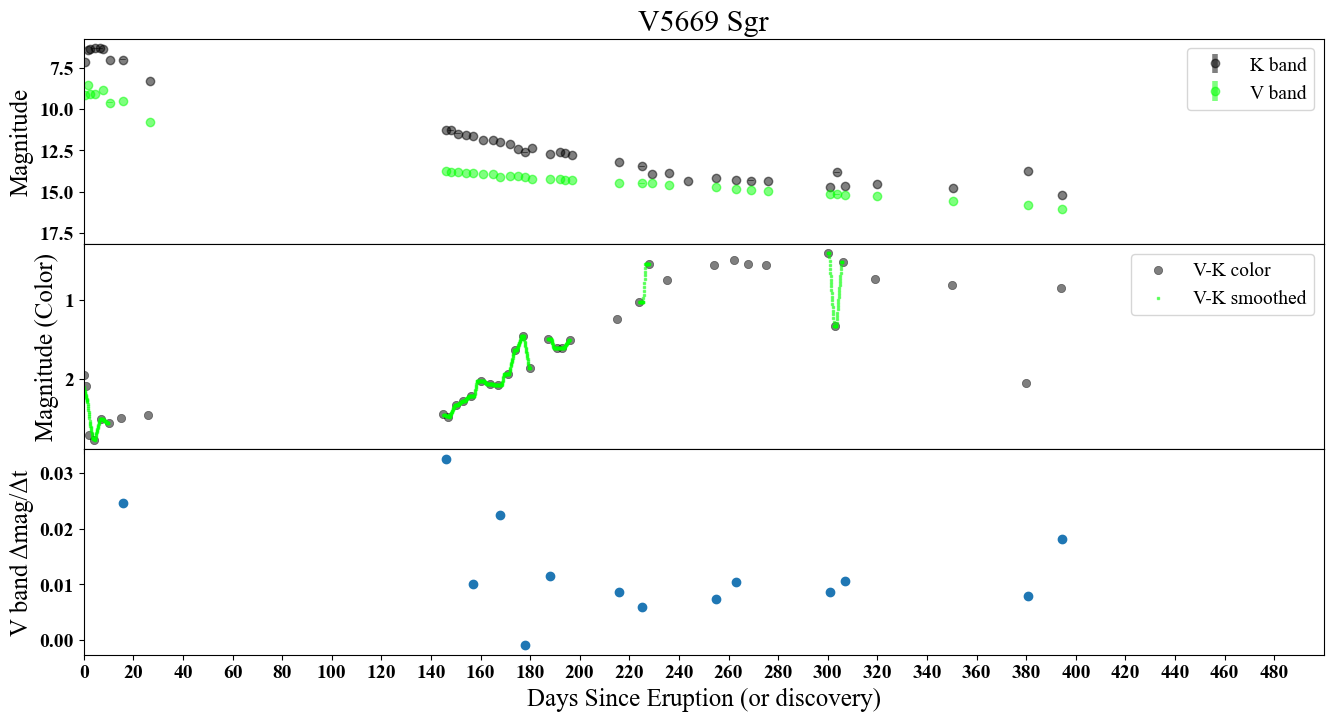

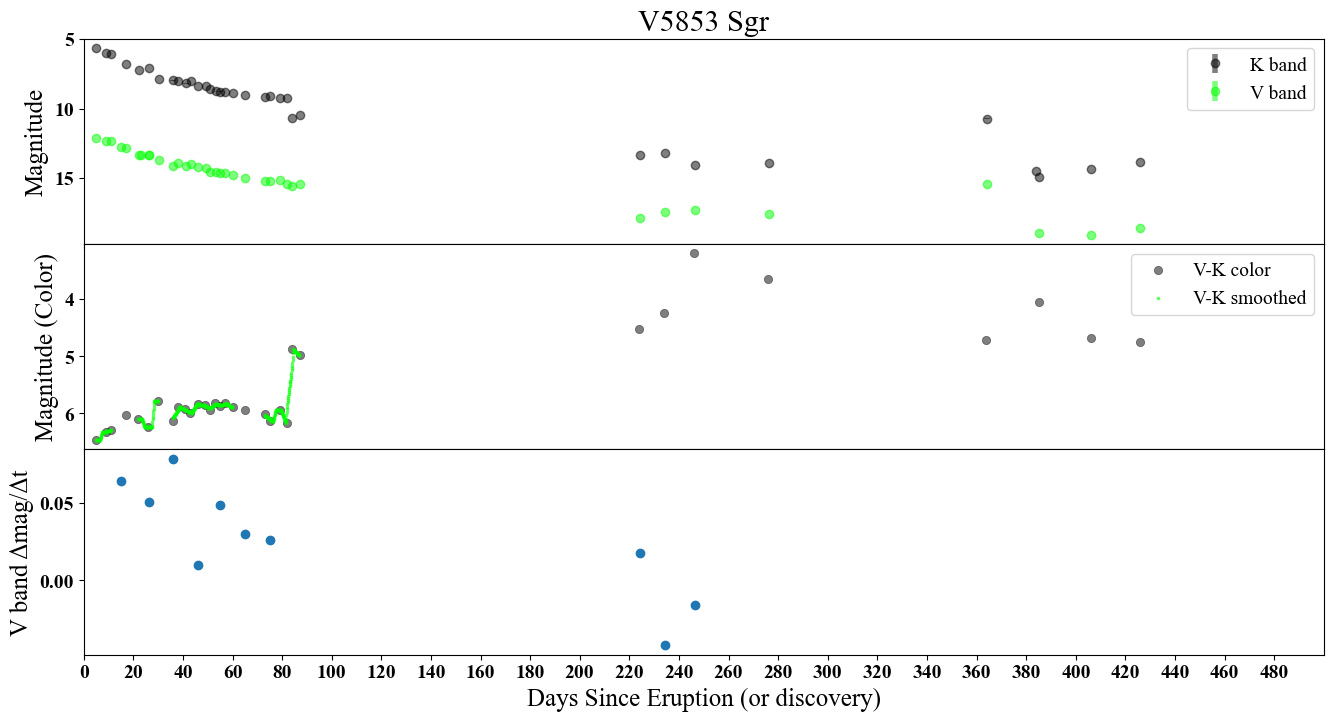

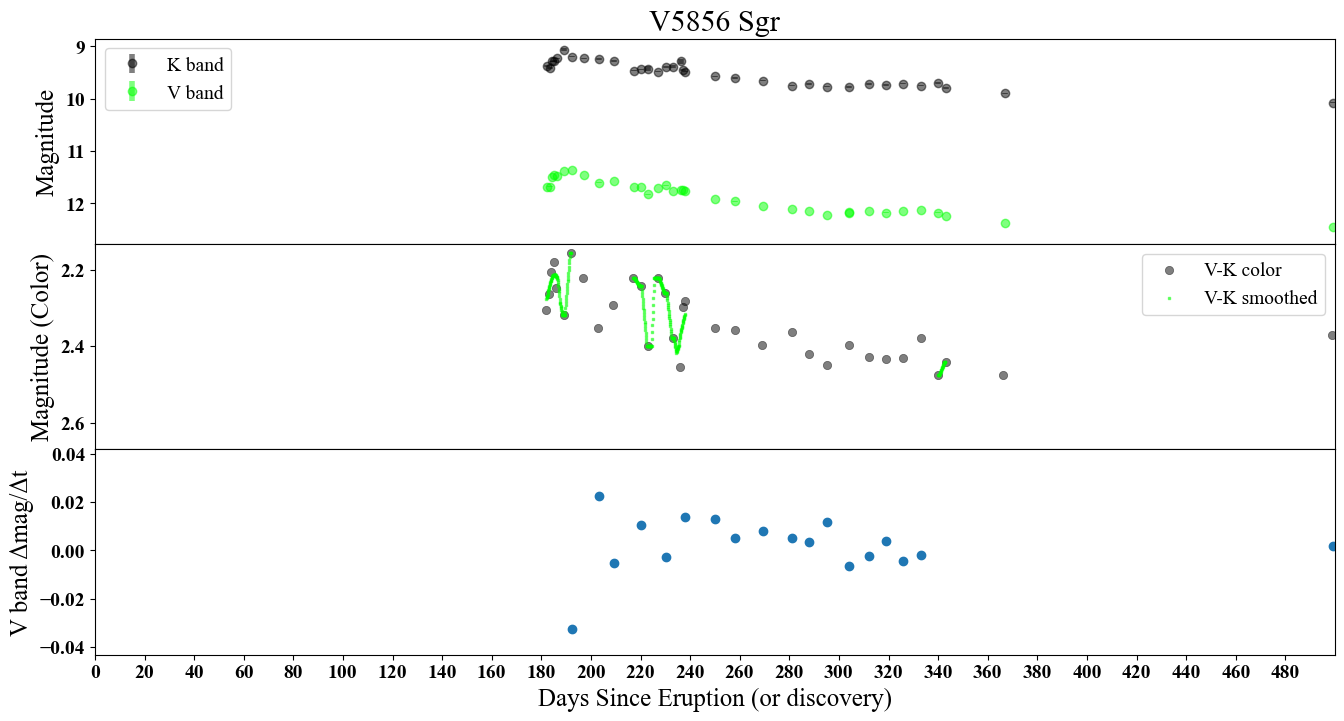

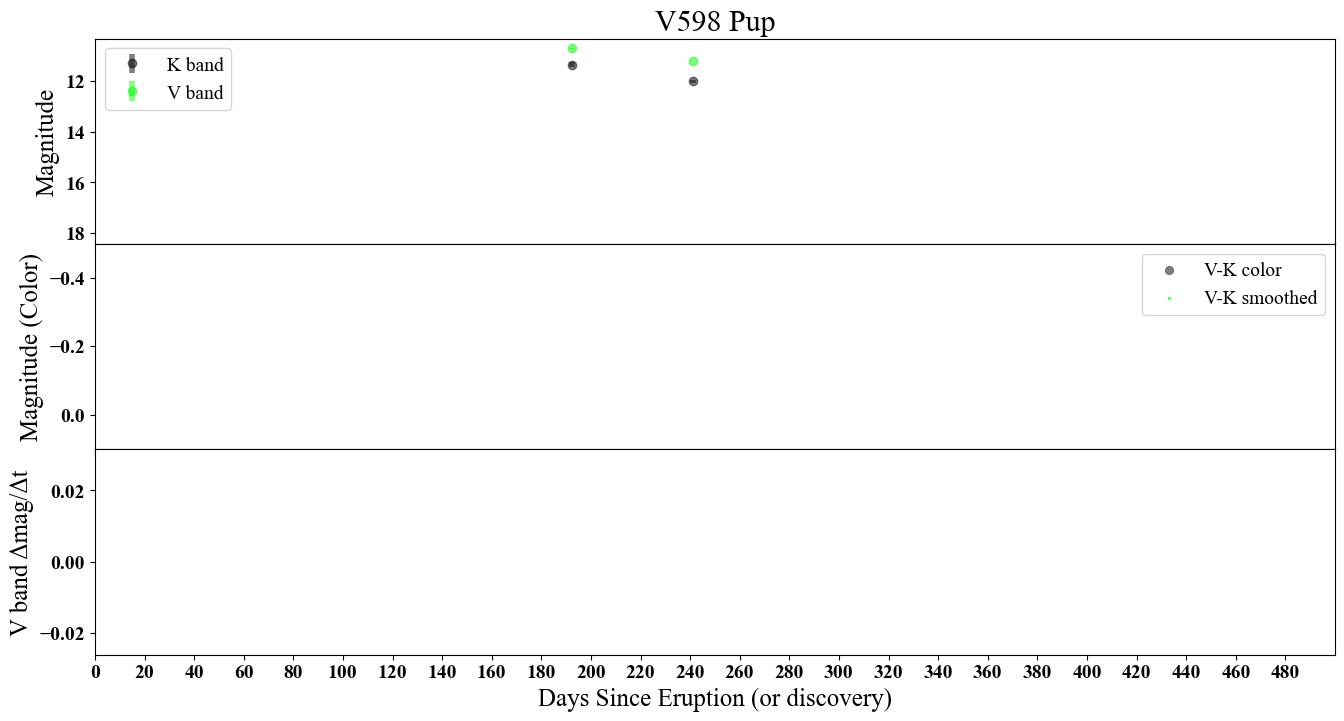

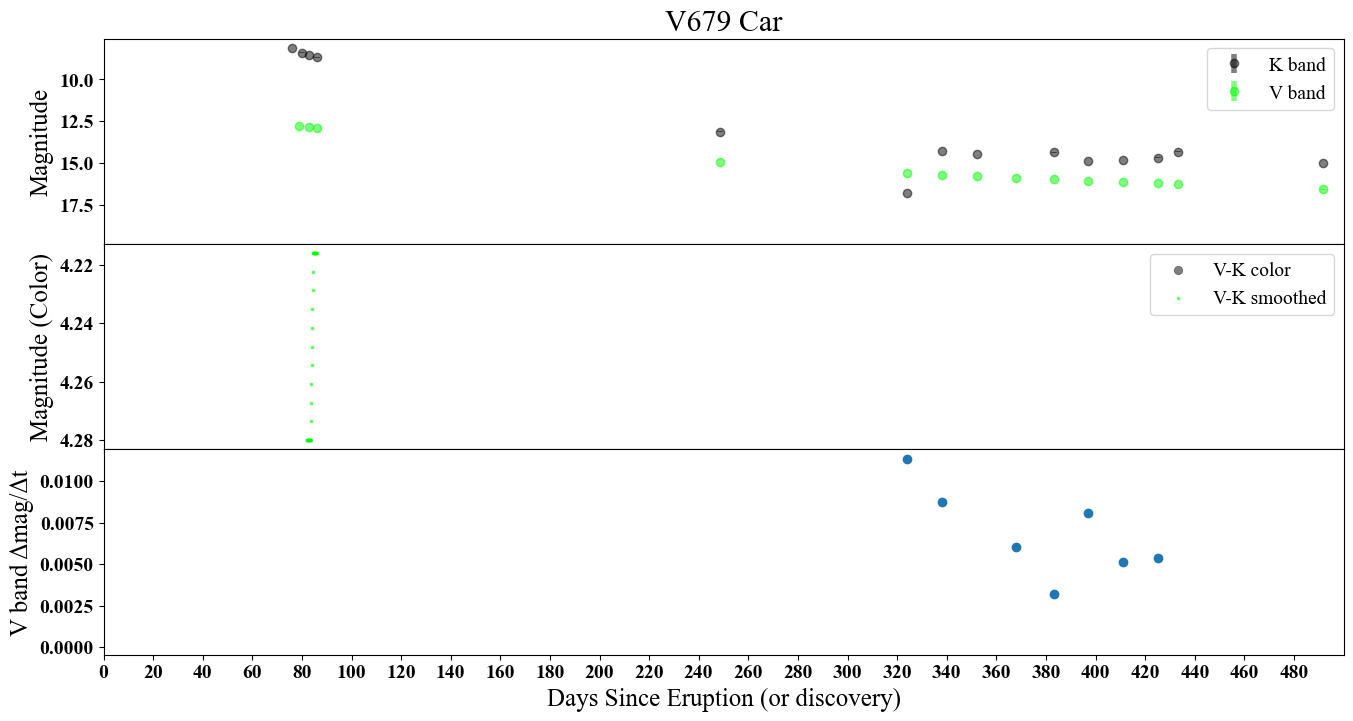

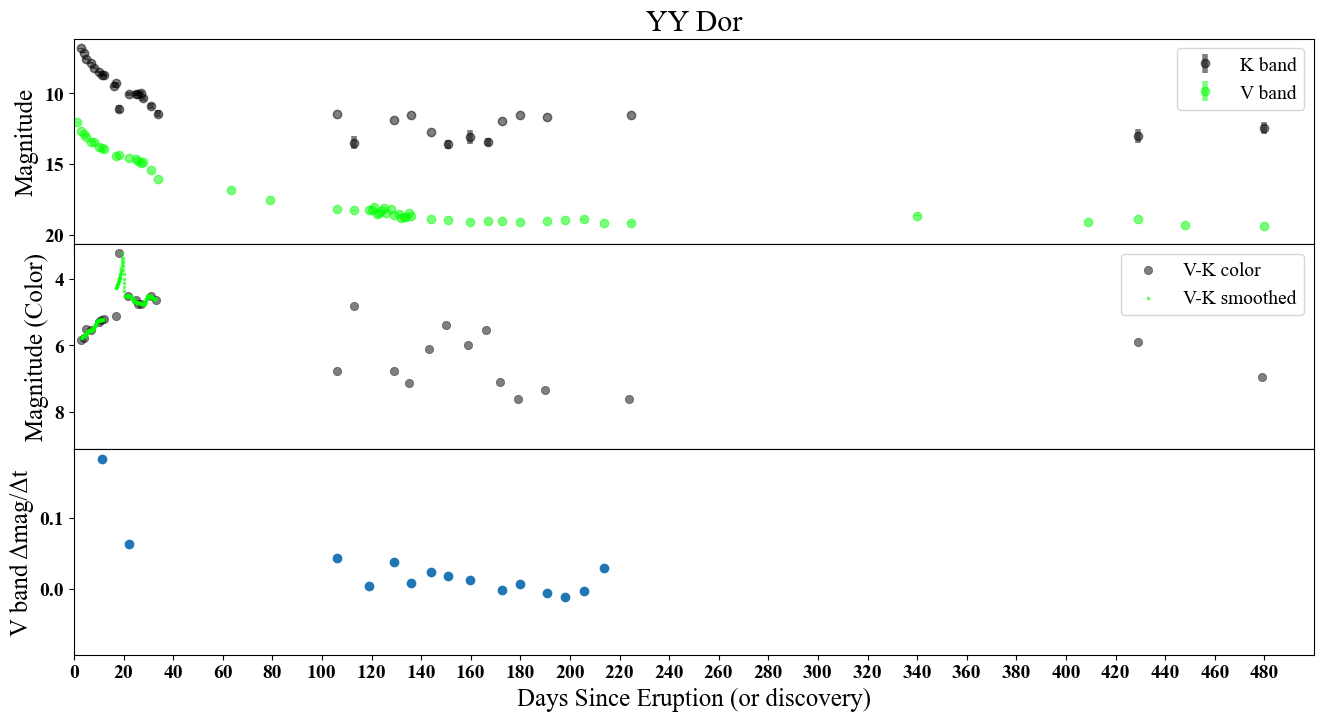

In [20]:
#main plots for unusable
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==-2:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        KV_daylistsmooth=KV_daylistsmooth_list[ii]
        KV_maglistsmooth=KV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
        fig.set_size_inches(16,8)
        fig.subplots_adjust(hspace=0)
        ax1.errorbar(*removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii]),elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(*removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii]),elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(KV_daylist,KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.scatter(KV_daylistsmooth,KV_maglistsmooth,color=KVsmoothcolor,label=KVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax3.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        dxx,dyy=dxdy10pm5(np.array(Vdate),np.array(Vmag))
        ax3.scatter(dxx,dyy)
        ax3.set_ylabel('V band Δmag/Δt')
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files_unusable\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+'deriv_'+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
#        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

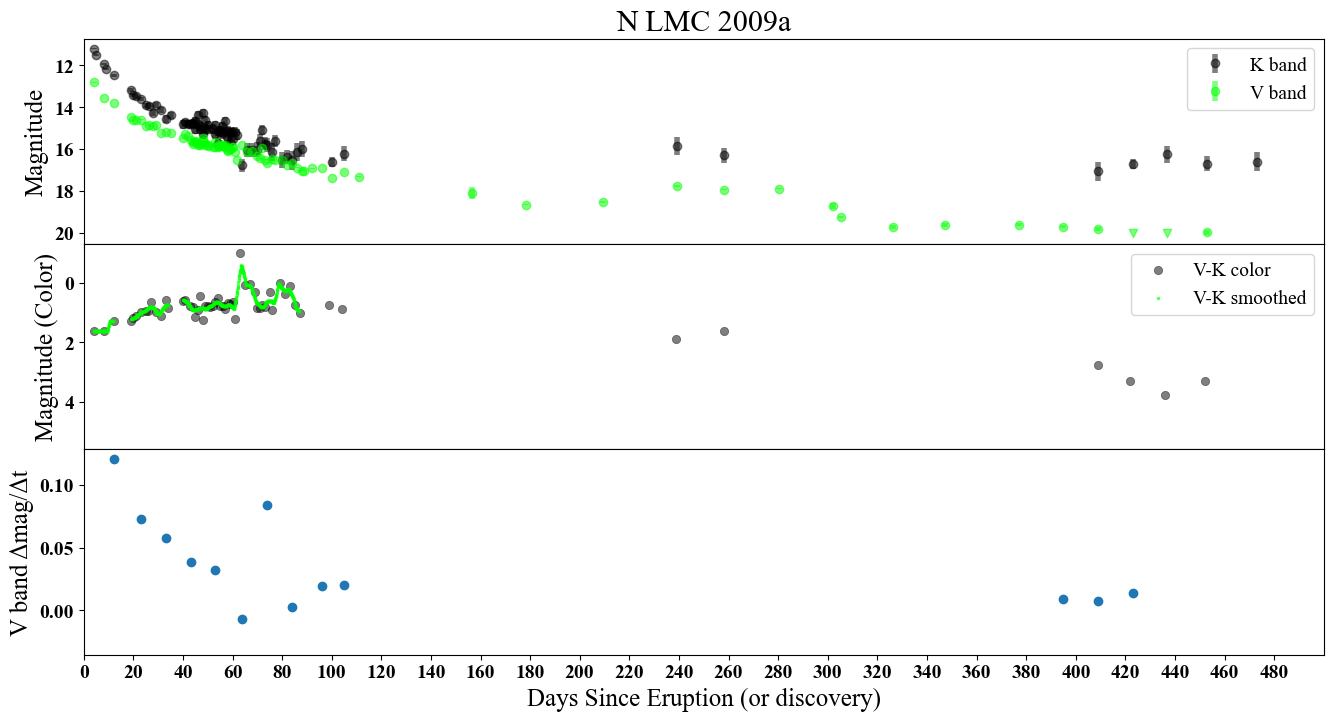

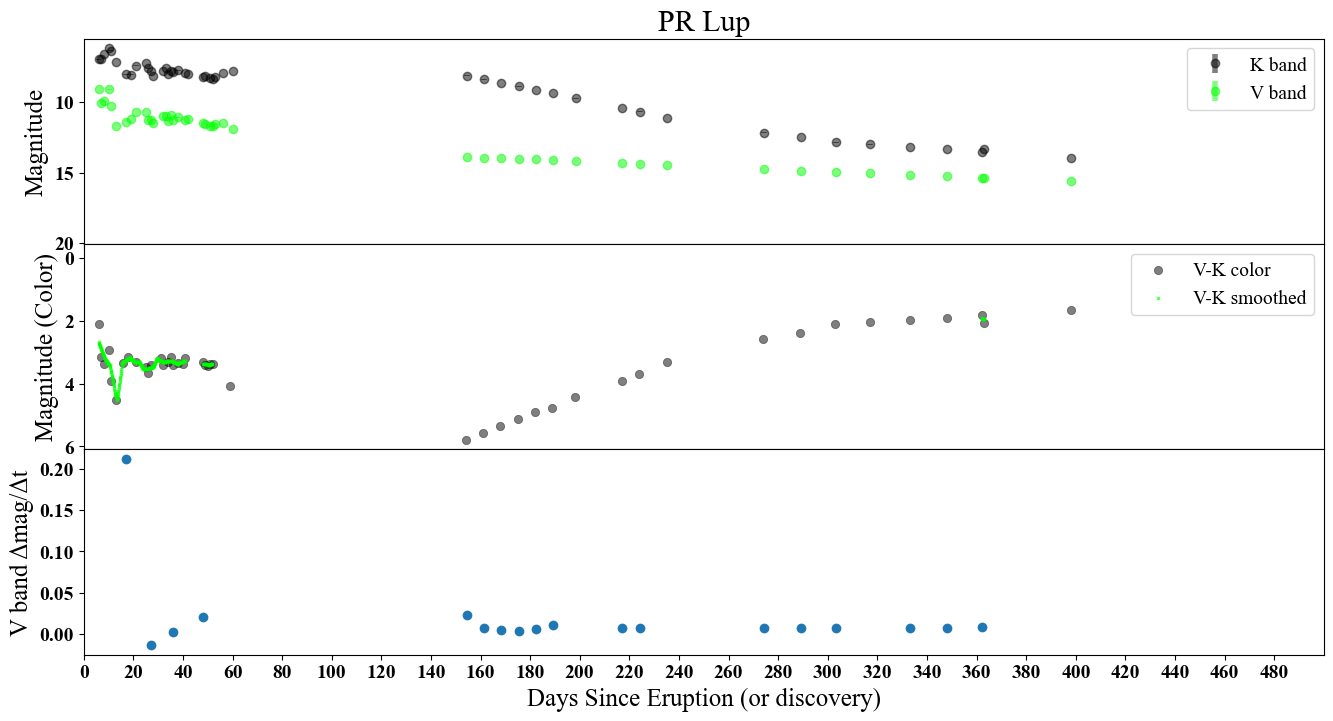

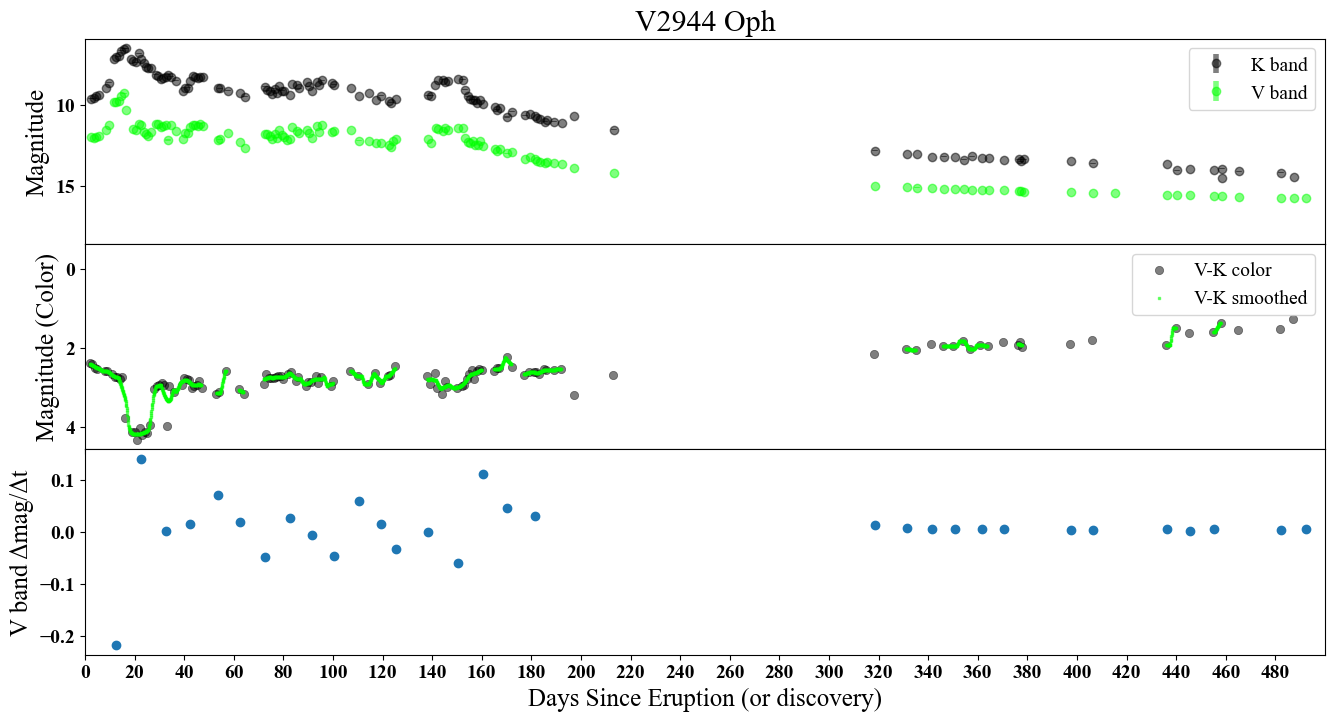

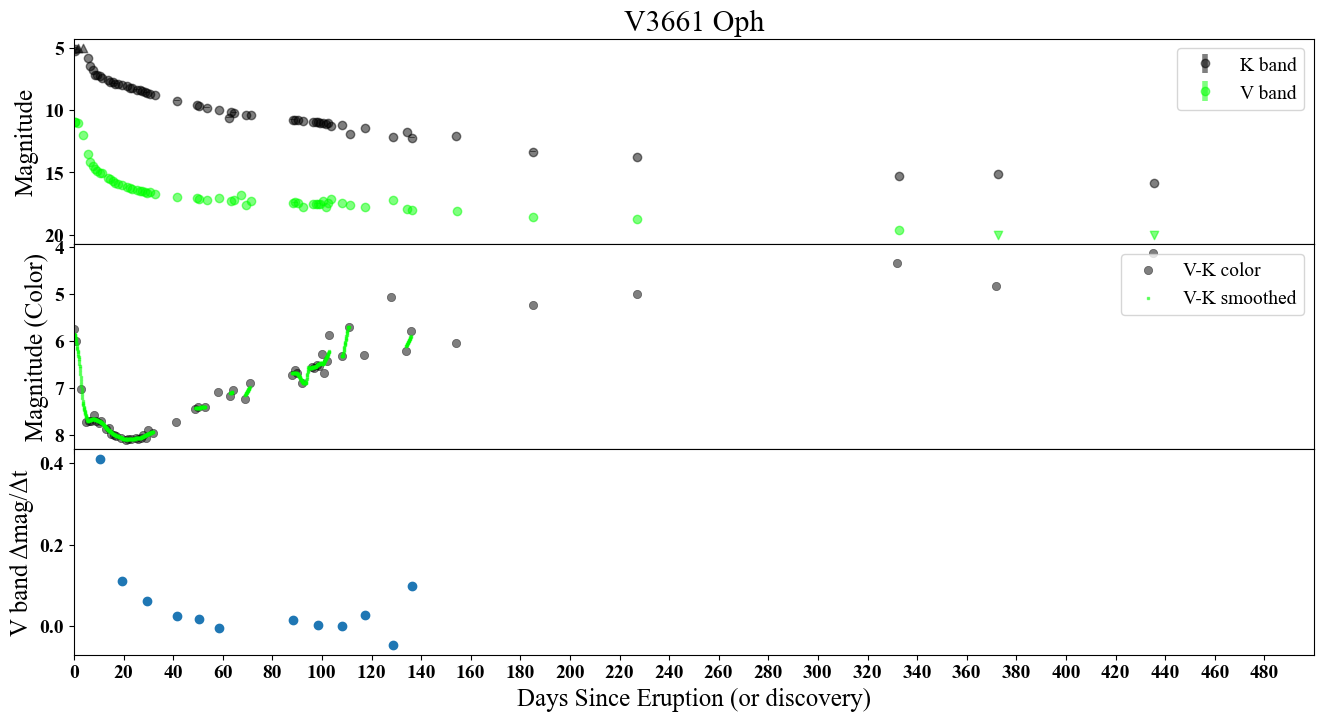

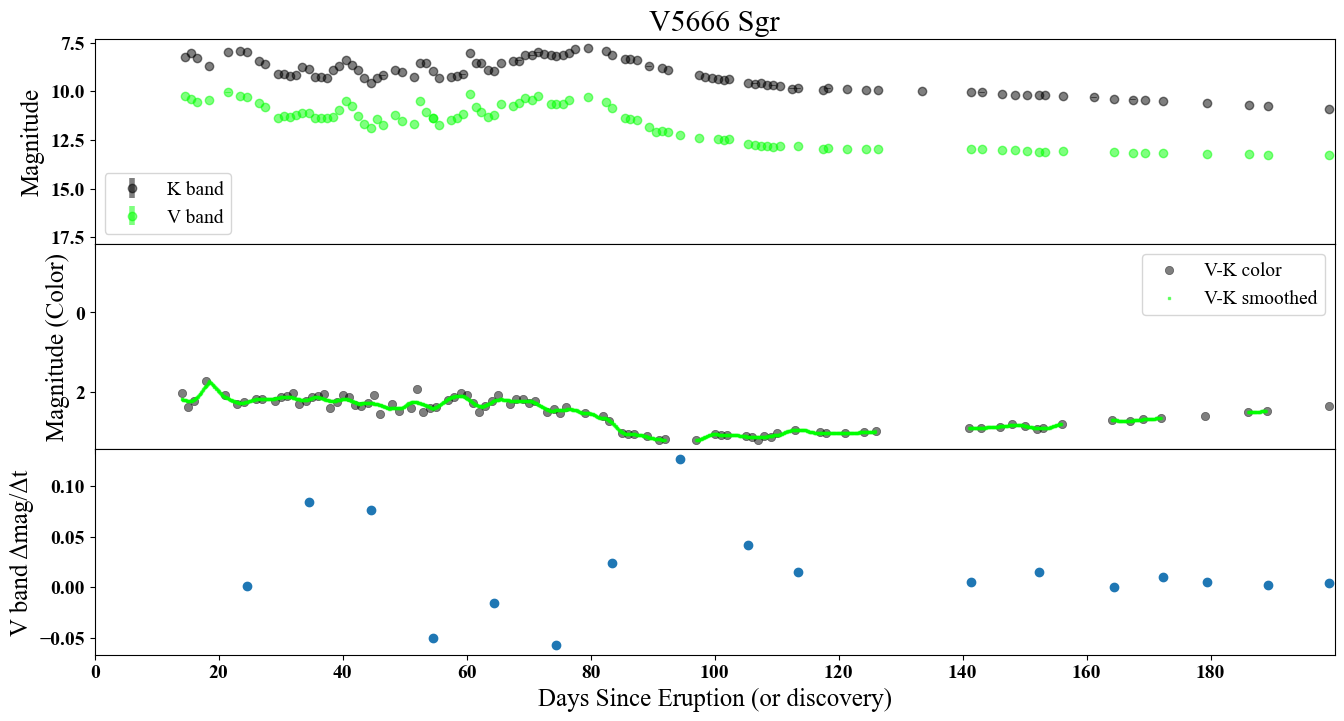

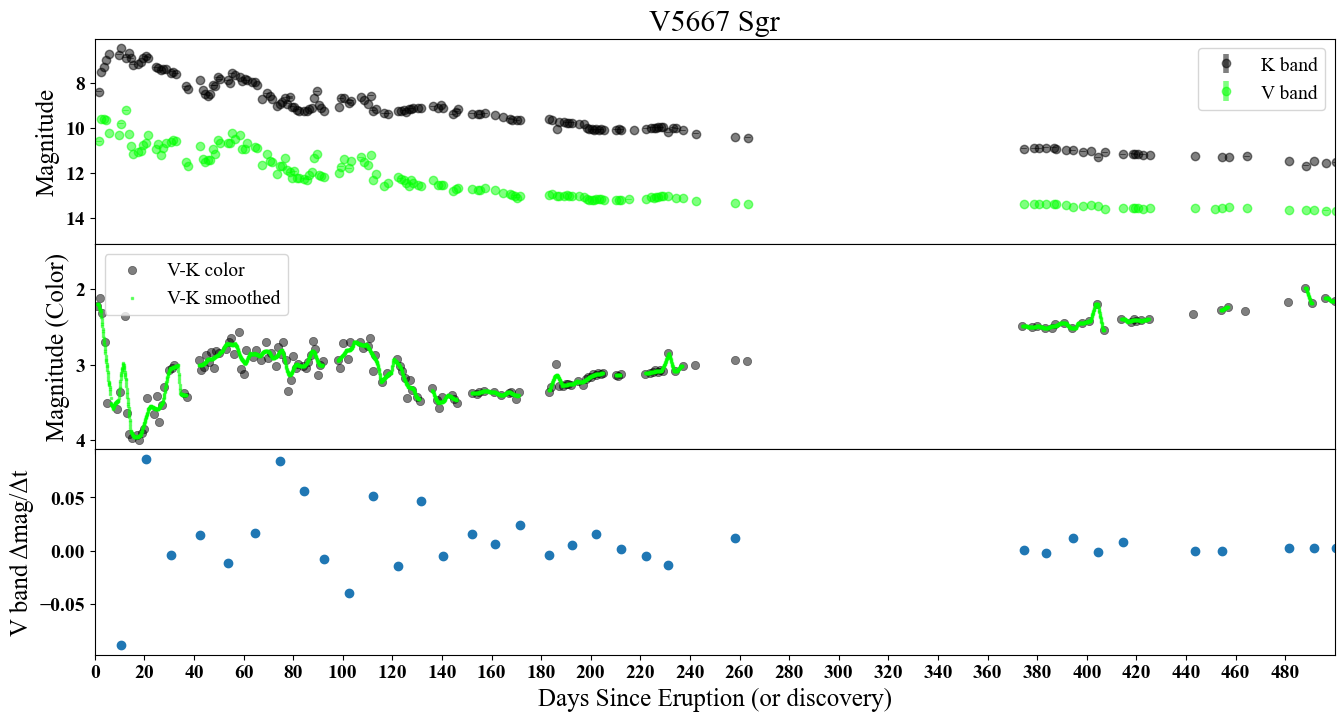

In [21]:
#main plots for unsure
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==-1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        KV_daylistsmooth=KV_daylistsmooth_list[ii]
        KV_maglistsmooth=KV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
        fig.set_size_inches(16,8)
        fig.subplots_adjust(hspace=0)
        ax1.errorbar(*removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii]),elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(*removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii]),elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(KV_daylist,KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.scatter(KV_daylistsmooth,KV_maglistsmooth,color=KVsmoothcolor,label=KVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax3.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        dxx,dyy=dxdy10pm5(np.array(Vdate),np.array(Vmag))
        ax3.scatter(dxx,dyy)
        ax3.set_ylabel('V band Δmag/Δt')
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+'deriv_'+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
#        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

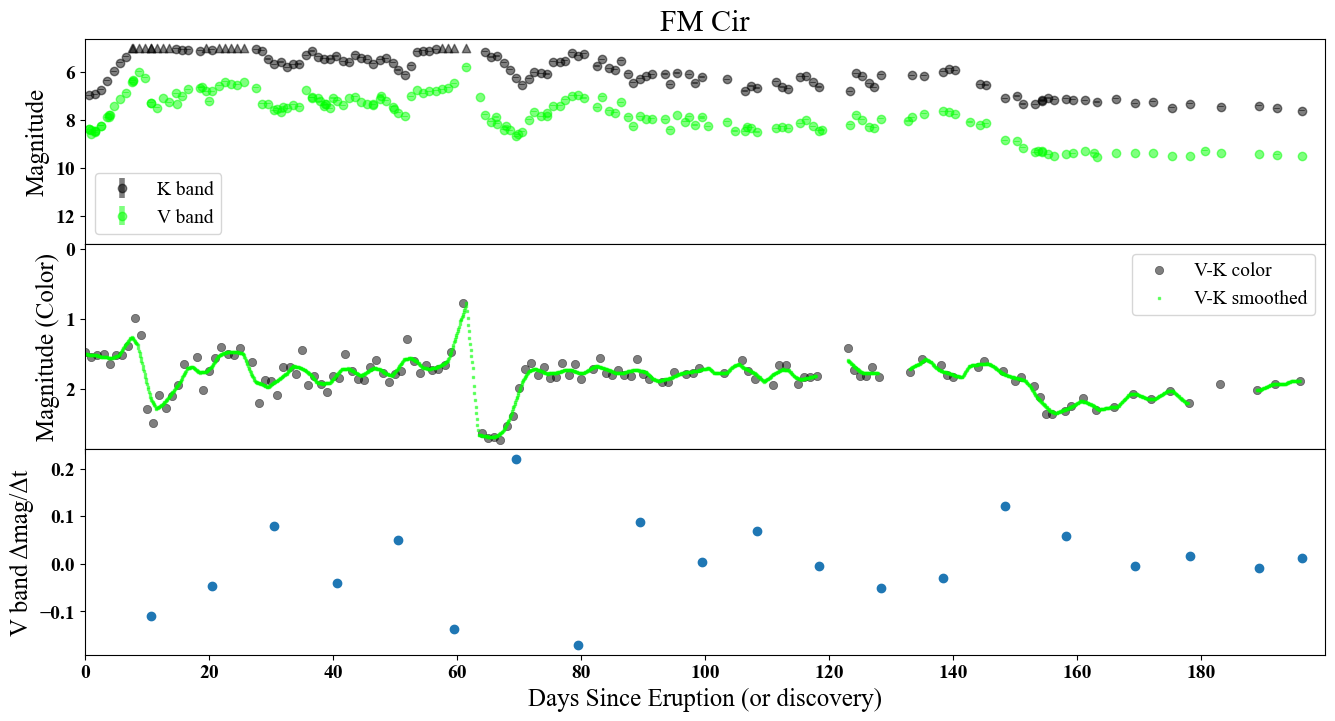

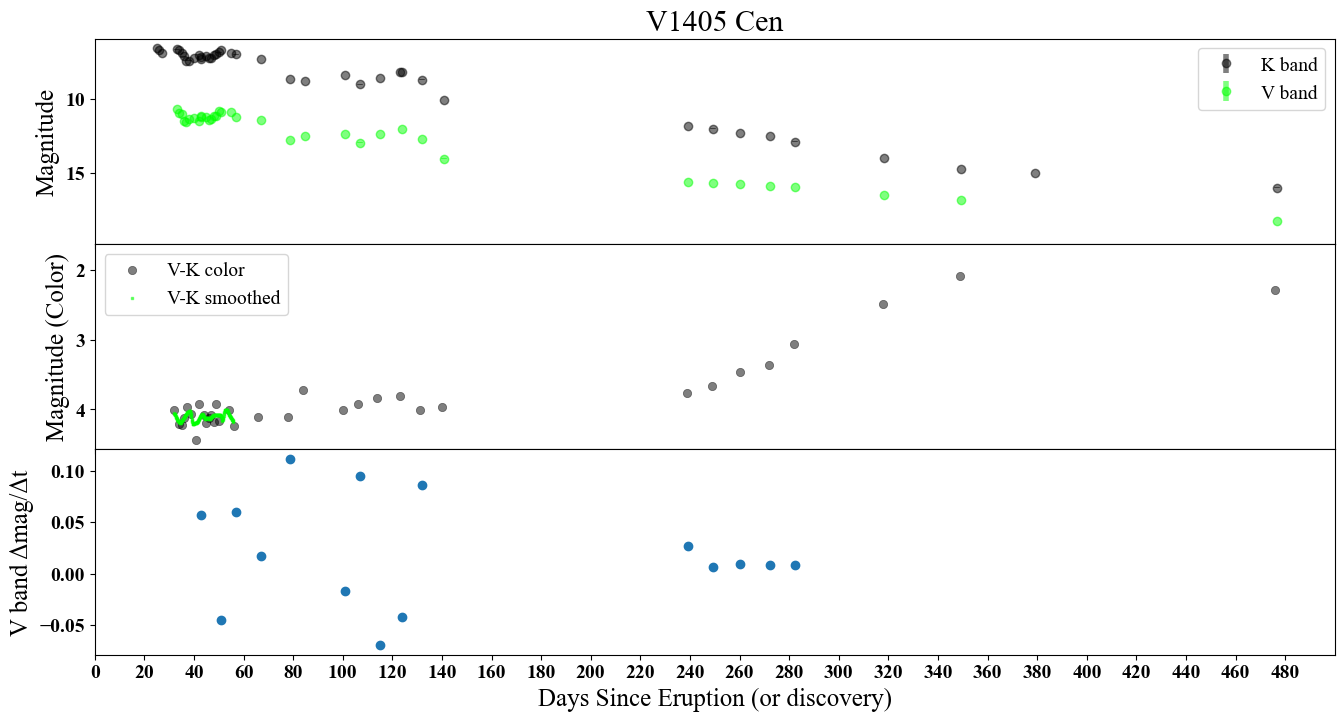

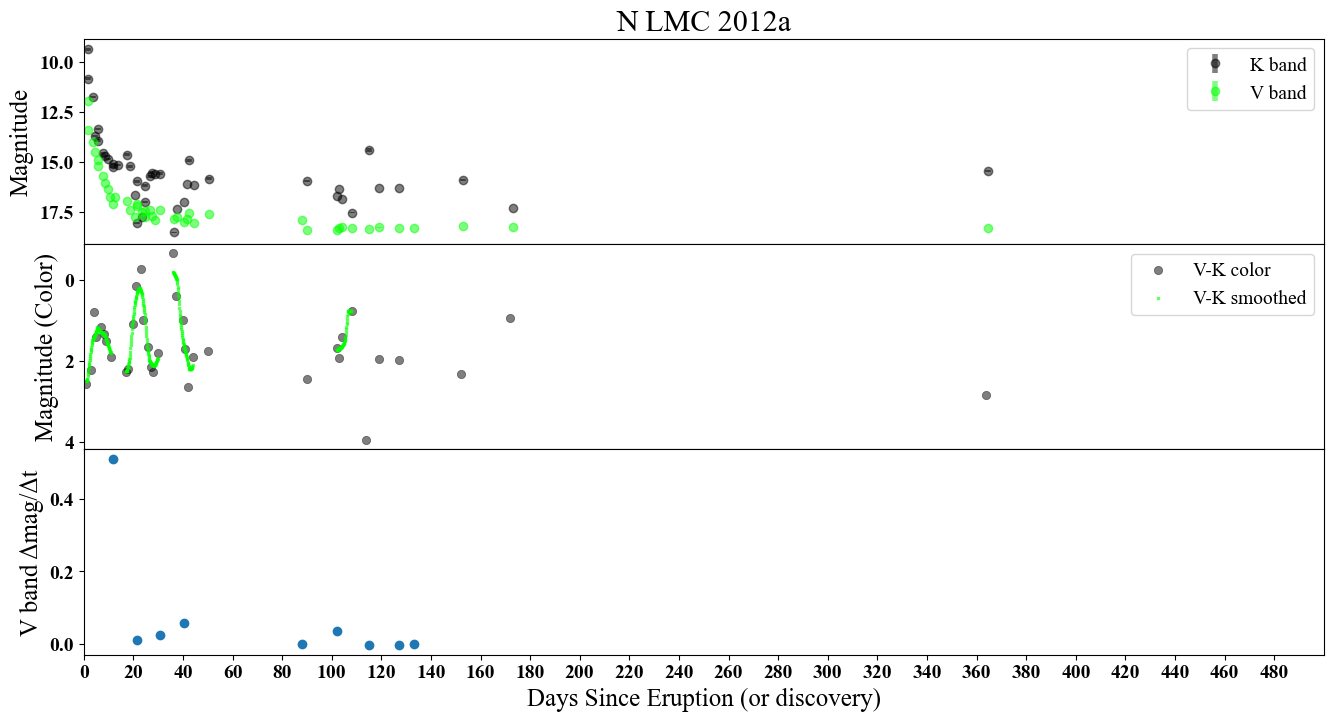

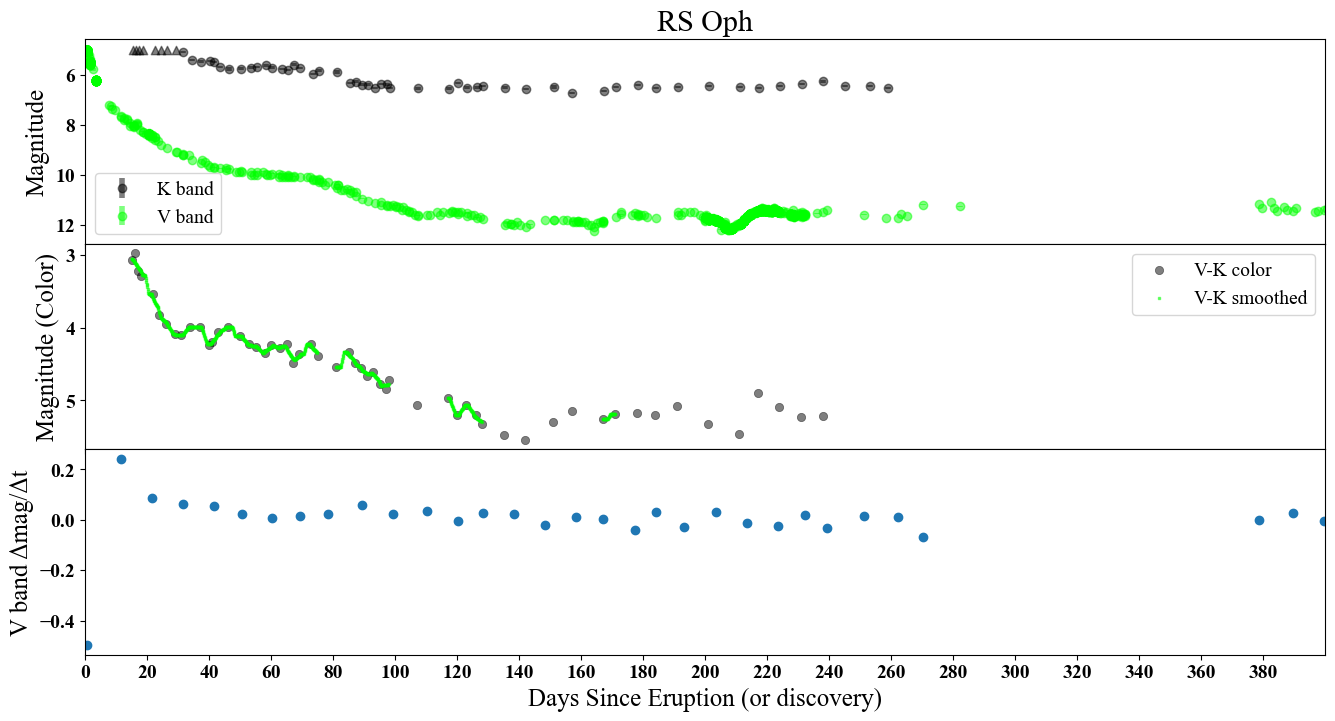

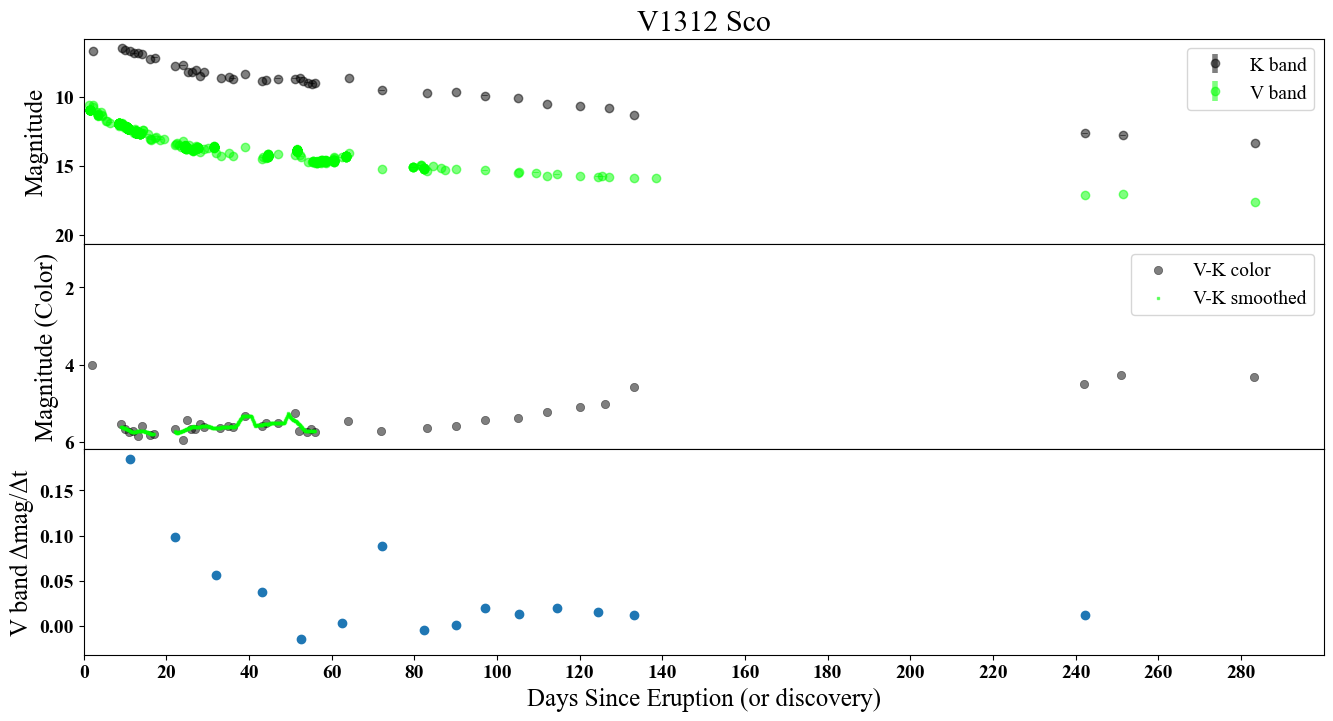

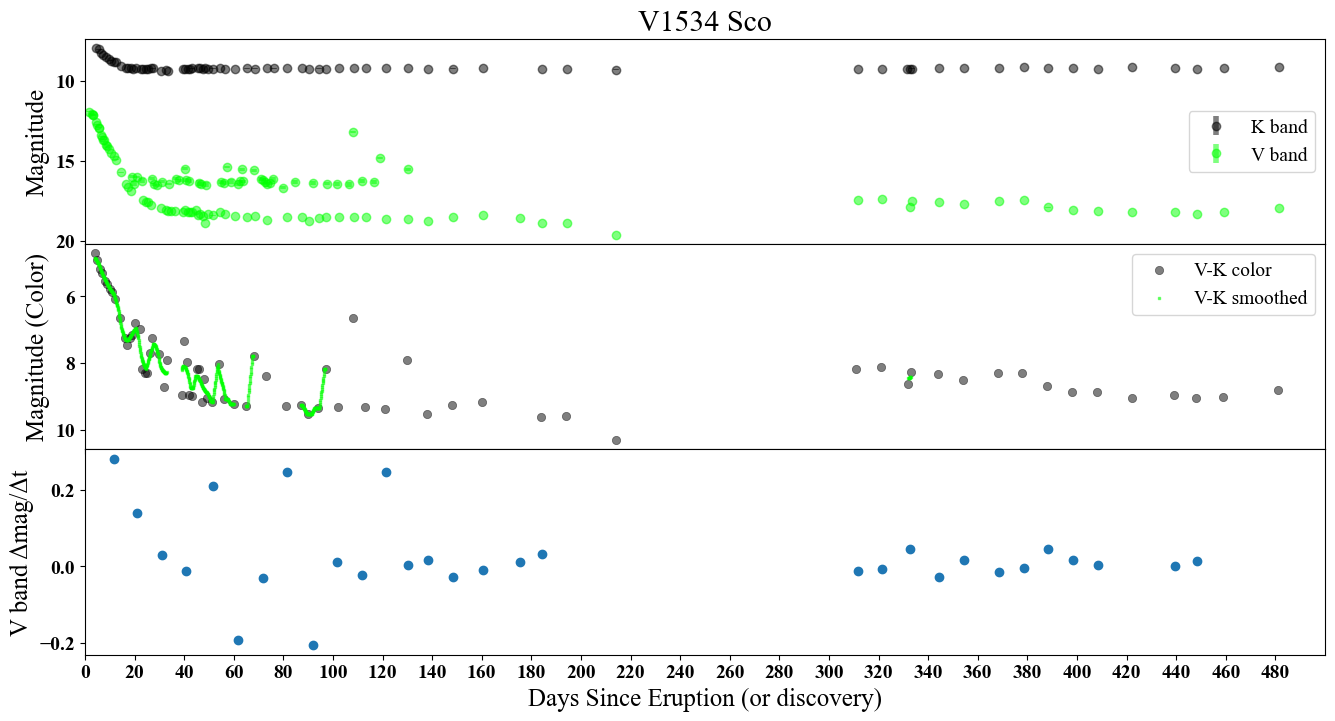

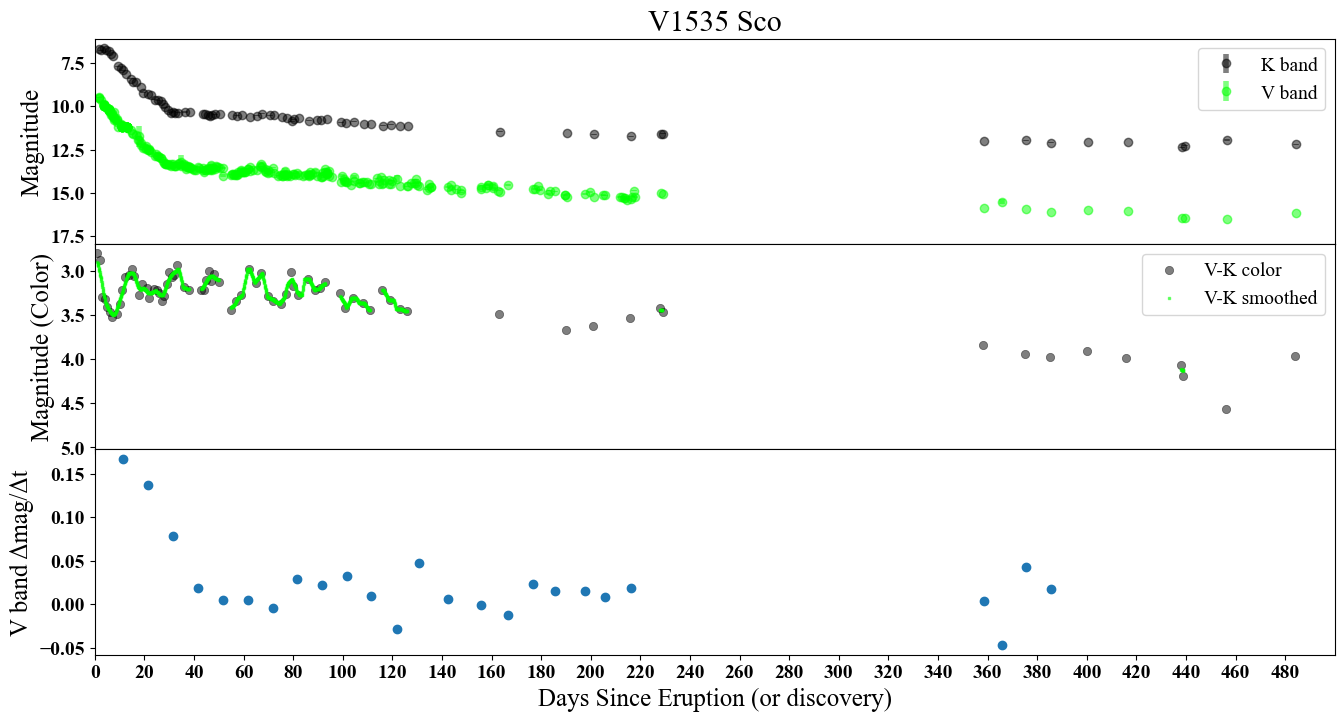

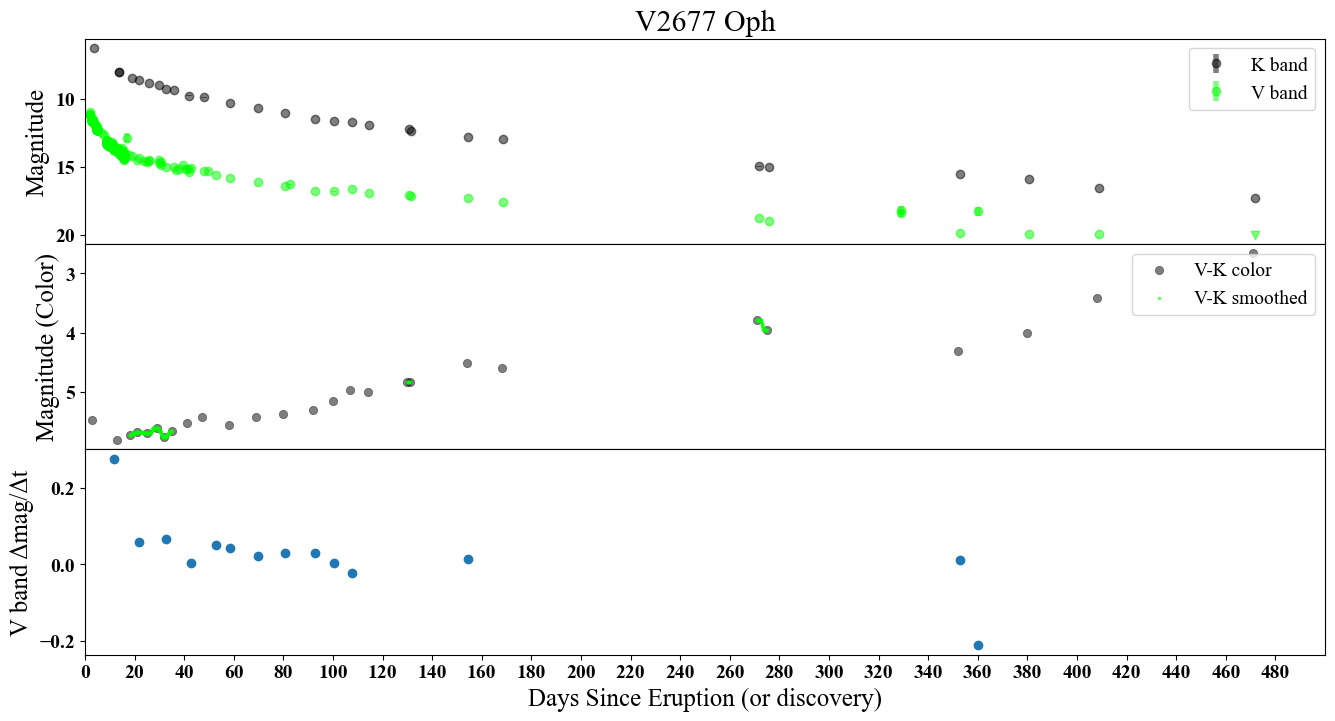

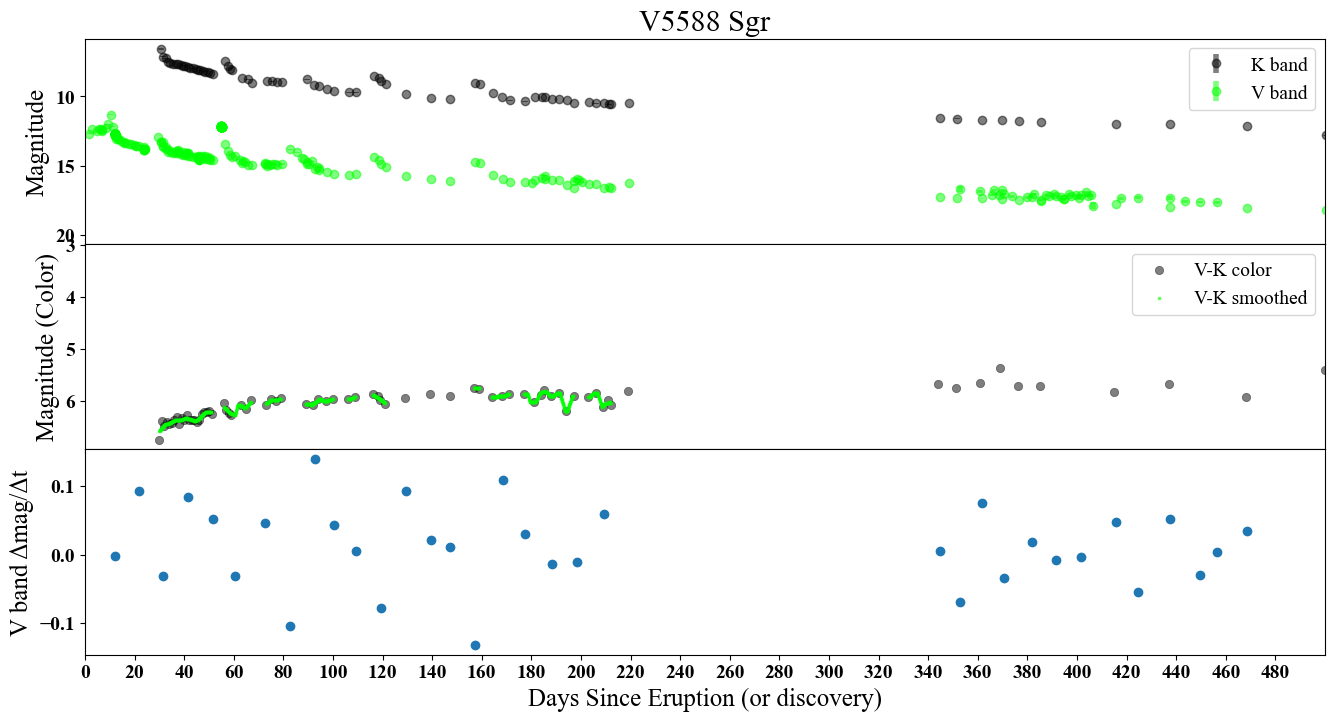

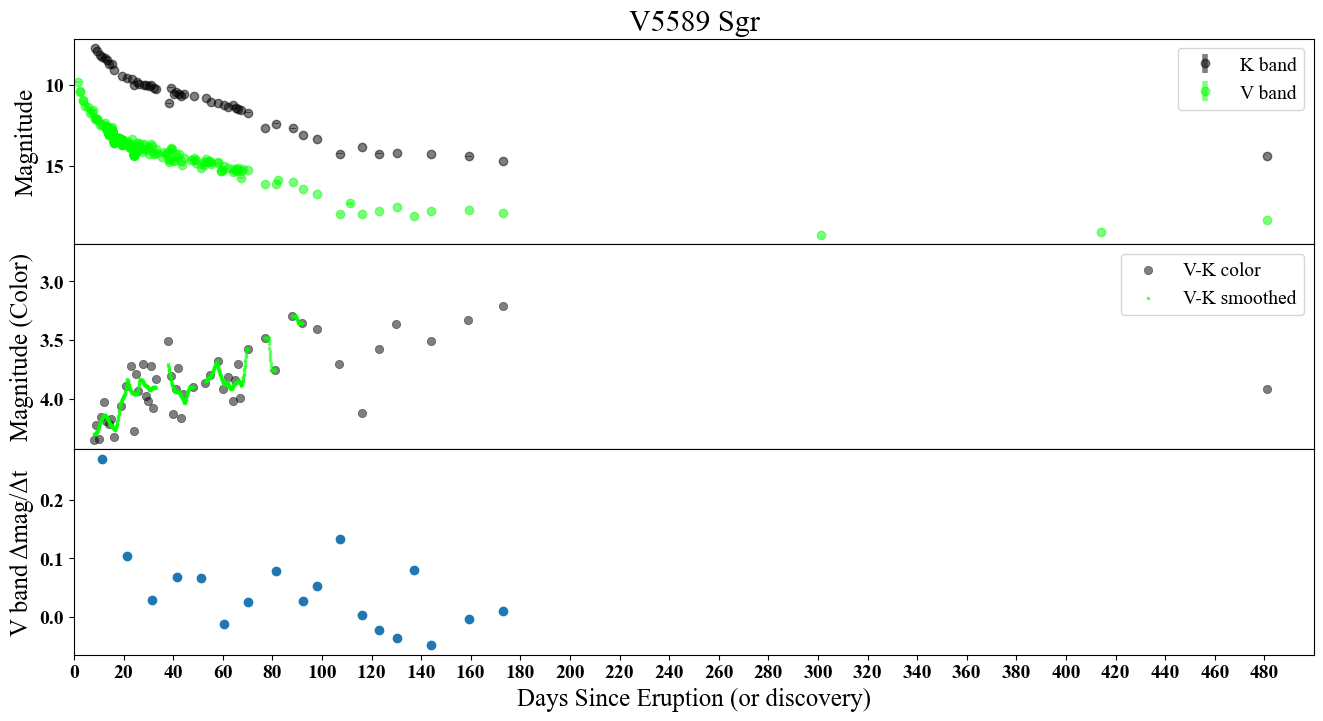

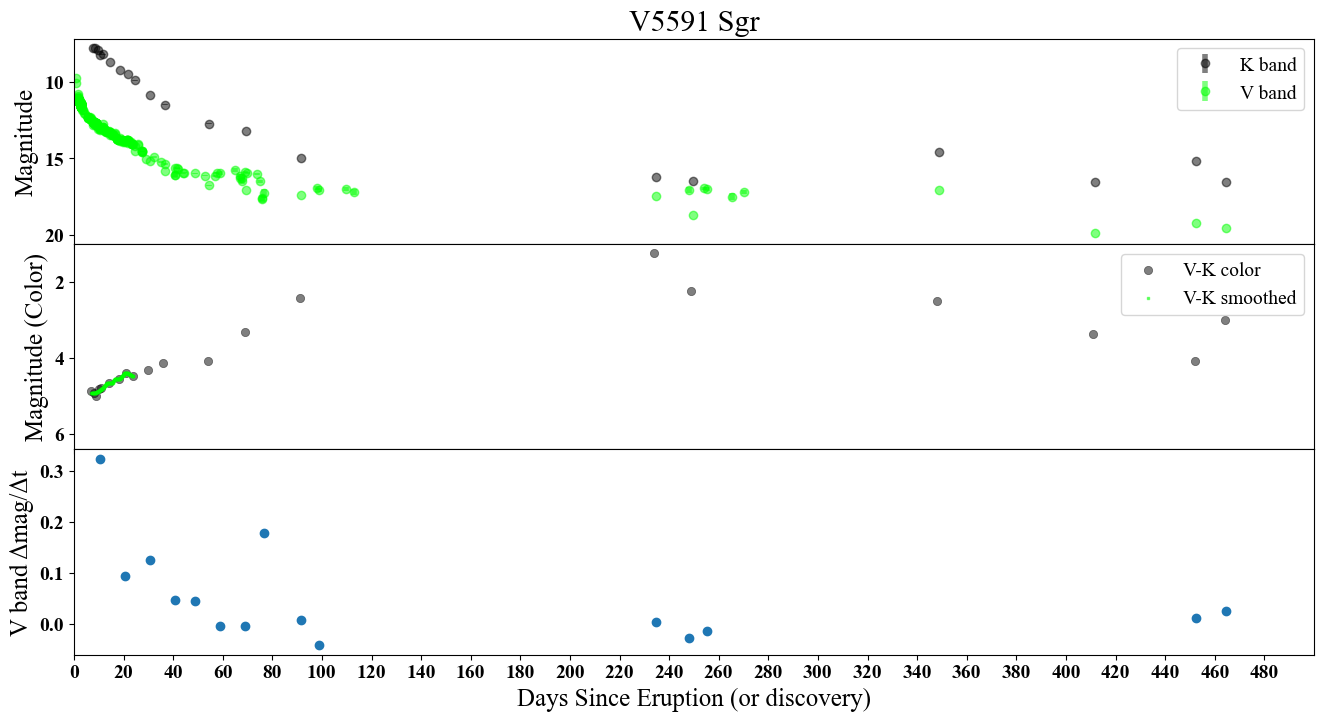

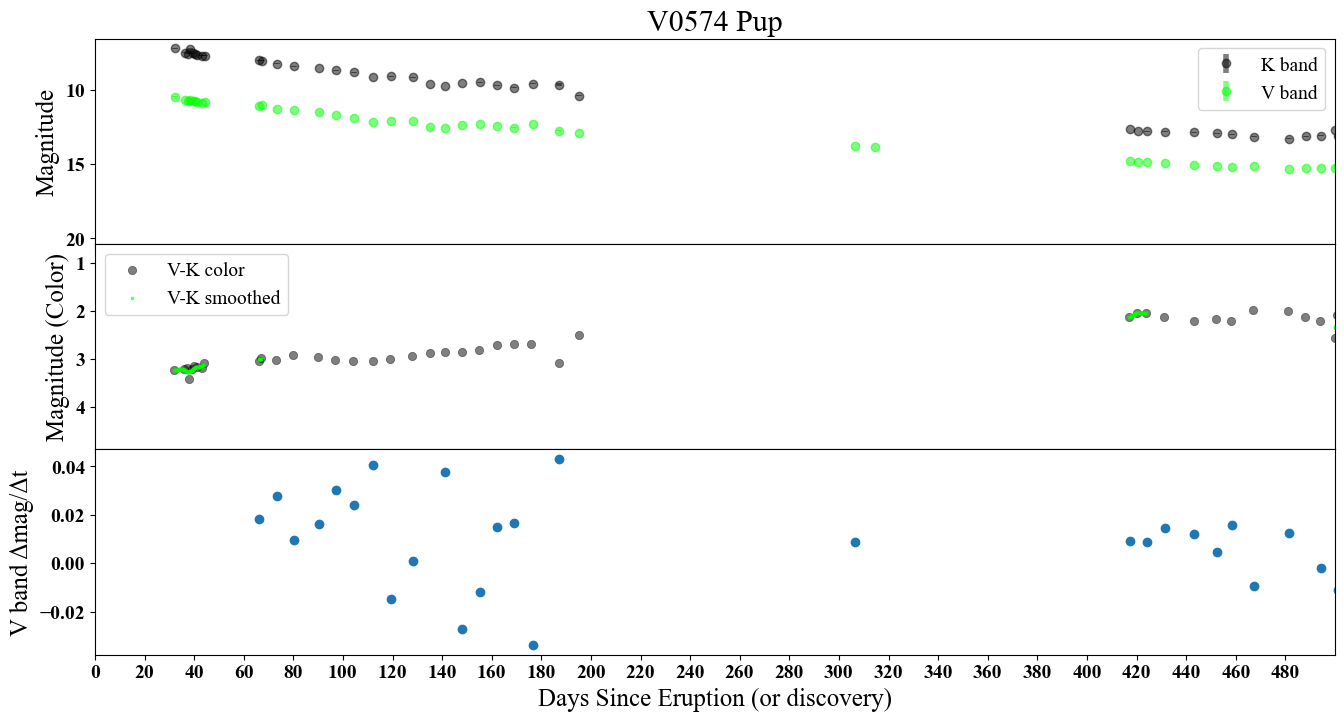

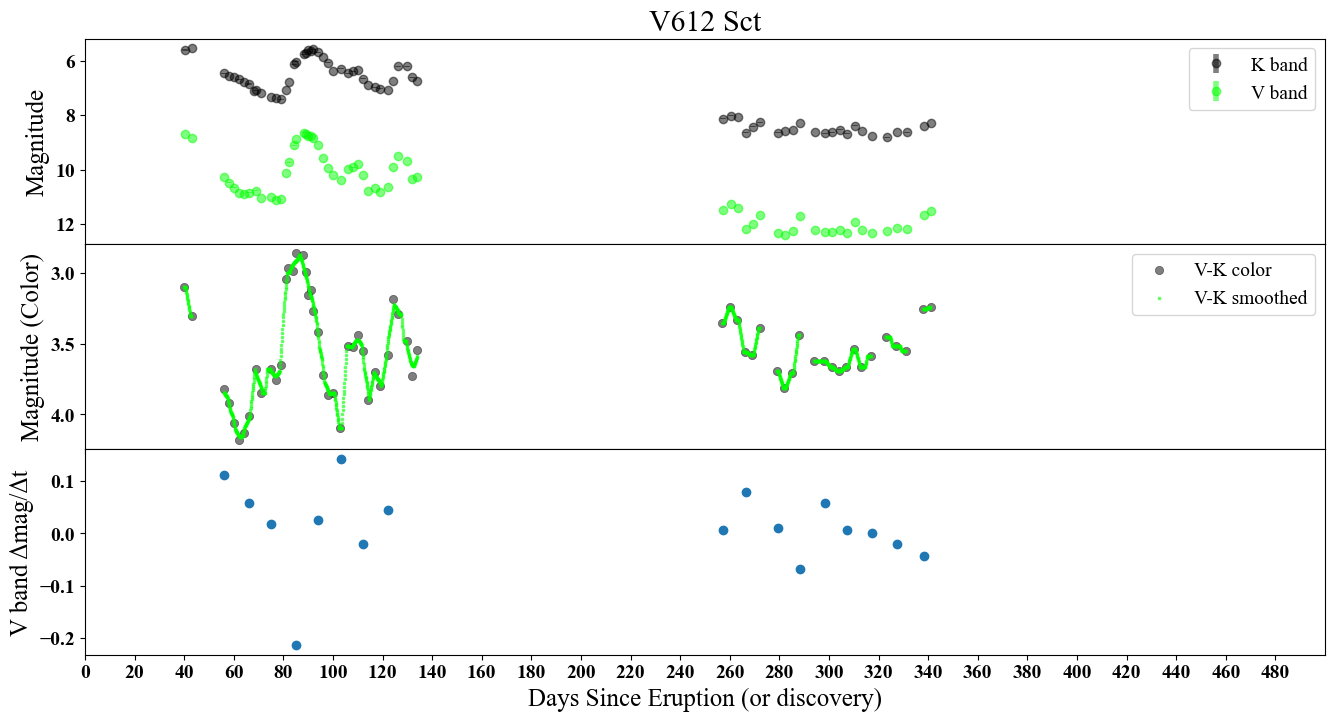

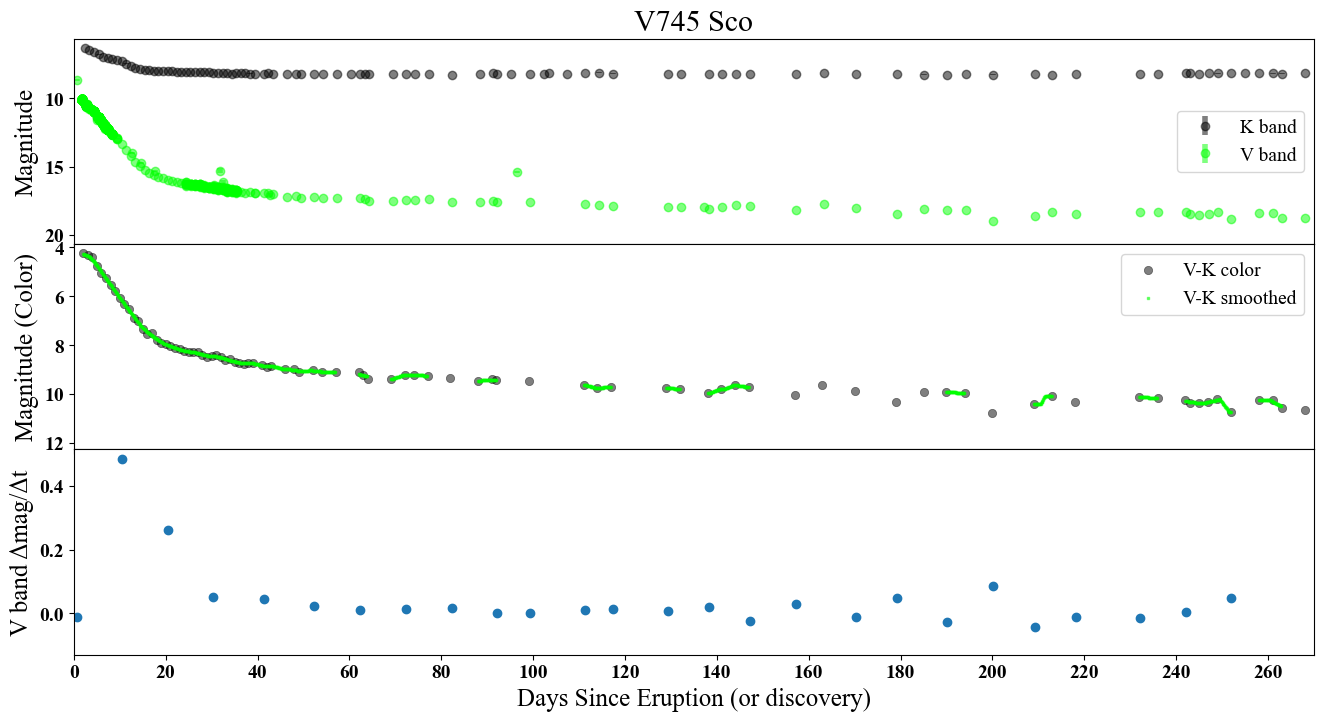

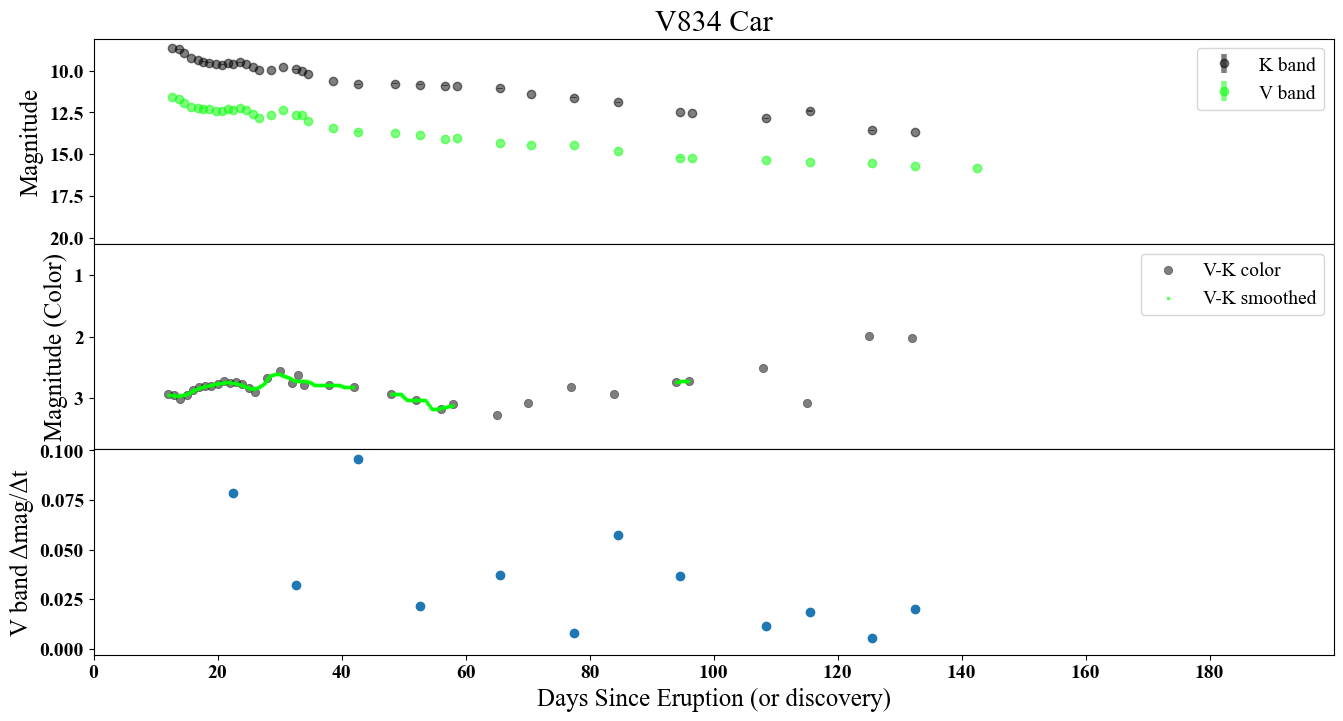

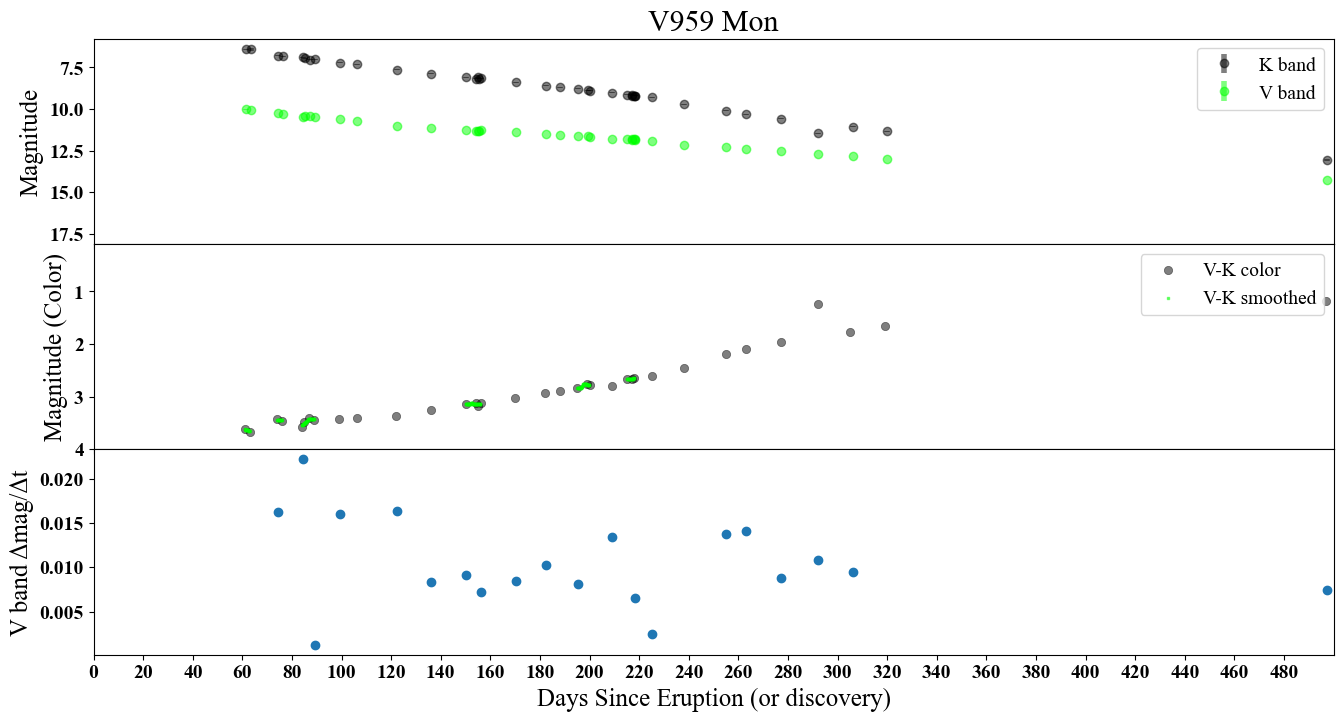

In [22]:
#main plots for none
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==0:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        KV_daylistsmooth=KV_daylistsmooth_list[ii]
        KV_maglistsmooth=KV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
        fig.set_size_inches(16,8)
        fig.subplots_adjust(hspace=0)
        ax1.errorbar(*removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii]),elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(*removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii]),elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(KV_daylist,KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.scatter(KV_daylistsmooth,KV_maglistsmooth,color=KVsmoothcolor,label=KVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax3.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        dxx,dyy=dxdy10pm5(np.array(Vdate),np.array(Vmag))
        ax3.scatter(dxx,dyy)
        ax3.set_ylabel('V band Δmag/Δt')
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+'deriv_'+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
#        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

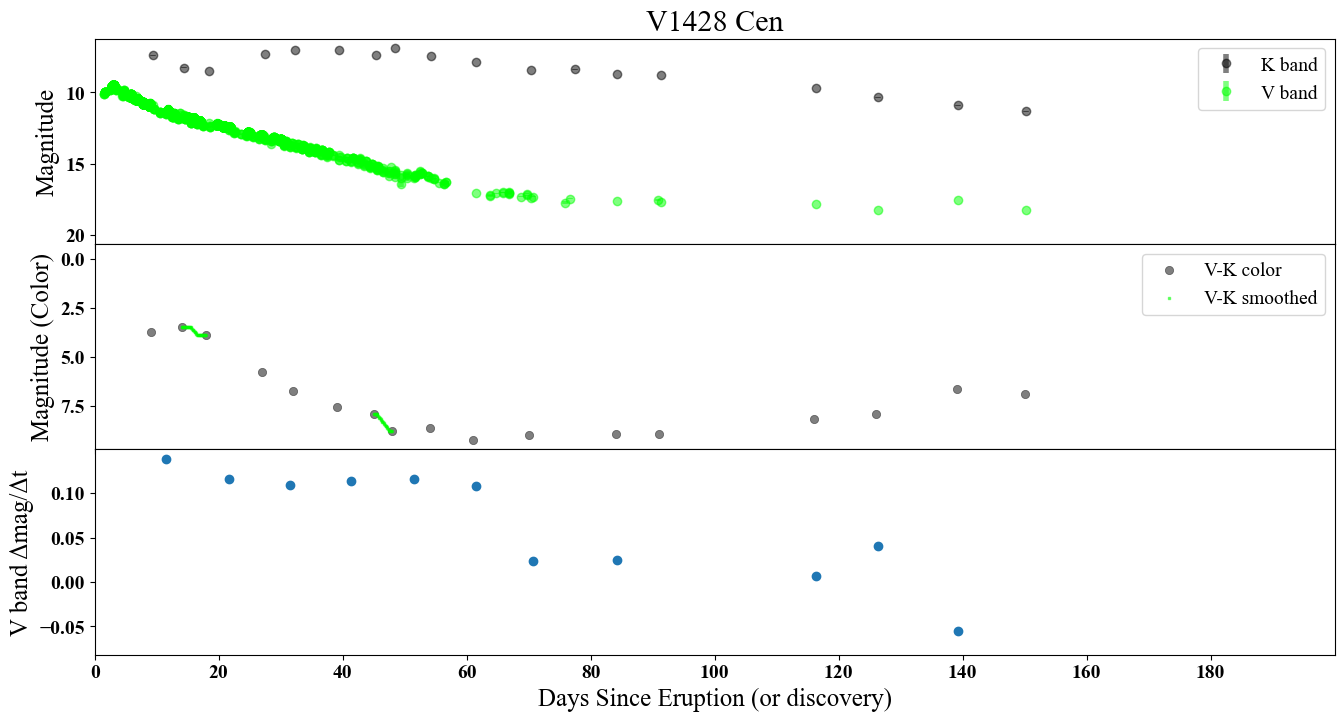

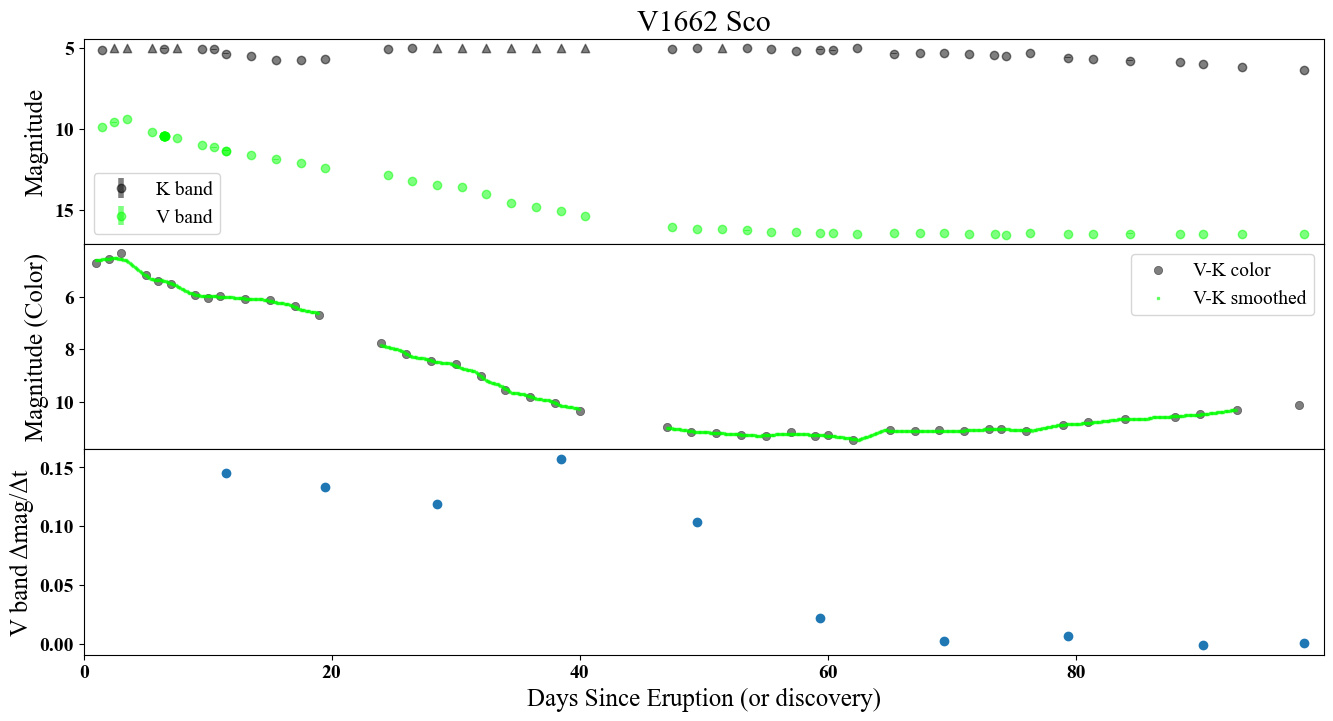

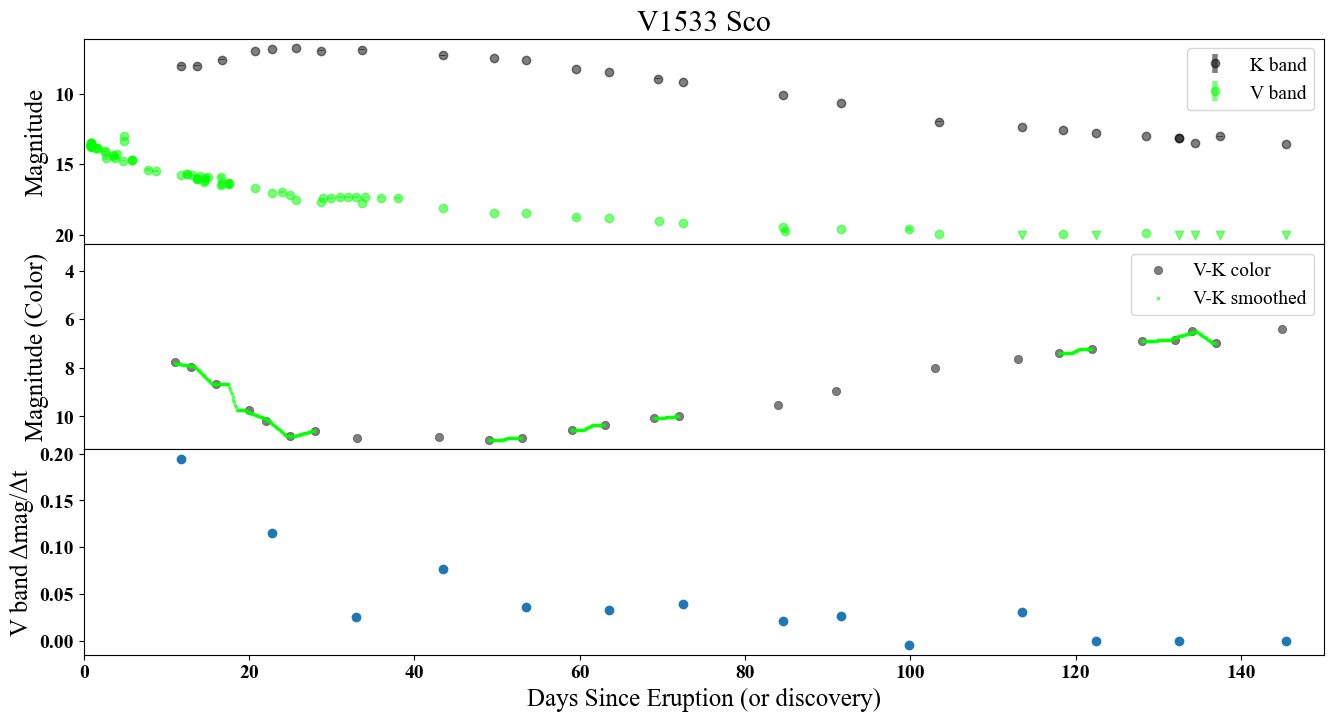

In [23]:
#main plots for ir_excess
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        KV_daylistsmooth=KV_daylistsmooth_list[ii]
        KV_maglistsmooth=KV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
        fig.set_size_inches(16,8)
        fig.subplots_adjust(hspace=0)
        ax1.errorbar(*removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii]),elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(*removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii]),elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(KV_daylist,KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.scatter(KV_daylistsmooth,KV_maglistsmooth,color=KVsmoothcolor,label=KVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax3.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        dxx,dyy=dxdy10pm5(np.array(Vdate),np.array(Vmag))
        ax3.scatter(dxx,dyy)
        ax3.set_ylabel('V band Δmag/Δt')
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+'deriv_'+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
#        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

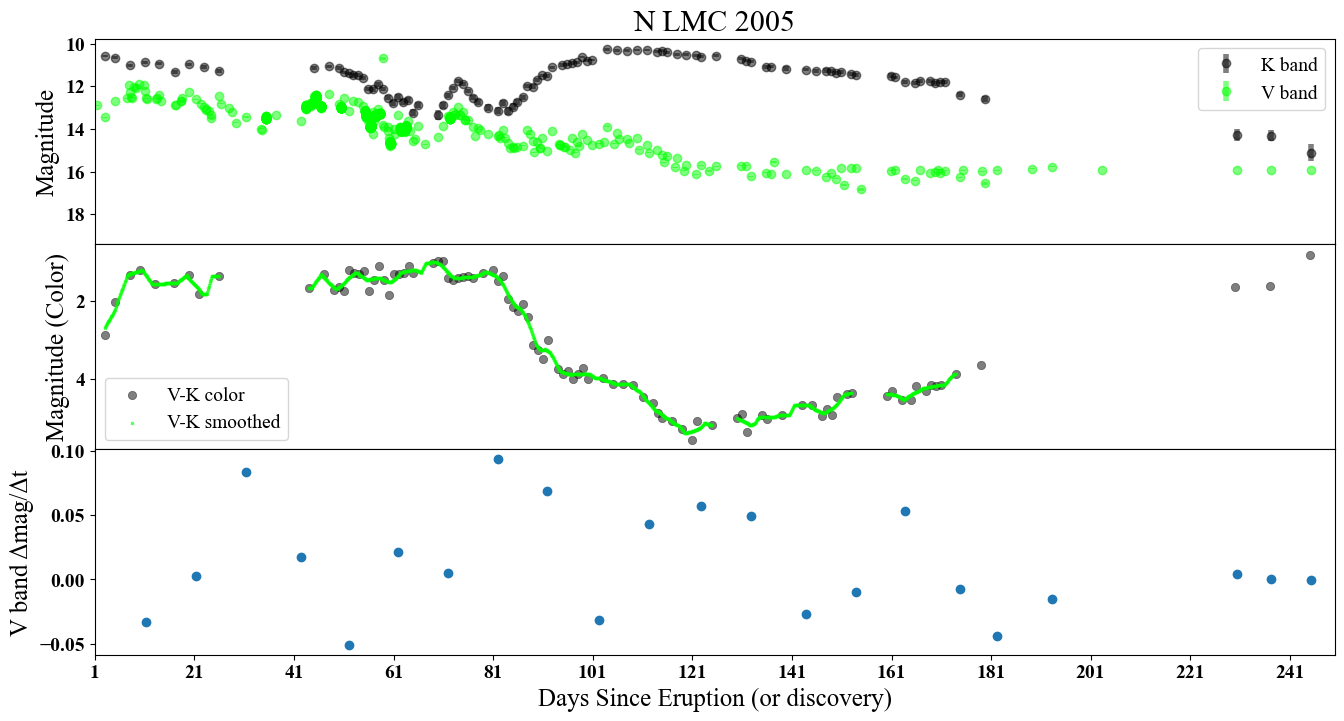

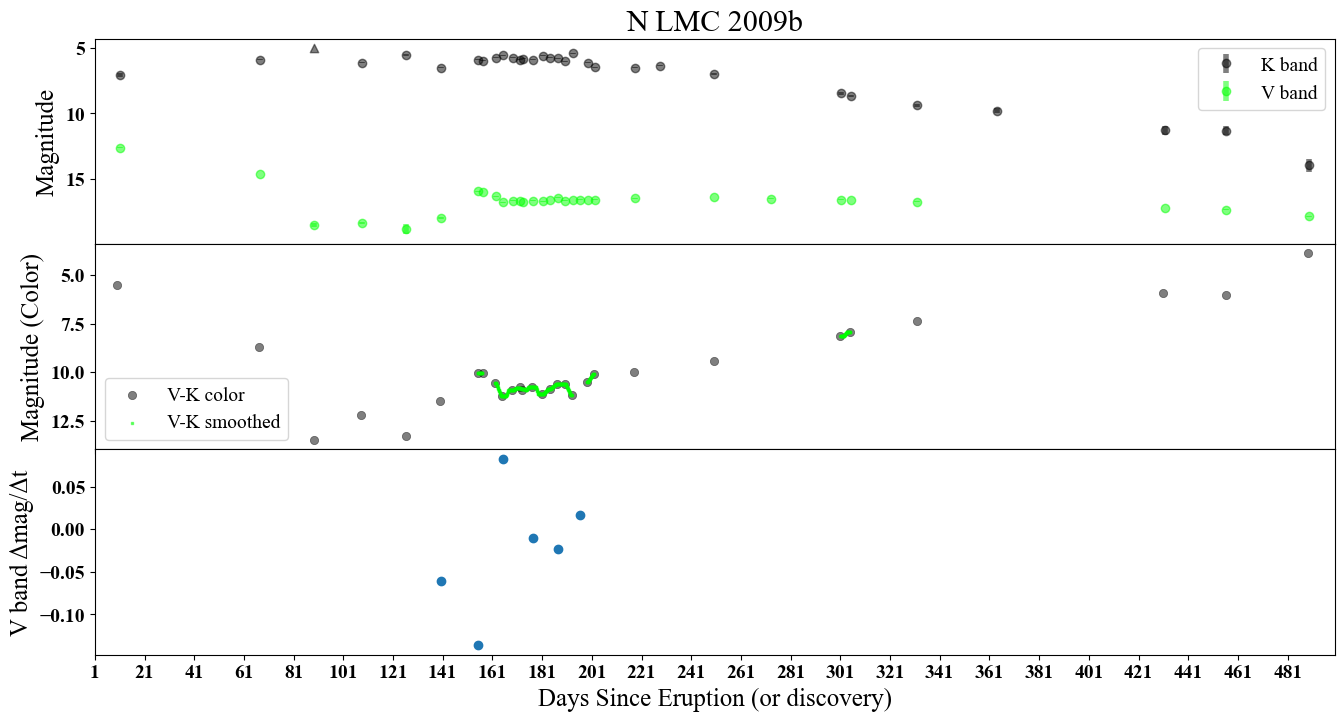

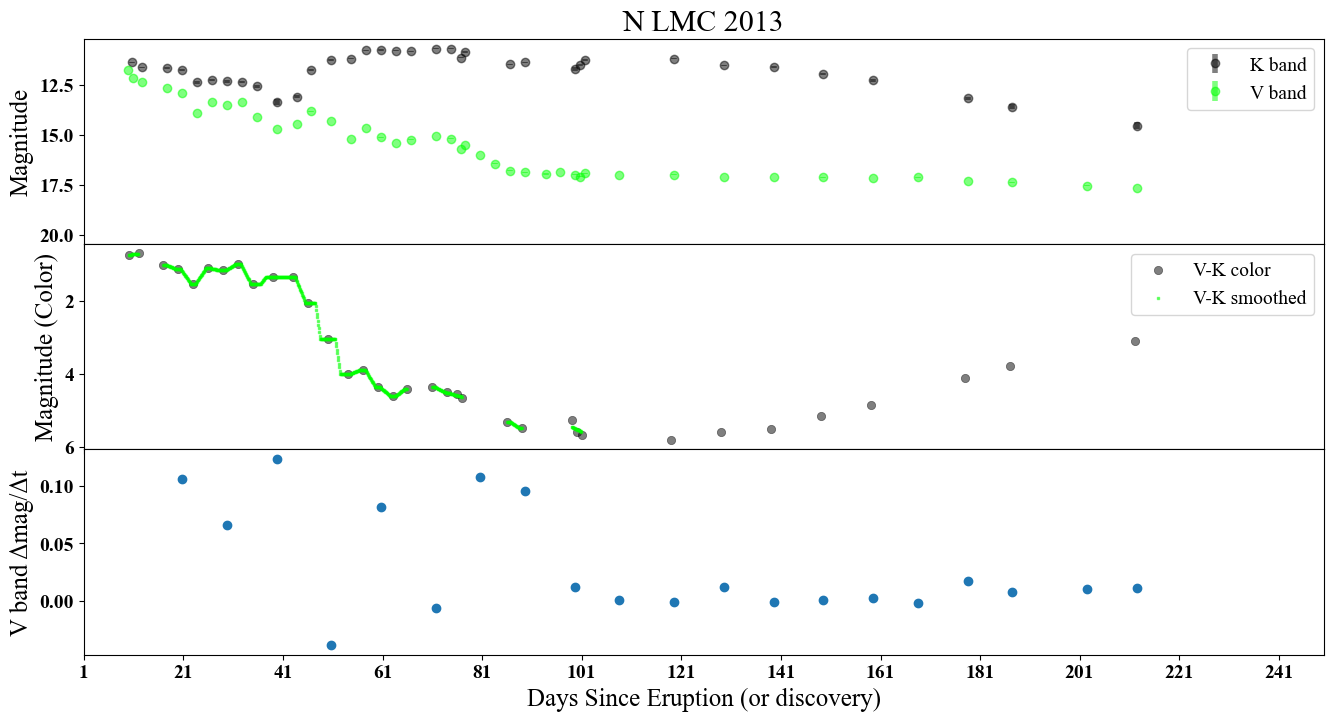

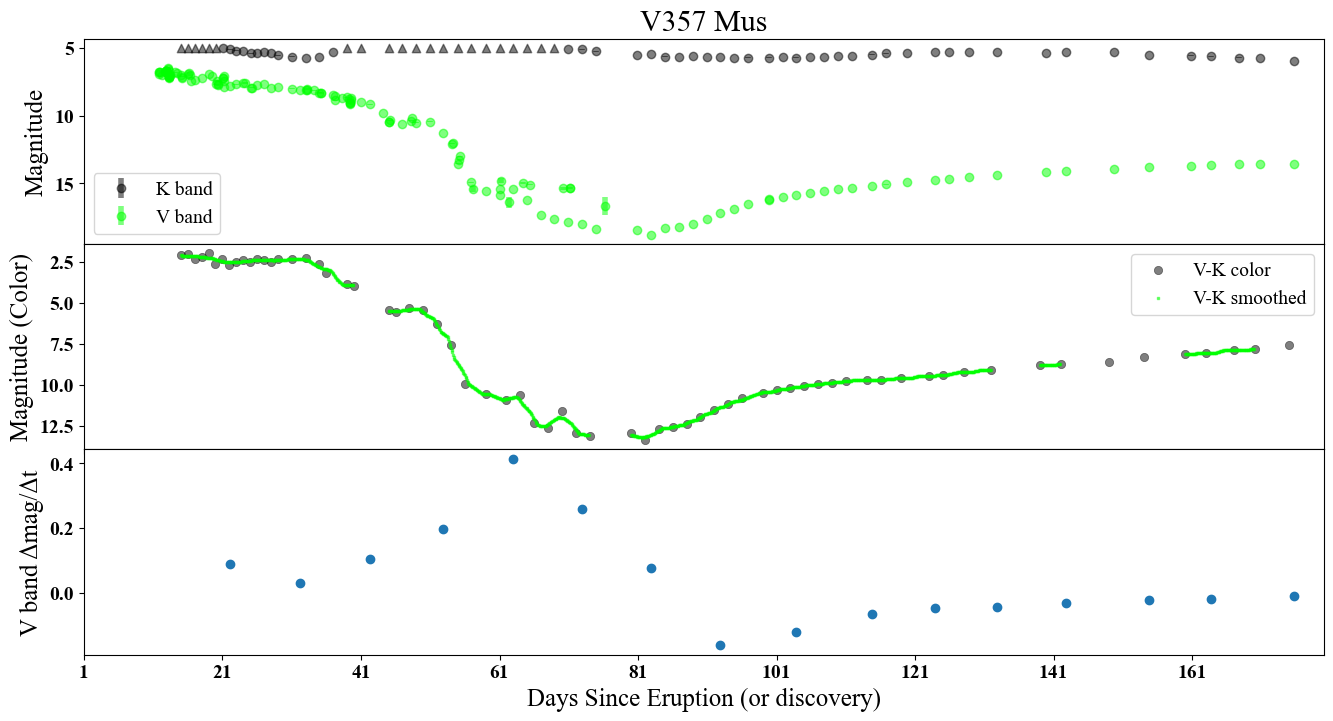

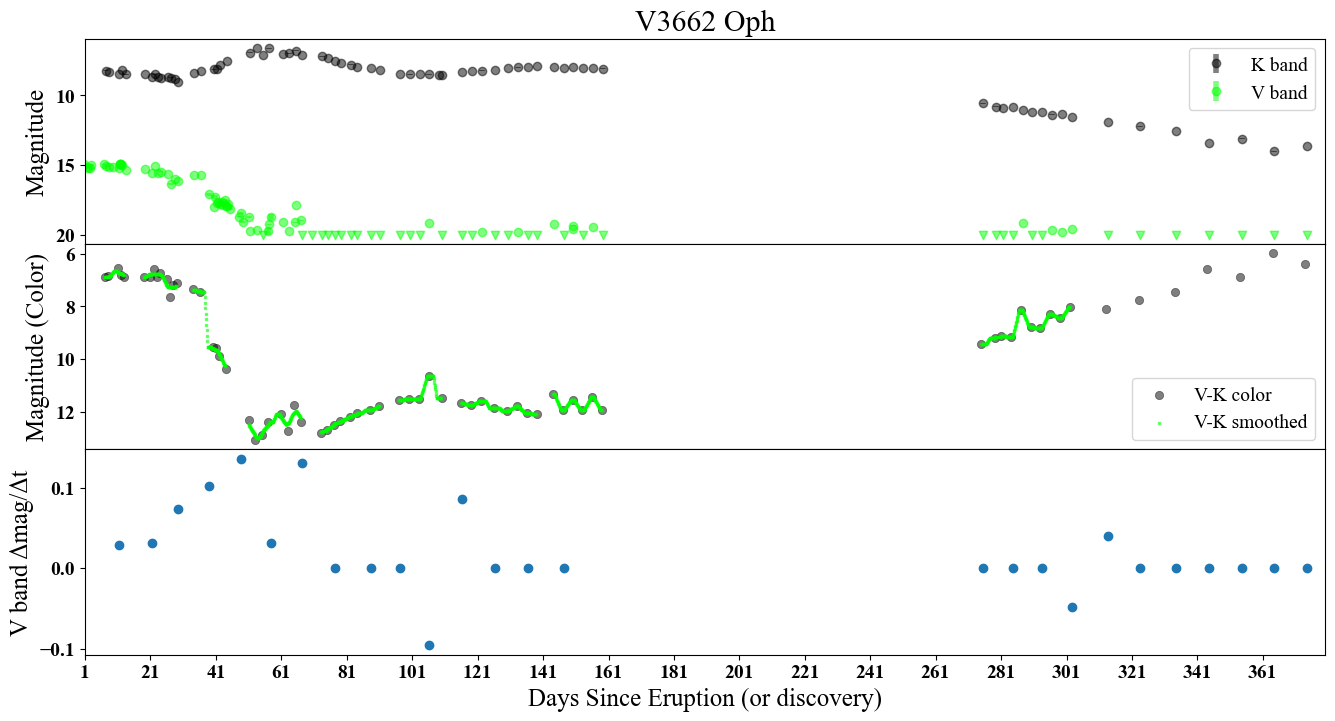

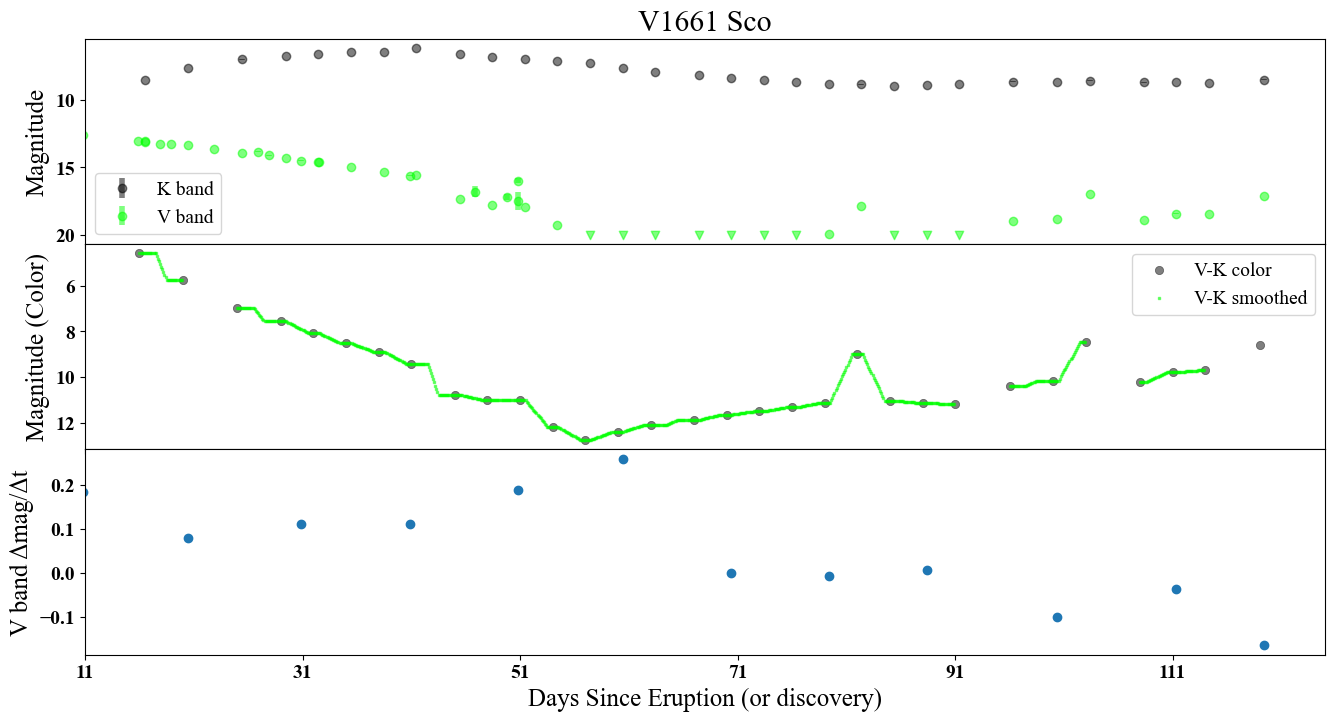

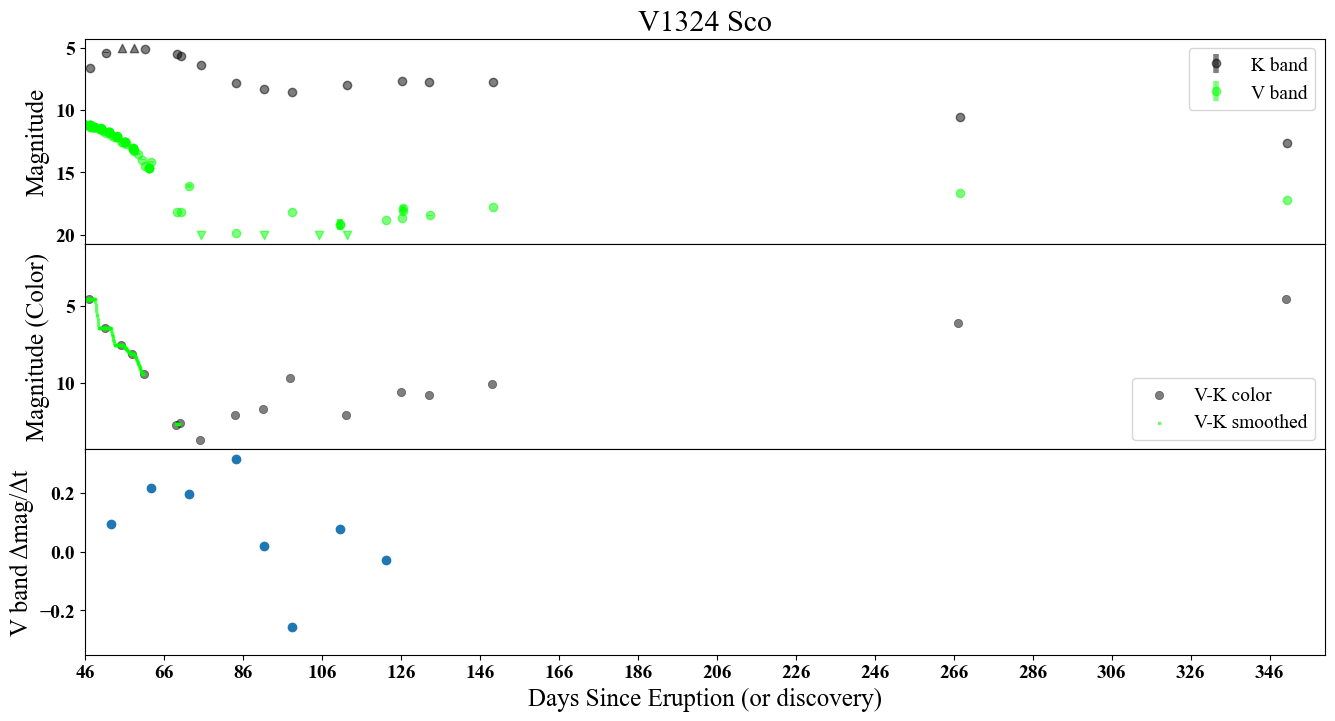

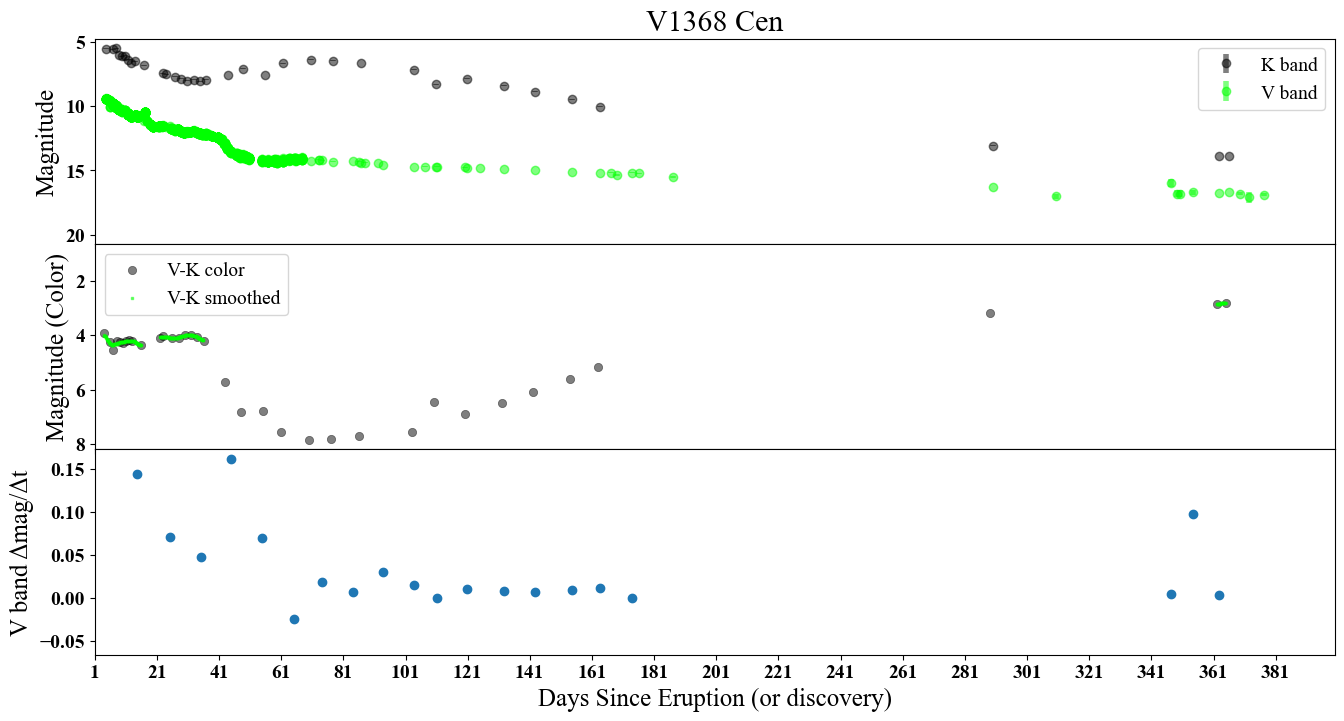

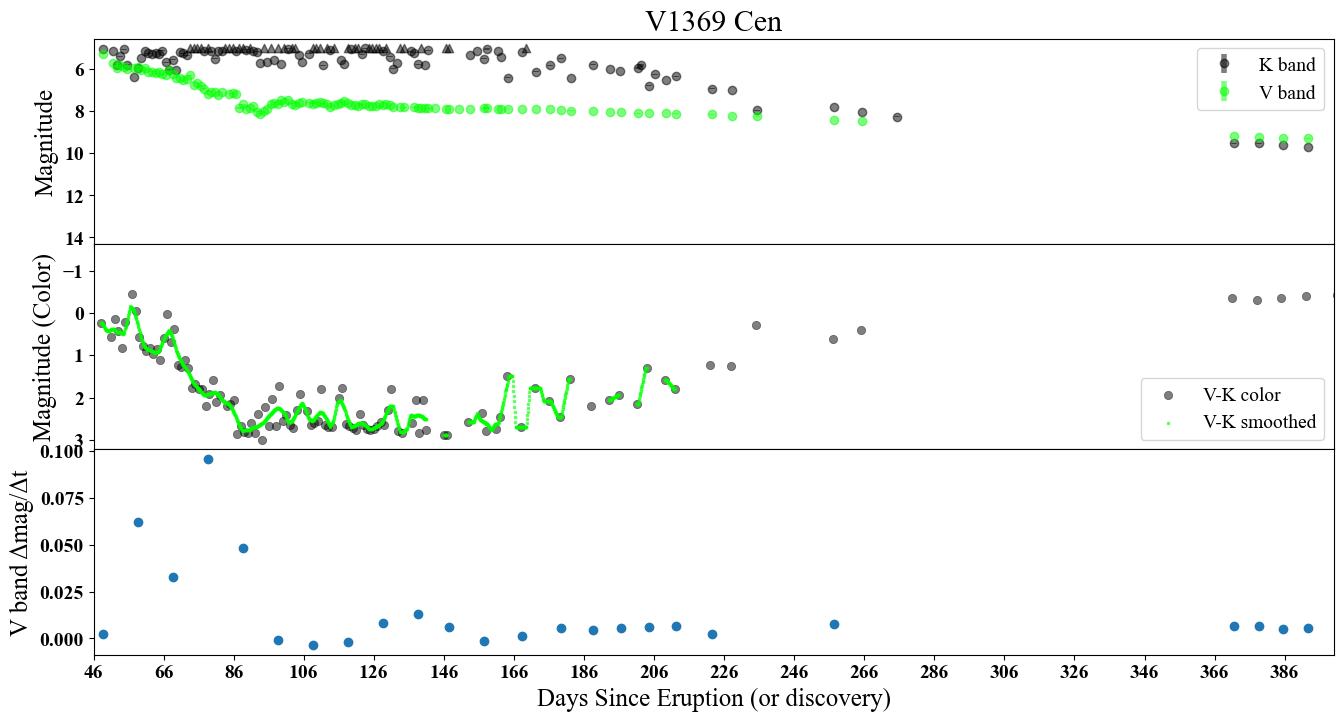

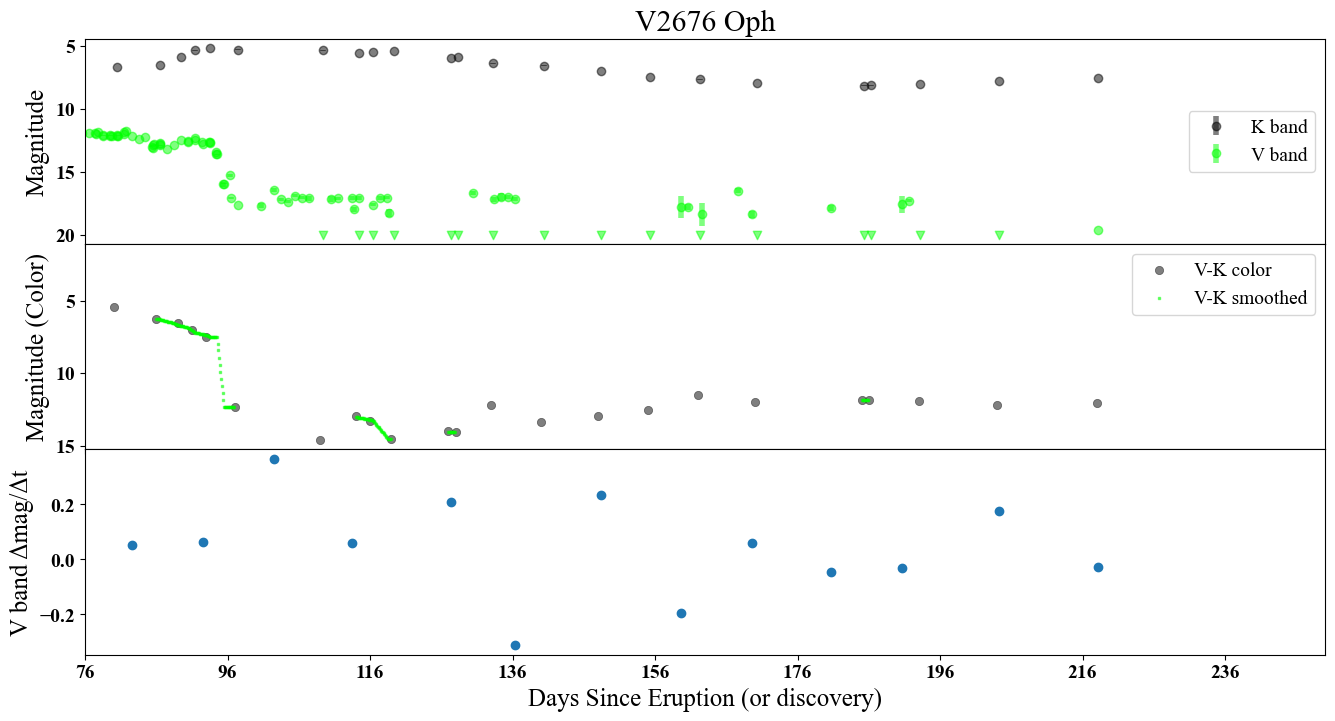

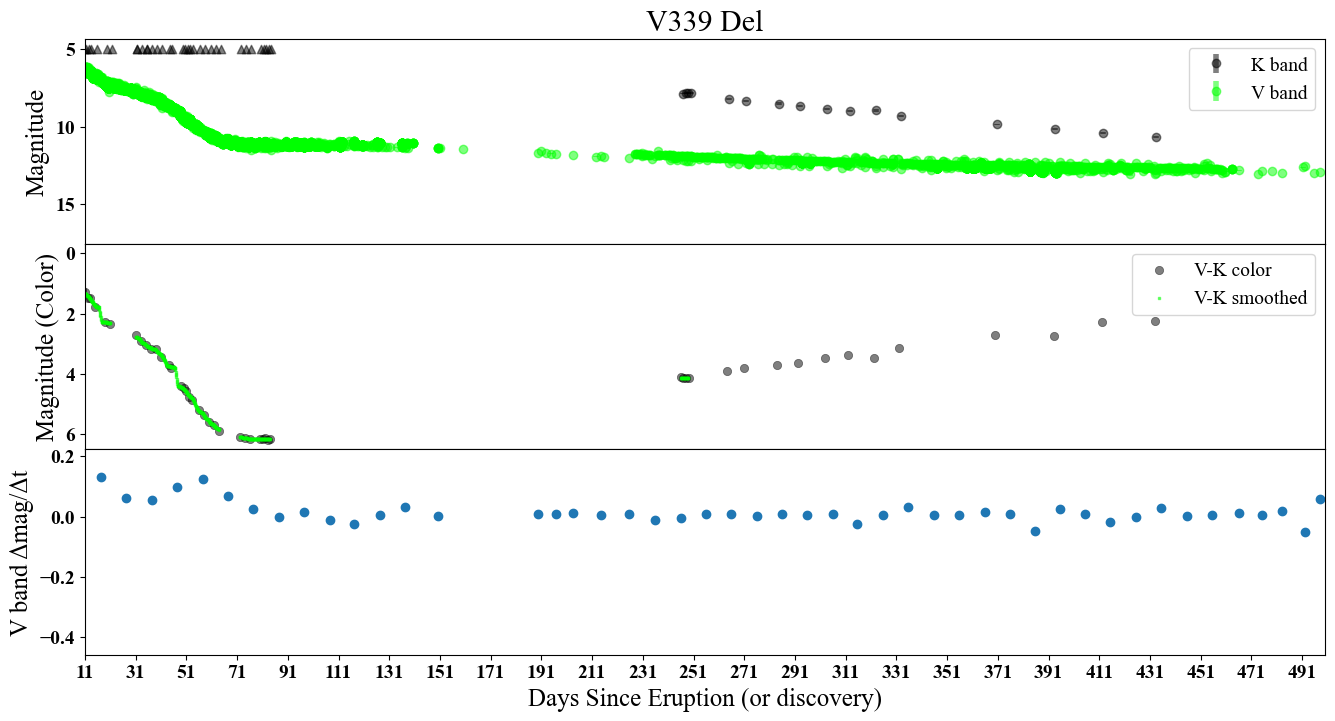

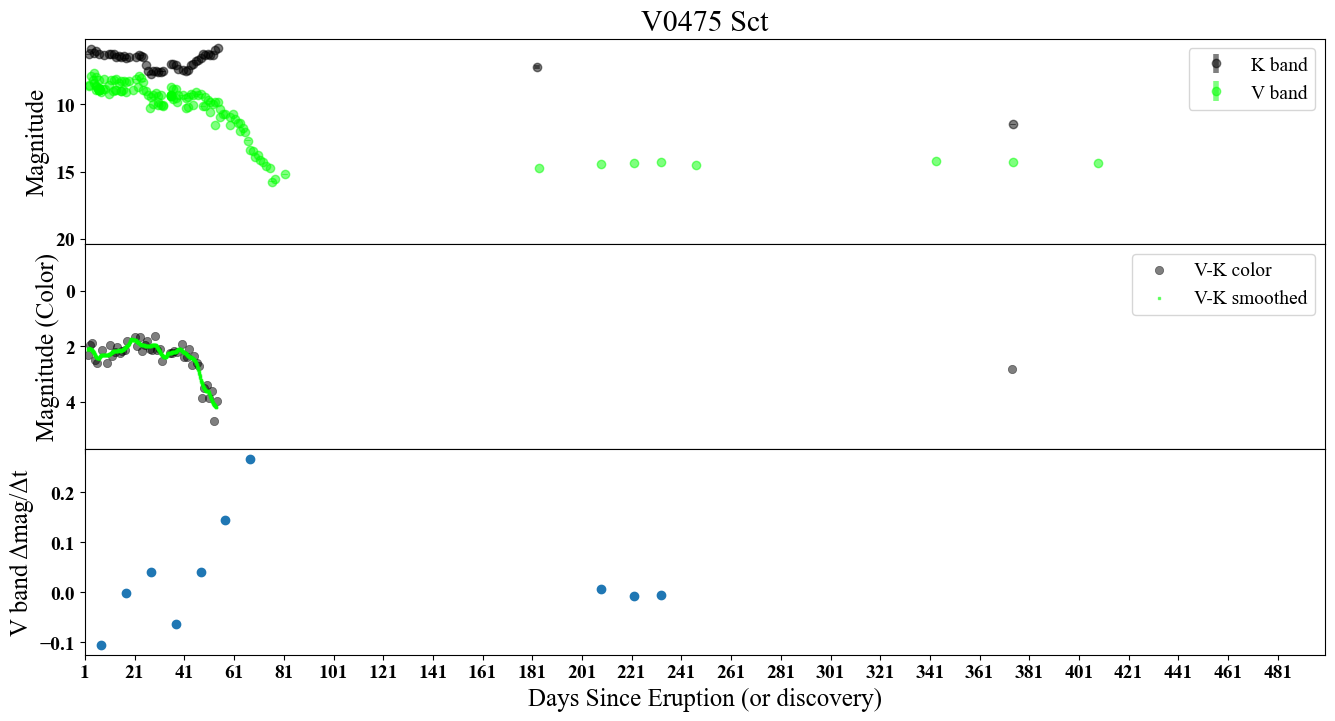

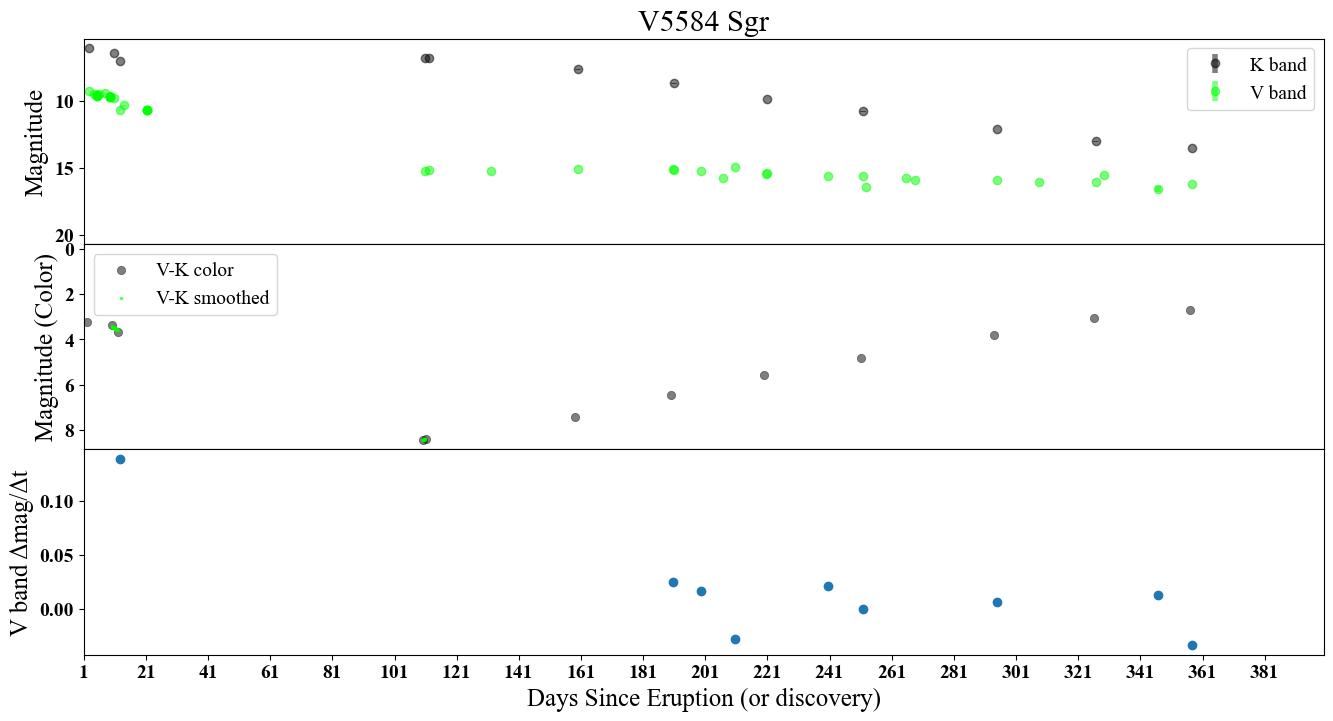

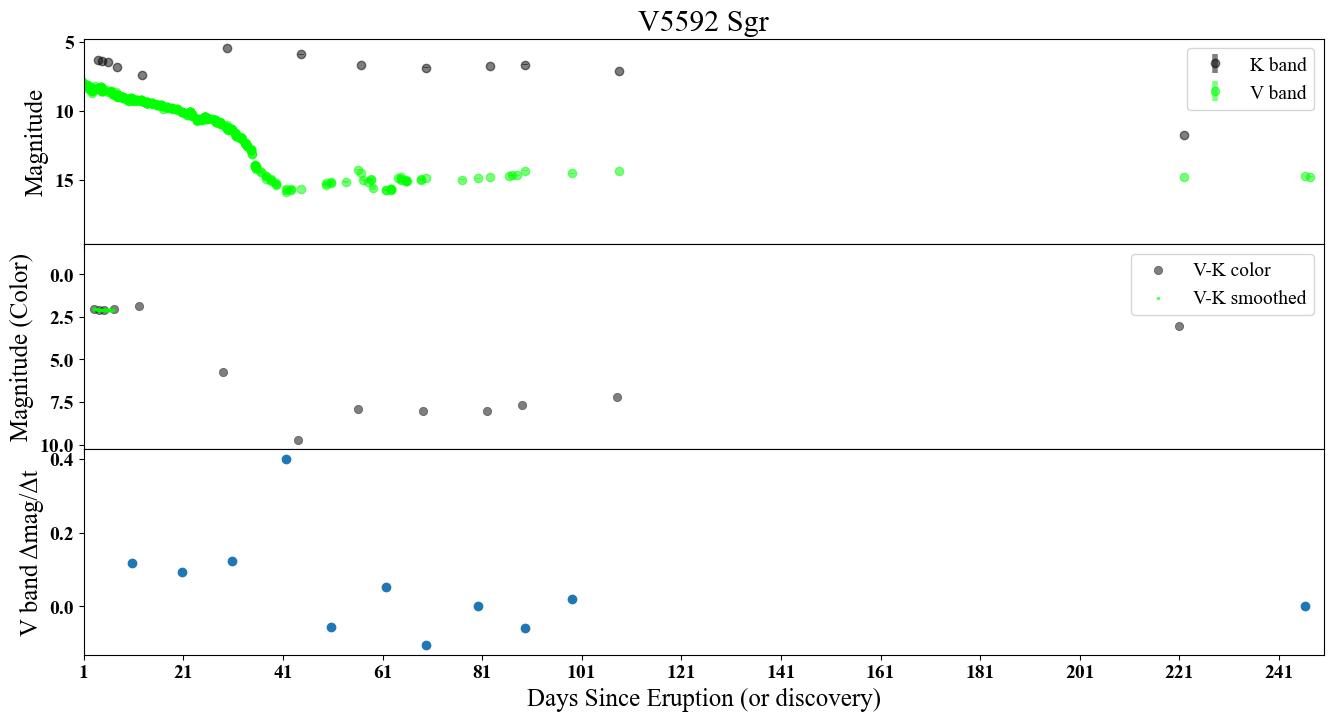

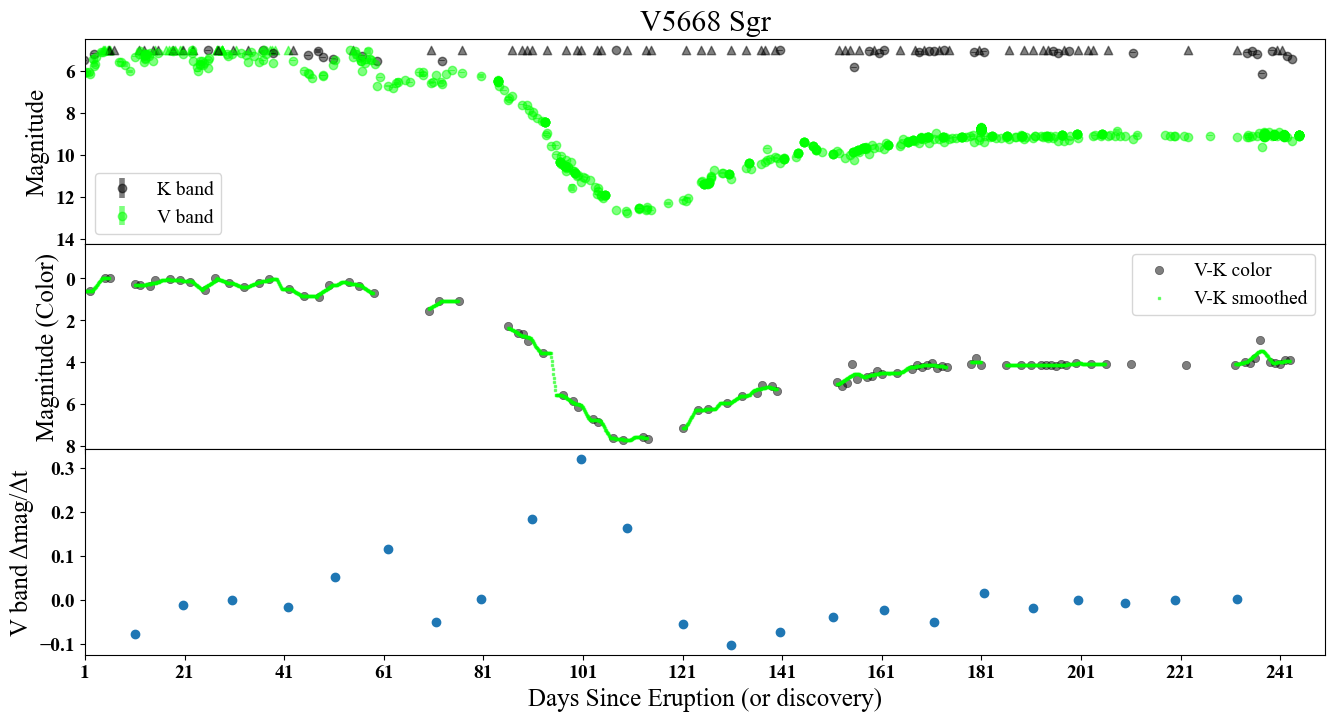

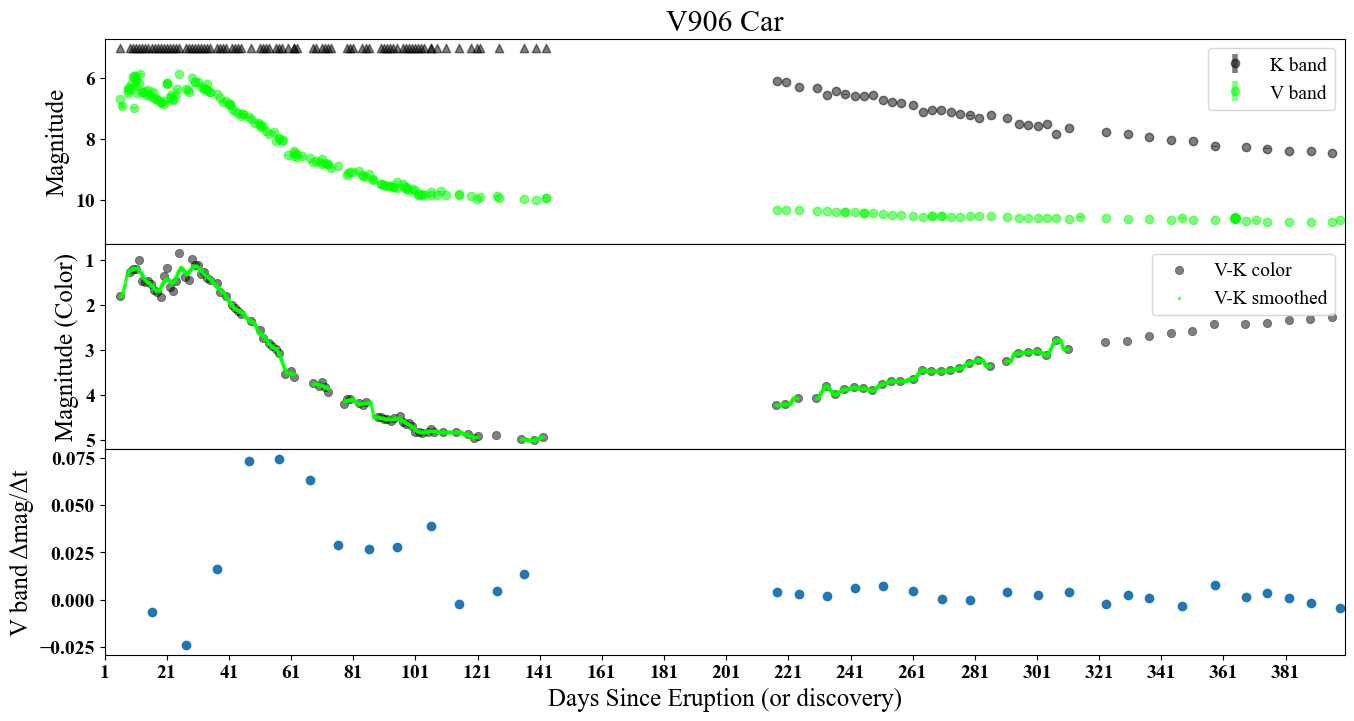

In [24]:
#main plots for dust dip
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==2:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        KV_daylistsmooth=KV_daylistsmooth_list[ii]
        KV_maglistsmooth=KV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        xlim_1+=1
        fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
        fig.set_size_inches(16,8)
        fig.subplots_adjust(hspace=0)
        ax1.errorbar(*removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii]),elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(*removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii]),elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
#        ax1.set_xscale('log')
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(KV_daylist,KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.scatter(KV_daylistsmooth,KV_maglistsmooth,color=KVsmoothcolor,label=KVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax3.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
#        ax2.set_xscale('log')
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        dxx,dyy=dxdy10pm5(np.array(Vdate),np.array(Vmag))
        ax3.scatter(dxx,dyy)
        ax3.set_ylabel('V band Δmag/Δt')
#        ax3.set_xscale('log')
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+'deriv_'+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
#        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

In [25]:
#print(features.isnull().loc[:,:])
print(len(features))
features_drop=features.dropna(thresh=2)
features_dropped=features_drop.drop(features_drop.index[np.where(np.asarray(features_drop.loc[:,'category'])<-1)[0]])
print(len(features_dropped))
features_colorlist=[]
features_labellist=[]
for line in features_dropped.index:
    if features_dropped.loc[line,'category']==-3:
        features_colorlist.append('tab:olive')
        features_labellist.append('n/a')
    elif features_dropped.loc[line,'category']==-2:
        features_colorlist.append('gold')
        features_labellist.append('bad data')
    elif features_dropped.loc[line,'category']==-1:
        features_colorlist.append('tab:red')
        features_labellist.append('unsure')
    elif features_dropped.loc[line,'category']==0:
        features_colorlist.append('lime')
        features_labellist.append('none')
    elif features_dropped.loc[line,'category']==1:
        features_colorlist.append('b')
        features_labellist.append('IR excess')
    elif features_dropped.loc[line,'category']==2:
        features_colorlist.append('black')
        features_labellist.append('dust dip')
    else:
        raise exception('Error')
#change sign of mag_range to match biggest_change
for line in features_dropped.index:
    changer=-float(features_dropped.loc[line,'mag_range'])
    if features_dropped.loc[line,'biggest_change']<0:
        features_dropped.loc[line,'mag_range']=changer
# pd.plotting.scatter_matrix(features_dropped.loc[:,'broken_m1':'day_change_from_vmax'],figsize=(20,20),color=features_colorlist,marker='o',s=14,alpha=1,hist_kwds={'color':['k'],'alpha':0.5})

93
41


Text(0.5, 1.0, '(V-K) Color Change From V-Band Max Time vs t2')

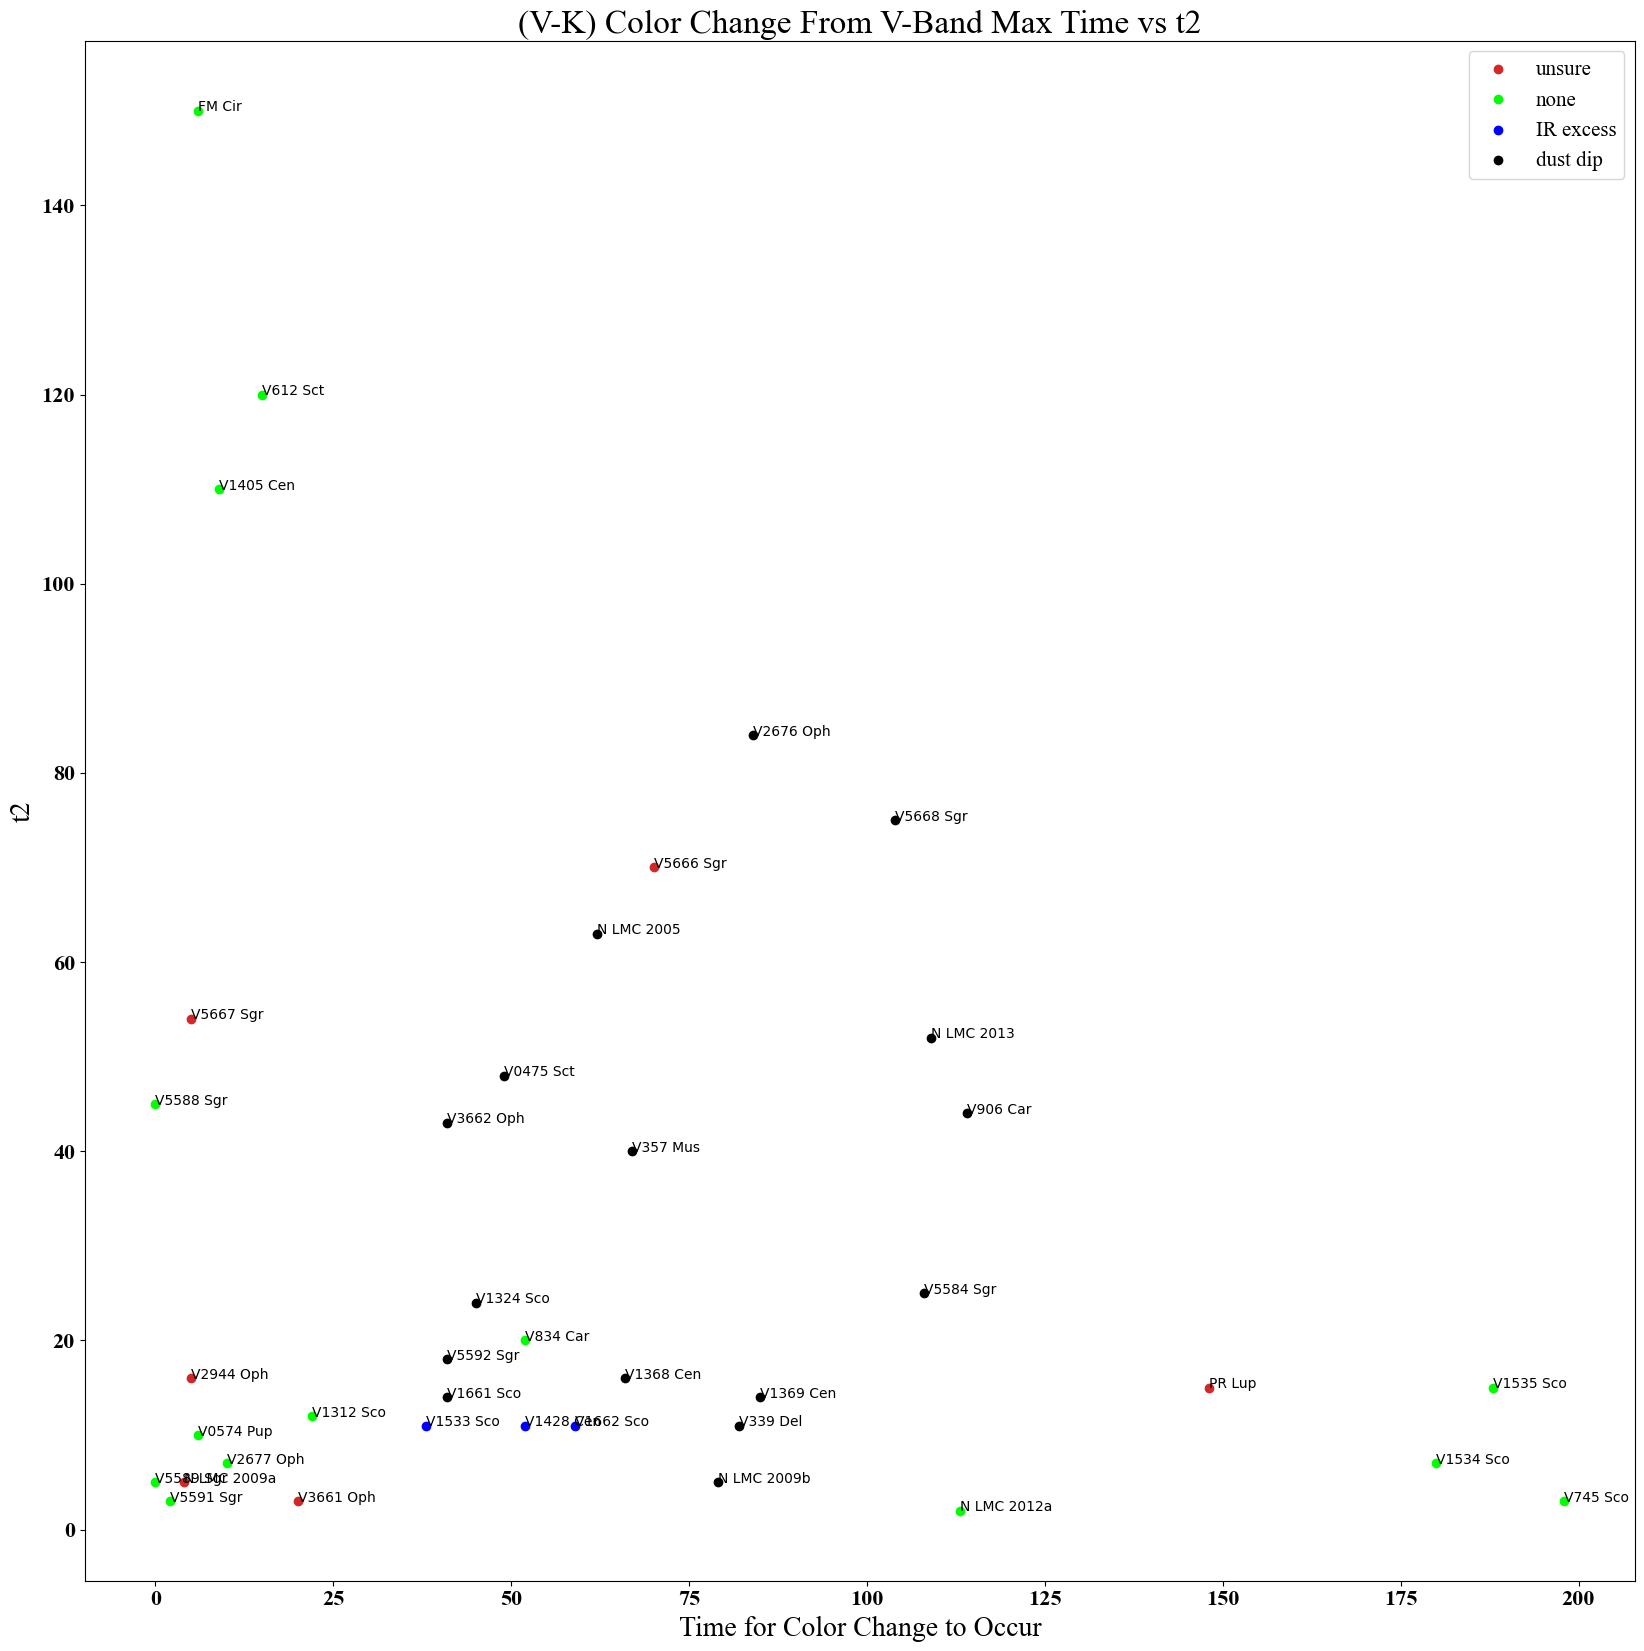

In [26]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(20,20))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_day_change_from_vmax_temp=[]
        features_dropped_t2=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_vmax_temp.append(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii])
            features_dropped_t2.append(np.asarray(features_dropped.loc[:,"t2"])[ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_day_change_from_vmax_temp,features_dropped_t2,color=colorlist_short[color],label=label,alpha=1)
        for i,txt in enumerate(features_dropped_name_temp):
            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_day_change_from_vmax_temp[i],features_dropped_t2[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Time for Color Change to Occur')
plt.ylabel('t2')
plt.title('(V-K) Color Change From V-Band Max Time vs t2')
#plt.savefig('Color_Change_Time_vs_t2.pdf')

Text(0.5, 1.0, 't2 vs Start to Trough of V-K')

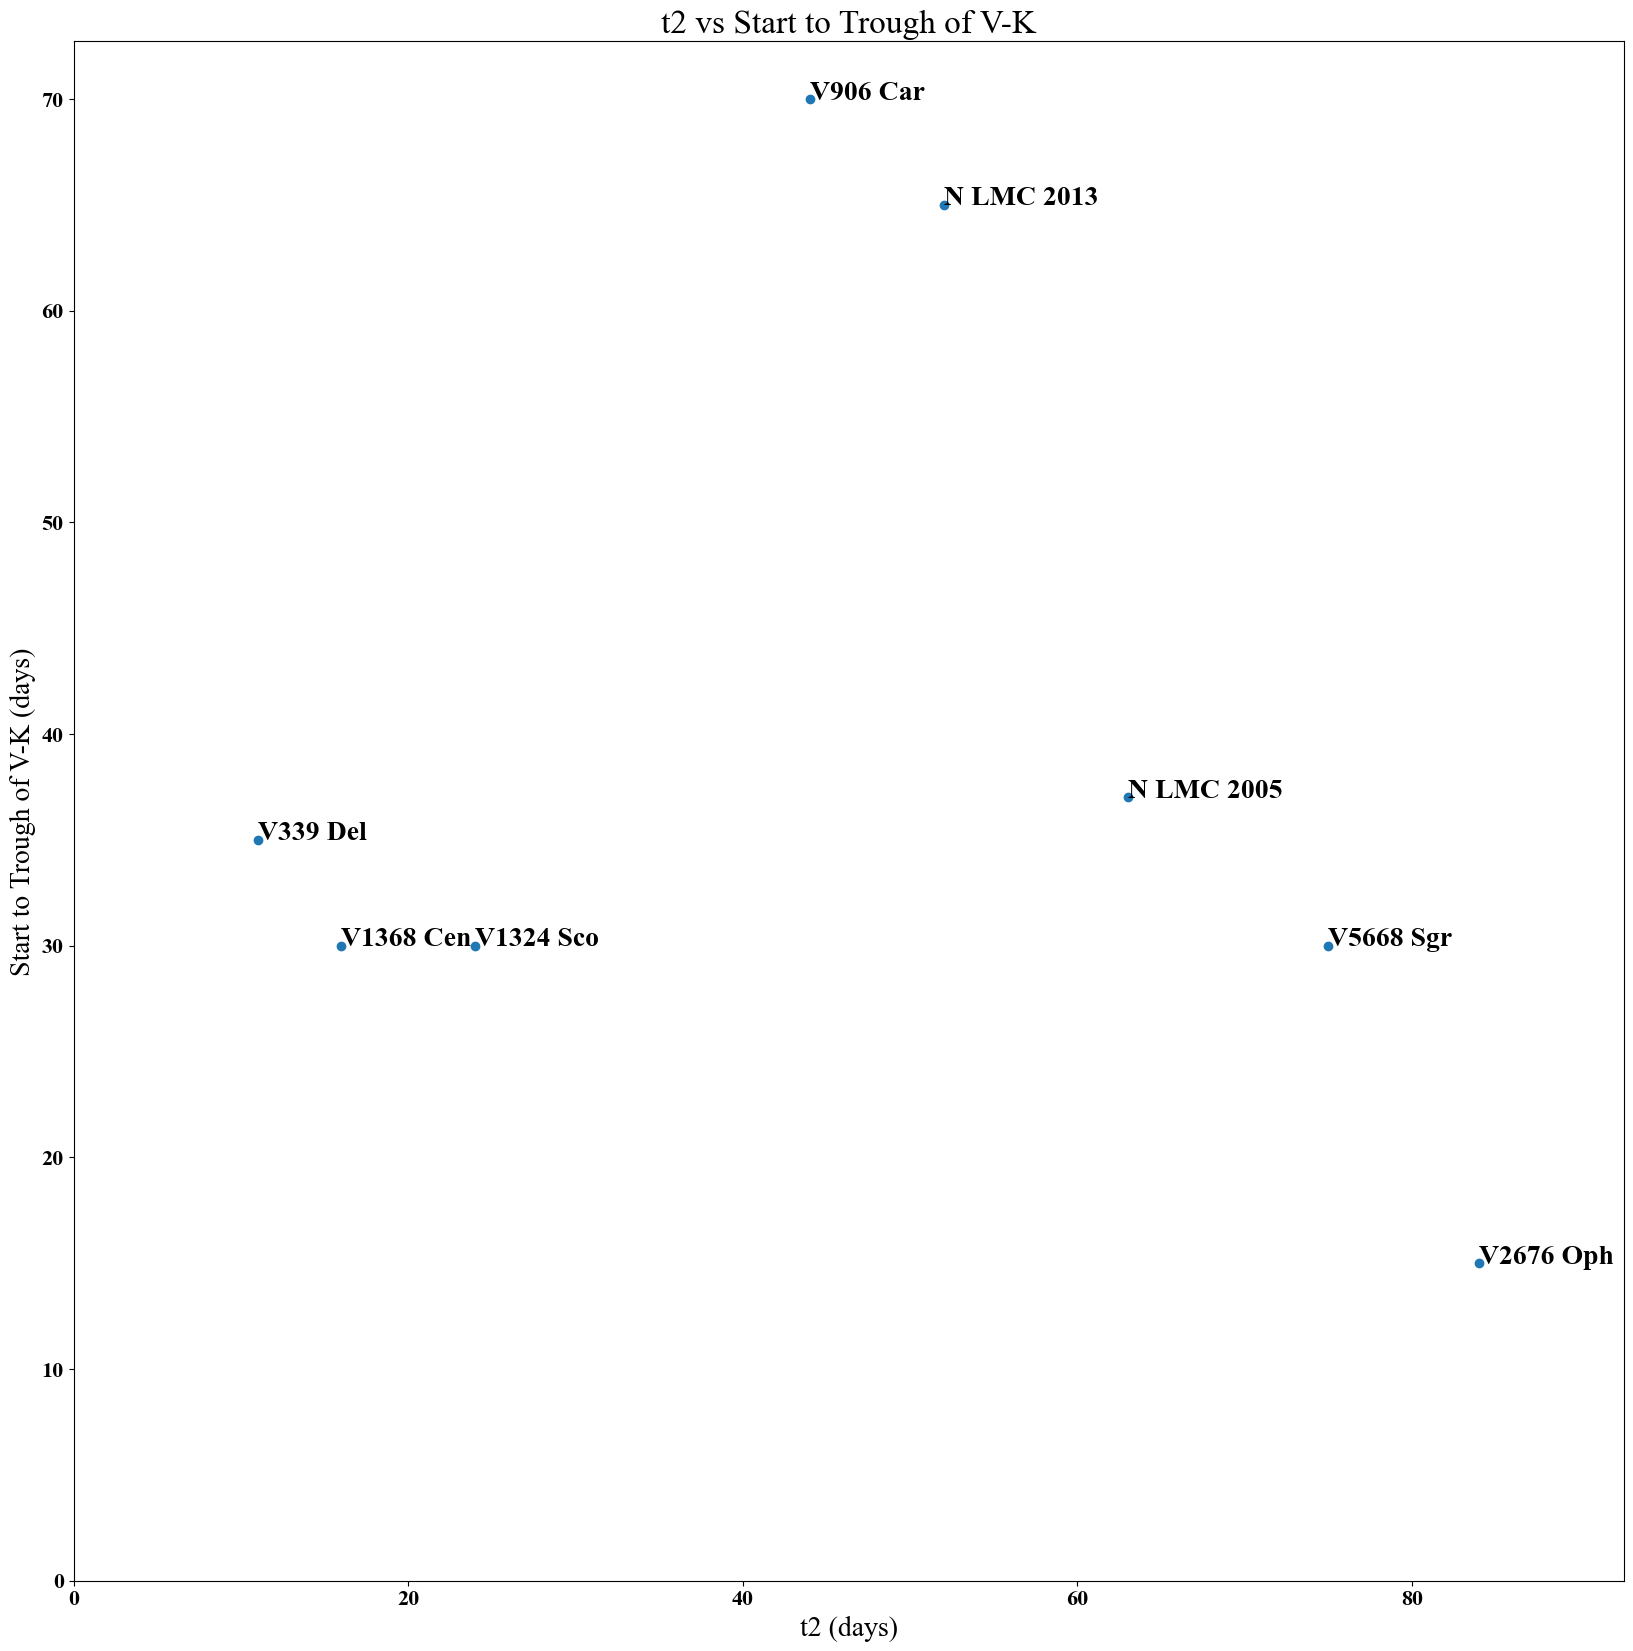

In [27]:
t2_dd_names_officiallist=[]
for i in t2_dustduration_names:
    t2_dd_names_officiallist.append(name_translator(i))
t2_dd_names_official=np.array(t2_dd_names_officiallist)
t2_dustduration_t2list=[]
for i in t2_dustduration_names:
    if len(np.where(Elias_t2_arr[0]==i)[0])>0:
        t2_dustduration_t2list.append(Elias_t2_arr[1,np.where(Elias_t2_arr[0]==i)[0][0]])
    else:
        t2_dustduration_t2list.append(np.nan)
t2_dustduration_t2arr=np.array(t2_dustduration_t2list)
nanind=np.where(np.isnan(t2_dustduration_t2arr)==1)
t2_dd_t2arr_clear=np.delete(t2_dustduration_t2arr,nanind)
t2_dd_dur_clear=np.delete(t2_dustduration_dur,nanind)
t2_dd_names_official_clear=np.delete(t2_dd_names_official,nanind)
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(20,20))
plt.subplot(111)
plt.scatter(t2_dd_t2arr_clear,t2_dd_dur_clear)
for i,txt in enumerate(t2_dd_names_official_clear):
    plt.annotate(txt,(t2_dd_t2arr_clear[i],t2_dd_dur_clear[i]))
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(0,x2+5)
plt.ylim(0,y2)
plt.xlabel('t2 (days)')
plt.ylabel('Start to Trough of V-K (days)')
plt.title('t2 vs Start to Trough of V-K')
#plt.savefig('t2_vs_start_to_trough.pdf')

Text(0.5, 1.0, '(V-K) Color Change From V-Band Max')

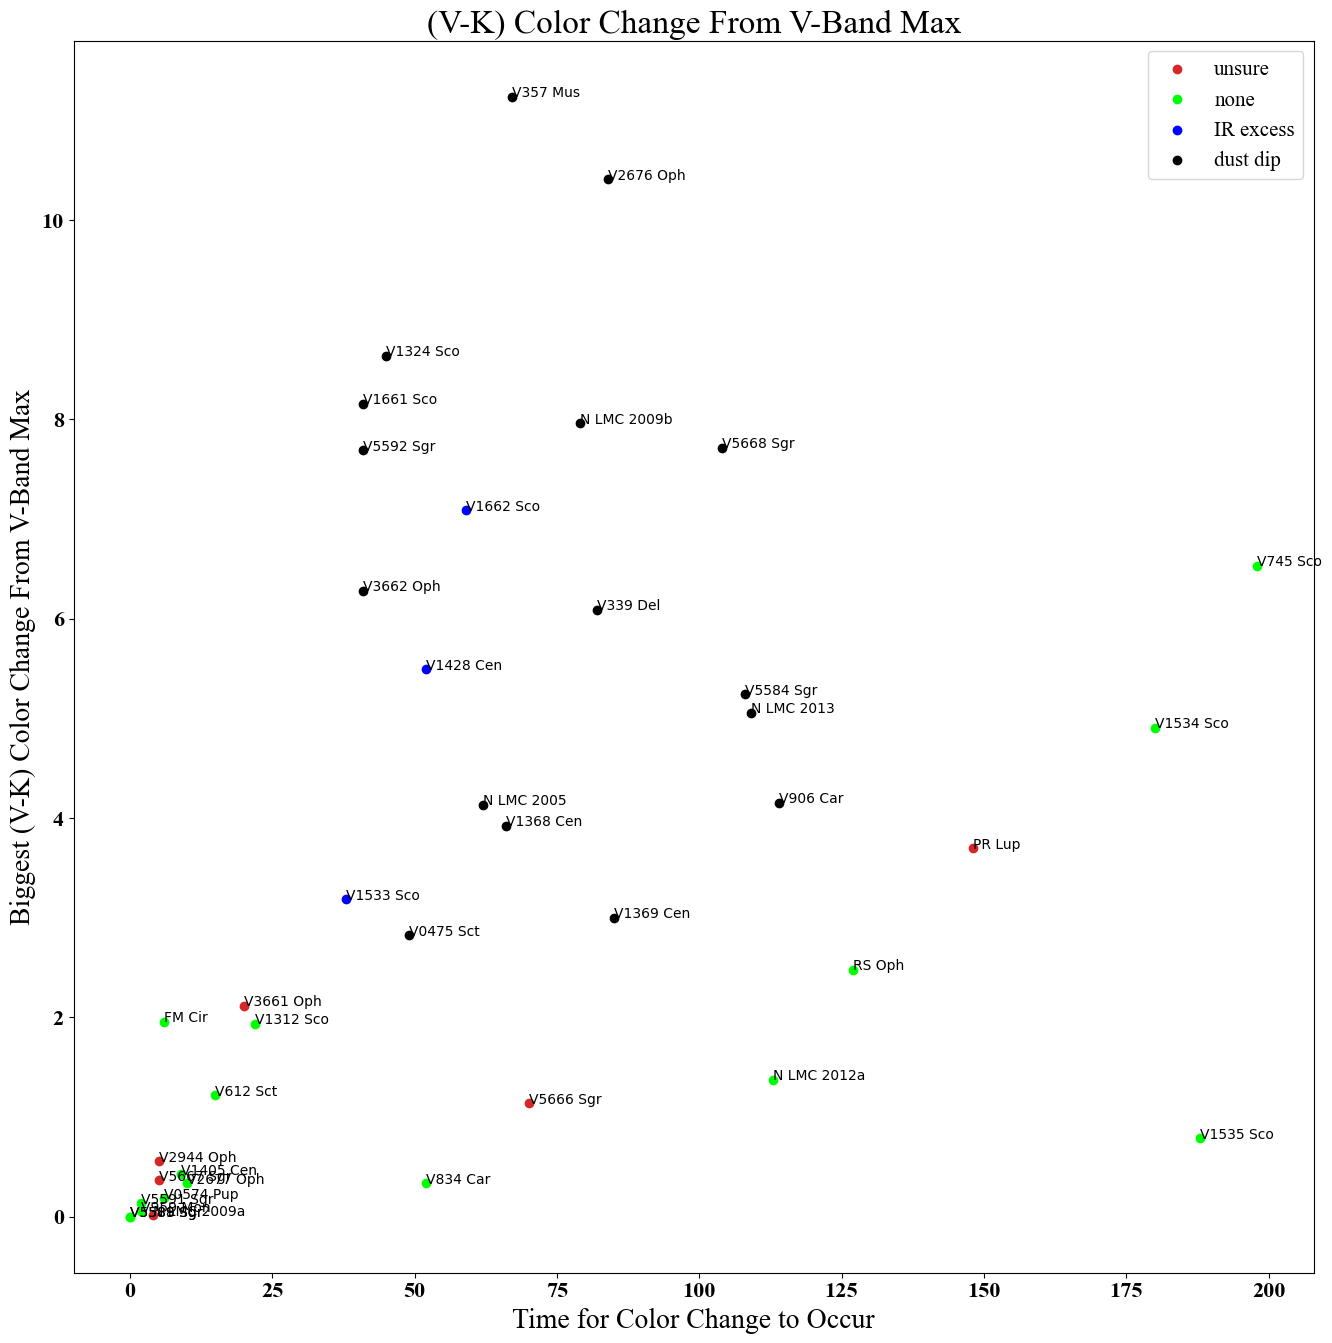

In [28]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(16,16))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_day_change_from_vmax_temp=[]
        features_dropped_color_change_from_vmax_temp=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_vmax_temp.append(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii])
            features_dropped_color_change_from_vmax_temp.append(np.asarray(features_dropped.loc[:,"color_change_from_vmax"])[ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_day_change_from_vmax_temp,features_dropped_color_change_from_vmax_temp,color=colorlist_short[color],label=label,alpha=1)
        for i,txt in enumerate(features_dropped_name_temp):
            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_day_change_from_vmax_temp[i],features_dropped_color_change_from_vmax_temp[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Time for Color Change to Occur')
plt.ylabel('Biggest (V-K) Color Change From V-Band Max')
plt.title('(V-K) Color Change From V-Band Max')
#plt.savefig('Color_Change_From_VBand_Max.pdf',transparent=False)

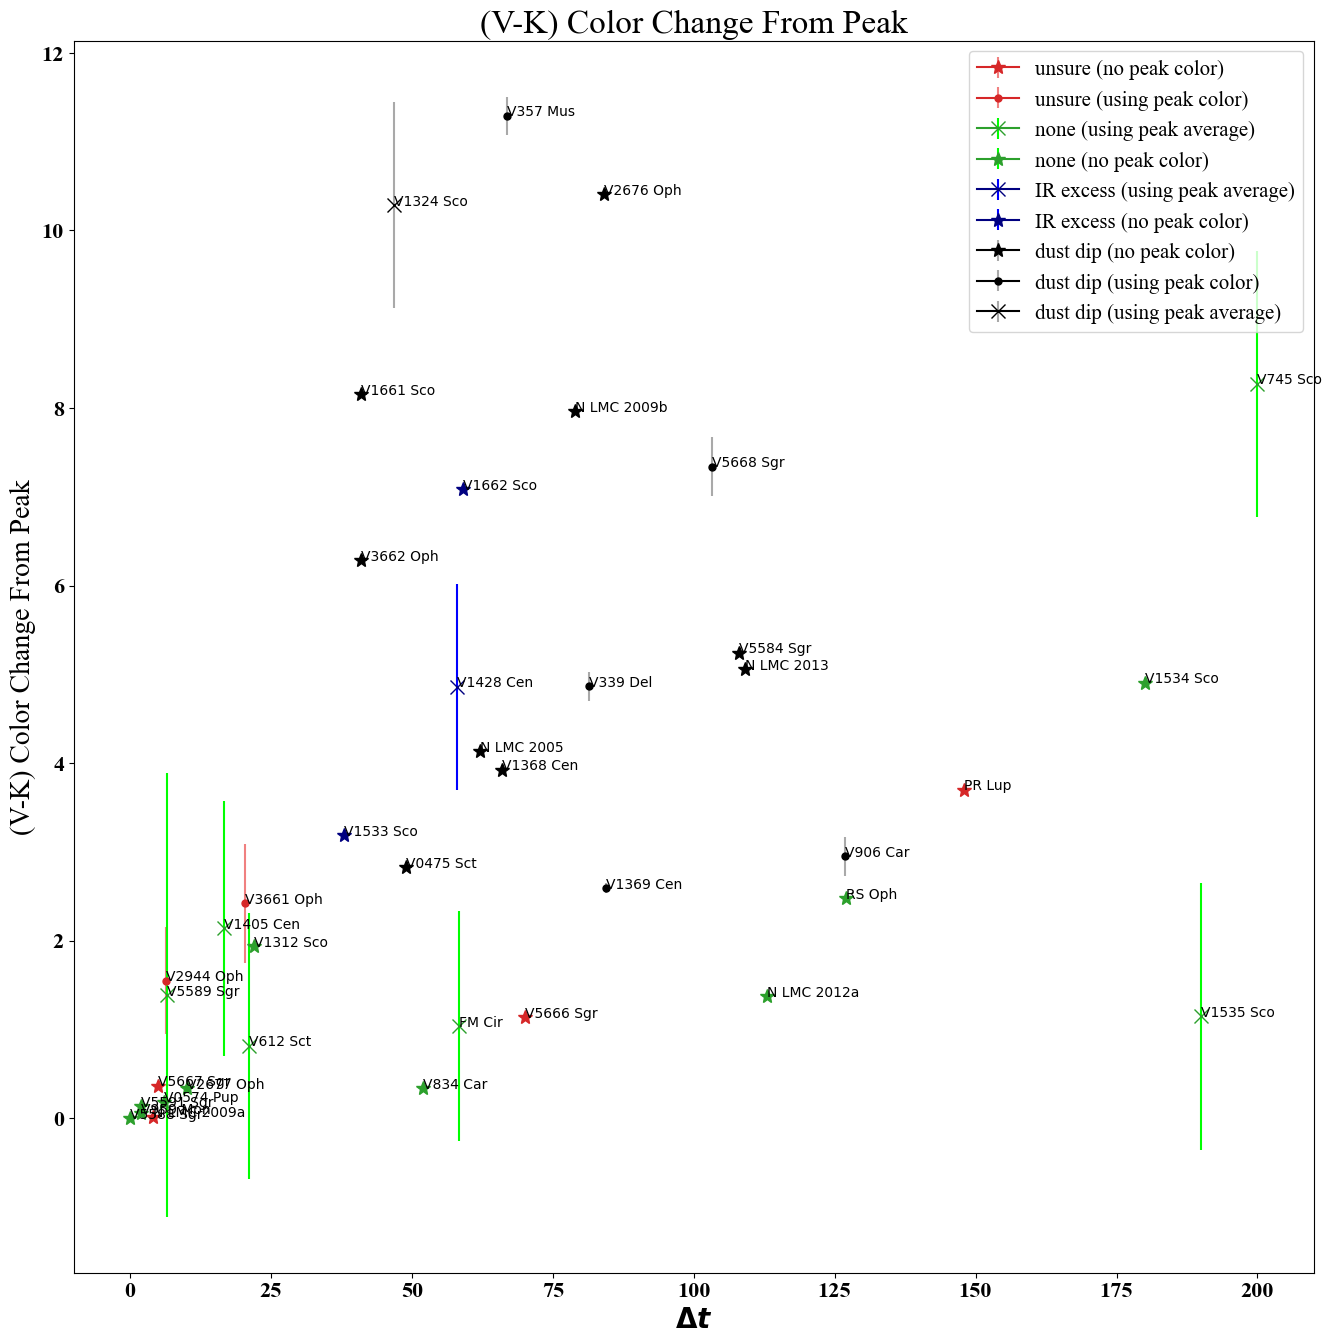

In [29]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
fig, (ax1)=plt.subplots(1,1,figsize=(16,16))
colorlist_short=['tab:olive','gold','tab:red','tab:green','navy','black']
ecolorlist_short=['khaki','orange','lightcoral','lime','b','darkgray']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        legendlim1=0
        legendlim2=0
        legendlim3=0
        features_dropped_day_change_from_tpeak_temp=[]
        features_dropped_color_change_from_tpeak_temp=[]
        features_dropped_color_change_from_tpeak_err_temp=[]
        features_dropped_name_temp=[]
        features_dropped_marker_temp=None
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_tpeak_temp.append(np.asarray(features_dropped.loc[:,"peak_dt"])[ii])
            features_dropped_color_change_from_tpeak_temp.append(np.asarray(features_dropped.loc[:,"peak_dm"])[ii])
            features_dropped_color_change_from_tpeak_err_temp.append(np.asarray(features_dropped.loc[:,"peak_dm_err"])[ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
            if np.asarray(features_dropped.loc[:,"peakColor"])[ii]=="Full":
                features_dropped_marker_temp="."
            elif np.asarray(features_dropped.loc[:,"peakColor"])[ii]=="Extinction":
                features_dropped_marker_temp="x"
            elif np.asarray(features_dropped.loc[:,"peakColor"])[ii]=="None":
                features_dropped_marker_temp="*"
            else:
                features_dropped_marker_temp="o"
            if features_dropped_marker_temp==".":
                labeltemp=label+" (using peak color)"
            elif features_dropped_marker_temp=="x":
                labeltemp=label+" (using peak average)"
            elif features_dropped_marker_temp=="*":
                labeltemp=label+" (no peak color)"
            else:
                labeltemp=label
            ax1.errorbar(np.asarray(features_dropped.loc[:,"peak_dt"])[ii],np.asarray(features_dropped.loc[:,"peak_dm"])[ii],yerr=np.asarray(features_dropped.loc[:,"peak_dm_err"])[ii],ecolor=ecolorlist_short[color],markersize=10,color=colorlist_short[color],label=labeltemp if (legendlim1==0 and features_dropped_marker_temp==".") or (legendlim2==0 and features_dropped_marker_temp=="x") or (legendlim3==0 and features_dropped_marker_temp=="*") else "",alpha=1,marker=features_dropped_marker_temp)
            if features_dropped_marker_temp==".":
                legendlim1=1
            if features_dropped_marker_temp=='x':
                legendlim2=1
            if features_dropped_marker_temp=="*":
                legendlim3=1
        for i,txt in enumerate(features_dropped_name_temp):
            ax1.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_day_change_from_tpeak_temp[i],features_dropped_color_change_from_tpeak_temp[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel(r'$\Delta t$')
plt.ylabel('(V-K) Color Change From Peak')
plt.title('(V-K) Color Change From Peak')
plt.savefig('Color_Increase_From_Peak_200.pdf',transparent=False)

Text(0.5, 1.0, 'Change in V- and K-Band from V-Band Max to largest difference in V-K Band')

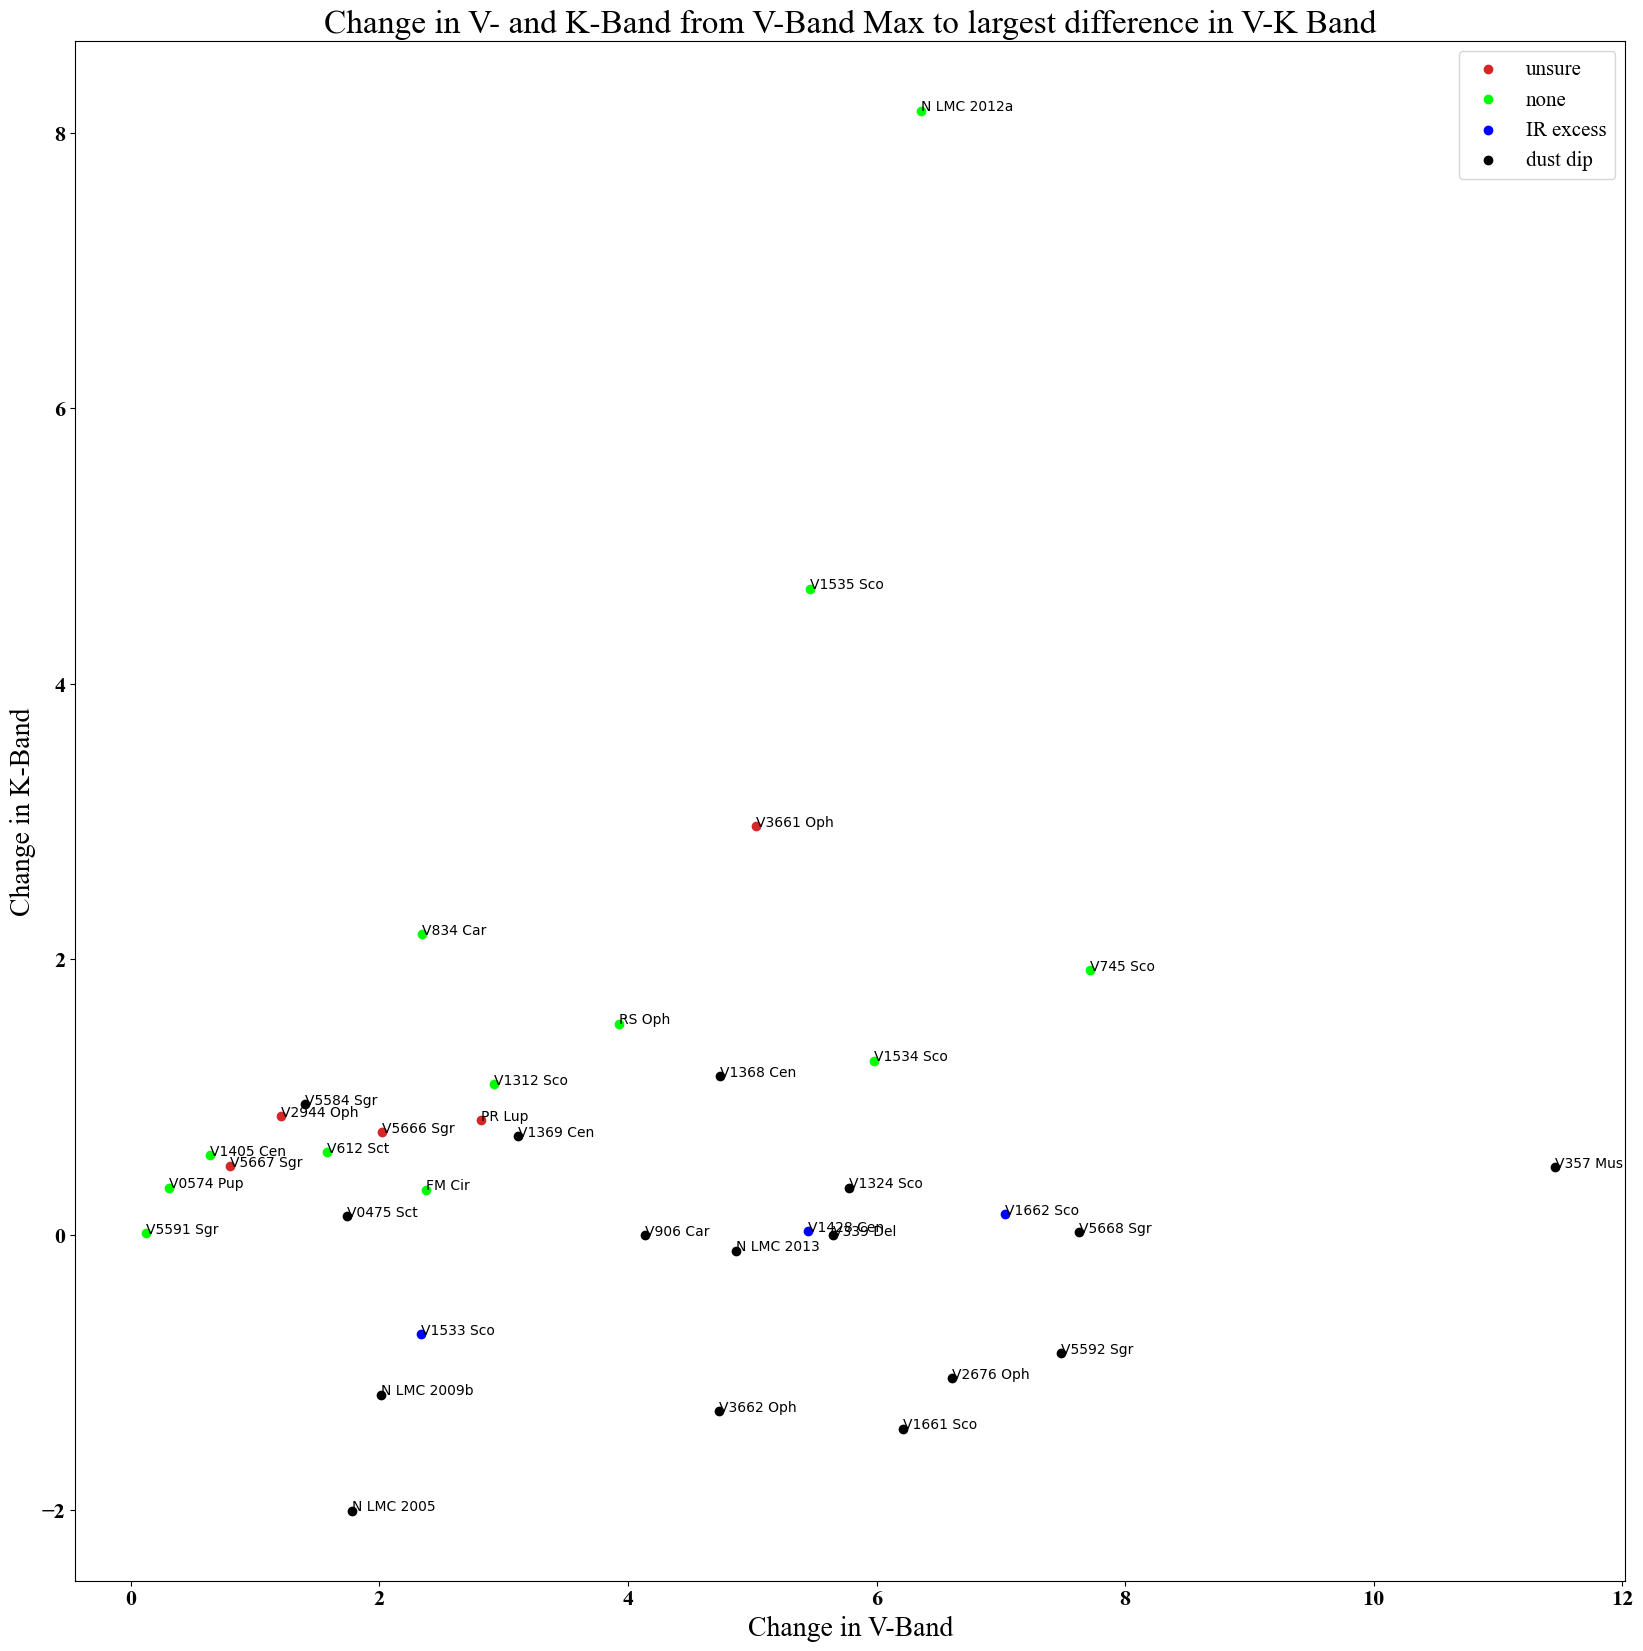

In [30]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(20,20))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_vband_change_over_interval=[]
        features_dropped_kband_change_over_interval=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_vband_change_over_interval.append(np.asarray(features_dropped.loc[:,"vband_change_over_interval"])[ii])
            features_dropped_kband_change_over_interval.append(np.asarray(features_dropped.loc[:,"kband_change_over_interval"])[ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_vband_change_over_interval,features_dropped_kband_change_over_interval,color=colorlist_short[color],label=label,alpha=1)
        for i,txt in enumerate(features_dropped_name_temp):
            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_vband_change_over_interval[i],features_dropped_kband_change_over_interval[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Change in V-Band')
plt.ylabel('Change in K-Band')
plt.title('Change in V- and K-Band from V-Band Max to largest difference in V-K Band')
#plt.savefig('V_and_K_Change_From_VBand_Max.pdf',transparent=False)

Text(0, 0.5, '(magnitude at t2-magnitude at bottom of dust dip)/(time from t2 to reach the bottom)')

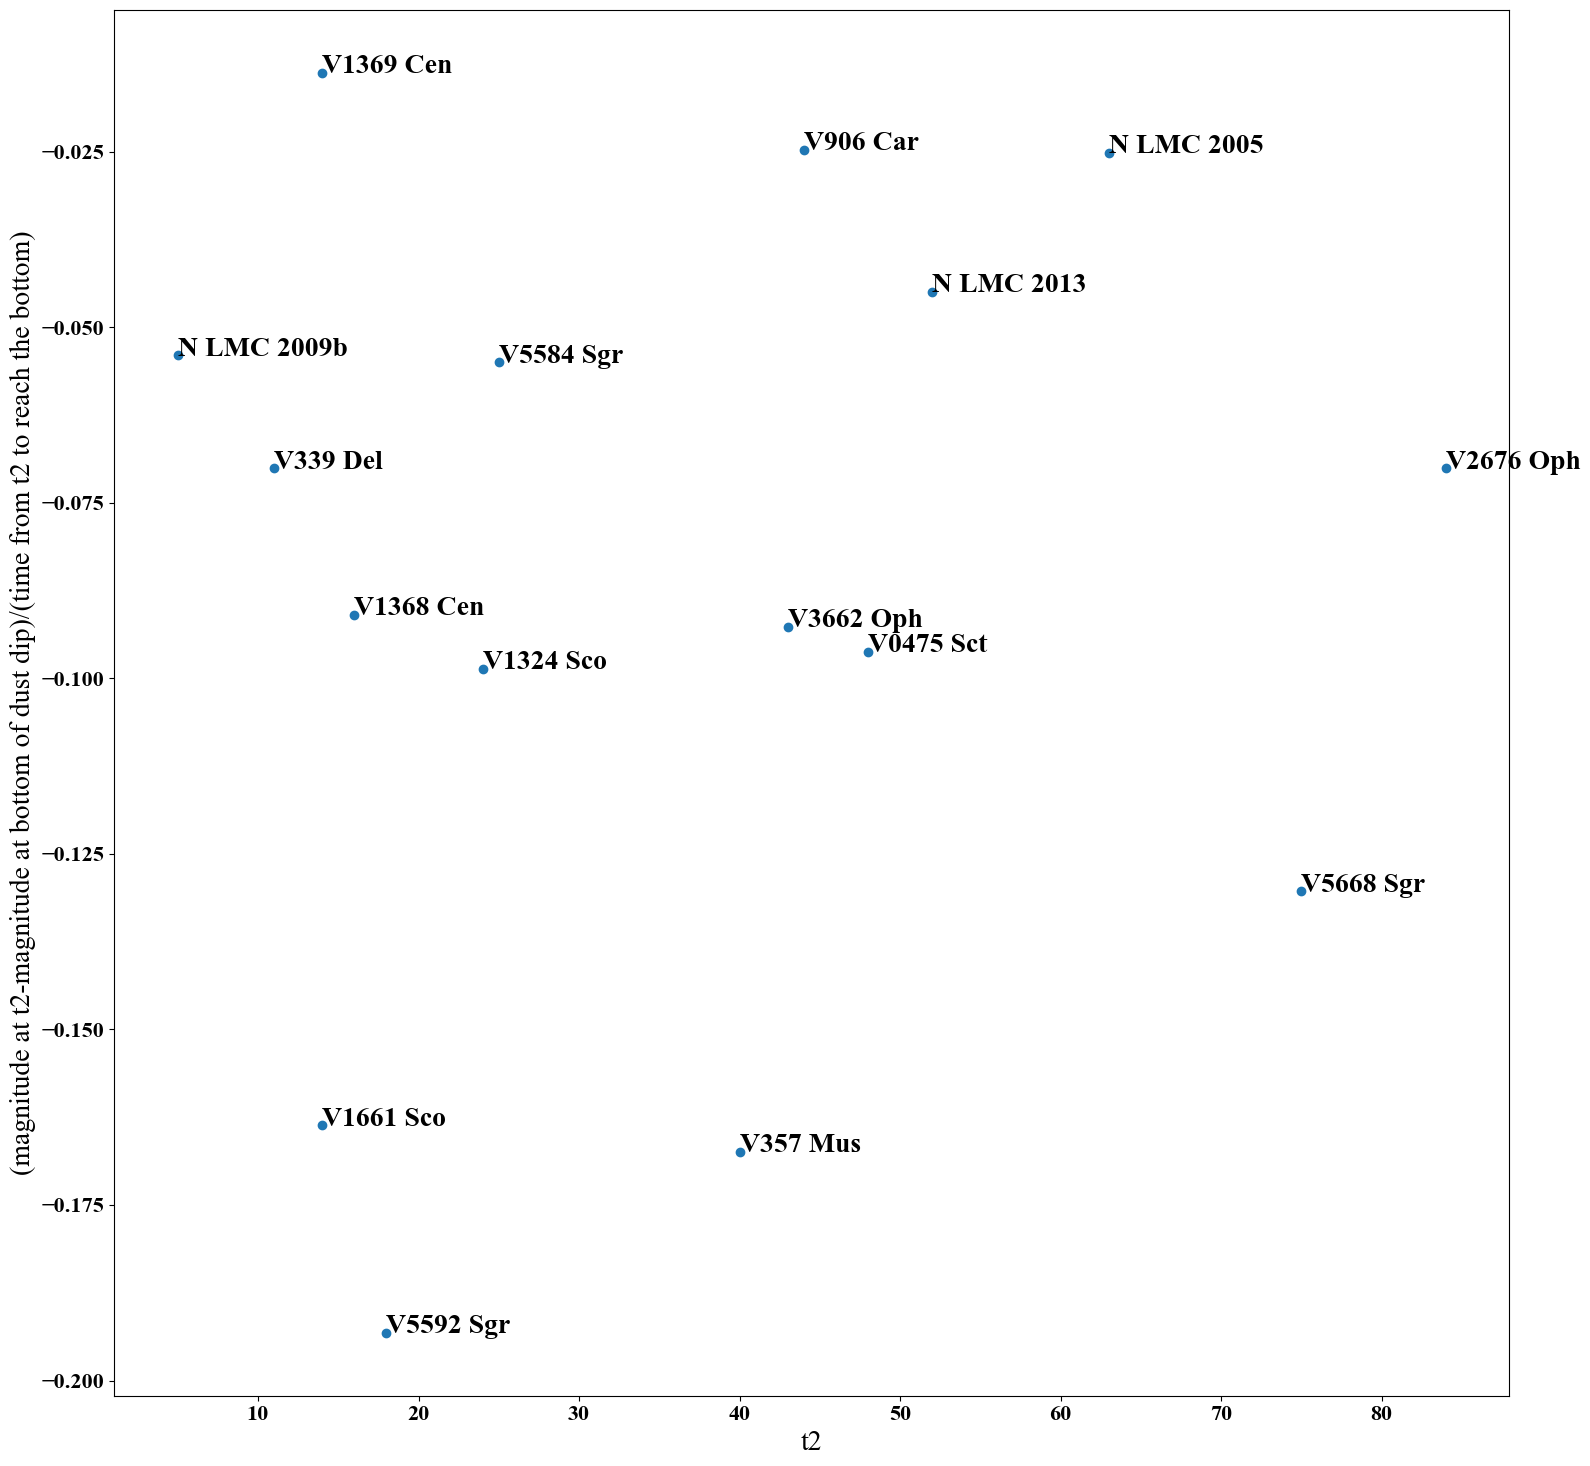

In [31]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
plt.figure(figsize=(18,18))
plt.subplot(111)
plt.scatter(np.abs(np.array(v2dusttest1)),v2dusttest2)
for i,txt in enumerate(v2dusttestnames):
    plt.annotate(txt,(np.abs(v2dusttest1[i]),v2dusttest2[i]))
plt.xlabel('t2')
plt.ylabel('(magnitude at t2-magnitude at bottom of dust dip)/(time from t2 to reach the bottom)')